<center>&copy; | Ghassen <strong>MARRAKCHI</strong> - 2022</center>

<img src="__src/LIPN.png" style="" width="300">
<hr>

<h1 style="text-align:center;color:#5a84ba"><center>Benchmarking Clustering DataStream</center></h1>
<h2><center><strong><font color='#3f4a4f'>Datasets Exploratory</font></strong></center></h2>

<hr>
<h3><center><strong><font color='#3f4a4f'>II- Exploration</font></strong></center></h3>
<hr>

<h4><strong><font color='#353b38'>Plan de Travail</font></strong></h4>

<ol style="list-style-type: upper-roman;">
    <li><a href="III- Analysis.ipynb">Introduction</a></li>
    <li><strong>Exploration</strong></li>
    <li><a href="III- Analysis.ipynb">Analysis</a></li>
    <li><a href="IV- Optimisation.ipynb">Optimisation</a></li>
</ol>

<hr>
<h4><strong><font color='#353b38'>Objectifs</font></strong></h4>

- Analyser les jeux de données.

<hr>
<h4><strong><font color='#353b38'>Jeux de données</font></strong></h4>

<ul>
    <li><a href="#INSECTS_abrupt_balanced_norm"><strong>INSECTS_abrupt_balanced_norm</strong></a></li>
    <li><a href="#INSECTS_abrupt_imbalanced_norm"><strong>INSECTS_abrupt_imbalanced_norm</strong></a></li>
    <li><a href="#INSECTS_gradual_balanced_norm"><strong>INSECTS_gradual_balanced_norm</strong></a></li>
    <li><a href="#INSECTS_gradual_imbalanced_norm"><strong>INSECTS_gradual_imbalanced_norm</strong></a></li>
    <li><a href="#INSECTS_incremental_abrupt_balanced_norm"><strong>INSECTS_incremental_abrupt_balanced_norm</strong></a></li>
    <li><a href="#INSECTS_incremental_abrupt_imbalanced_norm"><strong>INSECTS_incremental_abrupt_imbalanced_norm</strong></a></li>
    <li><a href="#INSECTS_incremental_balanced_norm"><strong>INSECTS_incremental_balanced_norm</strong></a></li>
    <li><a href="#INSECTS_incremental_imbalanced_norm"><strong>INSECTS_incremental_imbalanced_norm</strong></a></li>
    <li><a href="#INSECTS_incremental_reoccurring_balanced_norm"><strong>INSECTS_incremental_reoccurring_balanced_norm</strong></a></li>
    <li><a href="#INSECTS_incremental_reoccurring_imbalanced_norm"><strong>INSECTS_incremental_reoccurring_imbalanced_norm</strong></a></li>
    <li><a href="#INSECTS_out_of_control_norm"><strong>INSECTS_out_of_control_norm</strong></a></li>
</ul>

<h4><strong><font color='#353b38'>Configuration générale du notebook</font></strong></h4>

In [24]:
# Importation des paquets
import os
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.io import arff
from tqdm import tqdm
from sklearn import preprocessing

In [25]:
# Jeux de données
DATASETS = dict()
DATASETS_DIR = os.path.abspath(os.path.join("..", "Datasets"))

DATASETS_BRUTES_DIR = os.path.abspath(os.path.join("..", "Datasets", "brute"))
DATASETS_PRE_PROCESS_DIR = os.path.abspath(os.path.join("..", "Datasets", "pre-processed"))

EXPLORATORY_DIR = os.path.abspath(os.path.join("..", "Exploratory"))
RESULTS_DIR = os.path.abspath(os.path.join("..", "Results"))

In [26]:
# Jeux de données (Papier scientifique)
paper_datasets_dir_string = "Classification DataStream Benchmark"

PAPER_DATASETS_BRUTES_DIR = os.path.join(DATASETS_BRUTES_DIR, paper_datasets_dir_string)
PAPER_DATASETS_PRE_PROCESS_DIR = os.path.join(DATASETS_PRE_PROCESS_DIR, paper_datasets_dir_string)

PAPER_EXPLORATORY_DIR = os.path.join(EXPLORATORY_DIR, paper_datasets_dir_string)

PAPER_RESULTS_DIR = os.path.join(RESULTS_DIR, paper_datasets_dir_string)



## Récupération des fichiers BRUTES
files = [file for file in os.listdir(PAPER_DATASETS_BRUTES_DIR)
         if (os.path.isfile(os.path.join(PAPER_DATASETS_BRUTES_DIR, file)) and (".arff" in file) ) ]
print("--- Nombre de fichiers : ", len(files))



## Enregistrement des informations
for file in tqdm(files) :
    # Nom du dataset
    DATASETS[file.replace(".arff", "")] = dict()
    DATASETS[file.replace(".arff", "")]['name'] = file.replace(".arff", "")
    
    
    # Emplacements relatifs au dataset
    DATASETS[file.replace(".arff", "")]['brute-dir'] = PAPER_DATASETS_BRUTES_DIR
    DATASETS[file.replace(".arff", "")]['pre-proc-dir'] = PAPER_DATASETS_PRE_PROCESS_DIR
    DATASETS[file.replace(".arff", "")]['exploratory-dir'] = PAPER_EXPLORATORY_DIR
    
    reduction_path = os.path.join(PAPER_RESULTS_DIR, file.replace(".arff", ""), 'Reduction')
    if not os.path.exists(reduction_path) :
        os.makedirs(reduction_path)
    
    evaluation_path = os.path.join(PAPER_RESULTS_DIR, file.replace(".arff", ""), 'Evaluation')
    if not os.path.exists(evaluation_path) :
        os.makedirs(evaluation_path)
        
    DATASETS[file.replace(".arff", "")]['results-dir'] = {'reduction-dir' : reduction_path,
                                                          'evaluation-dir': evaluation_path}
    


## Vérification du processus
assert len(files) == len(list(DATASETS.keys()))
print(len(list(DATASETS.keys())), " ont été enregistré avec succès !")

--- Nombre de fichiers :  11


100%|██████████| 11/11 [00:00<00:00, 21459.23it/s]

11  ont été enregistré avec succès !


In [27]:
# Récupération des jeux de données restants



## Récupération des fichiers
files = [file for file in os.listdir(DATASETS_BRUTES_DIR)
         if (os.path.isfile(os.path.join(DATASETS_BRUTES_DIR, file)) and (".arff" in file) ) ]
print("--- Nombre de fichiers : ", len(files))



## Enregistrement des informations
restant_dataset = dict()

for file in tqdm(files) :
    # Nom du dataset
    restant_dataset[file.replace(".arff", "")] = dict()
    restant_dataset[file.replace(".arff", "")]['name'] = file.replace(".arff", "")
    
    # Emplacements relatifs au dataset
    restant_dataset[file.replace(".arff", "")]['brute-dir'] = DATASETS_BRUTES_DIR
    restant_dataset[file.replace(".arff", "")]['pre-proc-dir'] = DATASETS_PRE_PROCESS_DIR
    restant_dataset[file.replace(".arff", "")]['exploratory-dir'] = EXPLORATORY_DIR
    
    reduction_path = os.path.join(RESULTS_DIR, file.replace(".arff", ""), 'Reduction')
    if not os.path.exists(reduction_path) :
        os.makedirs(reduction_path)
    
    evaluation_path = os.path.join(RESULTS_DIR, file.replace(".arff", ""), 'Evaluation')
    if not os.path.exists(evaluation_path) :
        os.makedirs(evaluation_path)
        
    restant_dataset[file.replace(".arff", "")]['results-dir'] = {'reduction-dir' : reduction_path,
                                                                 'evaluation-dir': evaluation_path}
    
    
    
## Vérification du processus
assert len(files) == len(list(restant_dataset.keys()))
print(len(list(restant_dataset.keys())), " ont été enregistré avec succès !")

--- Nombre de fichiers :  16


100%|██████████| 16/16 [00:00<00:00, 24306.00it/s]

16  ont été enregistré avec succès !


In [28]:
# Joindre les deux dictionnaires
DATASETS |= restant_dataset


# Affichage des résultats
print("--- Nombre de datasets FINAL : ", len(list(DATASETS.keys())))
print("--- Datasets FINAUX : ", list(DATASETS.keys()))


# Enregistrement
with open(os.path.join(DATASETS_DIR, 'datasets.json'), 'w') as meta_file:
    json.dump(DATASETS, meta_file)


## Vérification du processus
files = [file for file in os.listdir(DATASETS_DIR)
         if (os.path.isfile(os.path.join(DATASETS_DIR, file)) and (".json" in file) ) ]

assert len(files) == 1
with open(os.path.join(DATASETS_DIR, files[0]), 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

--- Nombre de datasets FINAL :  27
--- Datasets FINAUX :  ['INSECTS_incremental_reoccurring_balanced_norm', 'INSECTS_gradual_balanced_norm', 'INSECTS_incremental_imbalanced_norm', 'INSECTS_incremental_balanced_norm', 'INSECTS_abrupt_balanced_norm', 'INSECTS_incremental_reoccurring_imbalanced_norm', 'INSECTS_incremental_abrupt_imbalanced_norm', 'INSECTS_incremental_abrupt_balanced_norm', 'INSECTS_abrupt_imbalanced_norm', 'INSECTS_out_of_control_norm', 'INSECTS_gradual_imbalanced_norm', 'Poker_LSN', 'Ozone', 'Spam_Assassin', 'Key_Stroke', 'Gassenor', 'NOAA', 'Power_Supply', 'COVTYPE', 'CHESS', 'Luxembourg', 'ELEC', 'KDD_CUP_99', 'Outdoor', 'Sensor_Stream', 'AIRLINES', 'Rialto']
Informations ont été enregistrées avec succès !


Nous allons effectuer le pré-traitement des jeux de données du benchmark de classification.

<h4><strong><font color='#353b38'>Implémentation des fonctions</font></strong></h4>

<h5 id="bar_plot">bar_plot</h5>

In [6]:
def bar_plot(values, ratio, file_destination) :
    # Init
    fig, ax = plt.subplots(figsize=(6, 3))

    # Plot
    ax.bar(values, ratio)

    # Légendes
    ax.set_xlabel('Classes')
    ax.set_ylabel('Ratio')
    ax.set_title("Distribution des classes")
    
    plt.show()
    
    # Enregistrement
    fig.savefig(file_destination + "-BAR" + ".jpg", format='jpg')
    fig.savefig(file_destination + "-BAR" + ".pdf", format='pdf')

<h5 id="pie_plot">pie_plot</h5>

In [7]:
def pie_plot(values, ratio, file_destination) :
    # Init
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    
    # Plot
    explode = np.linspace(0, 0.5, num=len(values)).tolist()
    wedges, texts = ax.pie(ratio, labels=ratio, normalize=True, explode=explode)

    # Légendes
    ax.legend(wedges, values,
              title="Classes",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title("Répartition des classes")
    
    plt.show()
    
    # Enregistrement
    fig.savefig(file_destination + "-PIE" + ".jpg", format='jpg')
    fig.savefig(file_destination + "-PIE" + ".pdf", format='pdf')

<h4><strong><font color='#353b38'>Traitement</font></strong></h4>

<h5 id="INSECTS_abrupt_balanced_norm">INSECTS_abrupt_balanced_norm</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [8]:
dataset_file = os.path.join(DATASETS['INSECTS_abrupt_balanced_norm']['brute-dir'],
                            DATASETS['INSECTS_abrupt_balanced_norm']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Classification DataStream Benchmark/INSECTS_abrupt_balanced_norm.arff'

In [9]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.507066, 0.153333, 0.226092, 0.302447, 0.007239, 0.36912 , 0.332436, 0.017807, 0.032819, 0.033009, 0.009196, 0.095946, 0.02497 , 0.020698, 0.026131, 0.015918, 0.005096, 0.012688, 0.10294 , 0.056804, 0.021908, 0.01613 , 0.009059, 0.021032, 0.006855, 0.017358, 0.01343 , 0.009138, 0.006768, 0.007291, 0.009224, 0.036218, 0.162955, b'ae-albopictus-female'),
        (0.281661, 0.355953, 0.253196, 0.340335, 0.415631, 0.503923, 0.392029, 0.003648, 0.068381, 0.011155, 0.025298, 0.003649, 0.151324, 0.029064, 0.003732, 0.063712, 0.025268, 0.001858, 0.002936, 0.013652, 0.182807, 0.115666, 0.027045, 0.004569, 0.005631, 0.014048, 0.002431, 0.007076, 0.037682, 0.003089, 0.004207, 0.004144, 0.005044, b'ae-albopictus-female'),
        (0.19375 , 0.257782, 0.183339, 0.247017, 0.302133, 0.363522, 0.269729, 0.293543, 0.293002, 0.029522, 0.397337, 0.100067, 0.262793, 0.083273, 0.01936 , 0.251711, 0.472875, 0.218066, 0.086856, 0.043234, 0.036585, 0.080211, 0.075625, 0.034404, 0.023837, 0.013922, 0

In [10]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.507066,0.153333,0.226092,0.302447,0.007239,0.369120,0.332436,0.017807,0.032819,0.033009,...,0.006855,0.017358,0.013430,0.009138,0.006768,0.007291,0.009224,0.036218,0.162955,b'ae-albopictus-female'
1,0.281661,0.355953,0.253196,0.340335,0.415631,0.503923,0.392029,0.003648,0.068381,0.011155,...,0.005631,0.014048,0.002431,0.007076,0.037682,0.003089,0.004207,0.004144,0.005044,b'ae-albopictus-female'
2,0.193750,0.257782,0.183339,0.247017,0.302133,0.363522,0.269729,0.293543,0.293002,0.029522,...,0.023837,0.013922,0.081406,0.413674,0.295615,0.120392,0.036566,0.032652,0.025776,b'cx-quinq-female'
3,0.514782,0.154867,0.016903,0.226084,0.297642,0.239111,0.248268,0.066745,0.115020,0.083407,...,0.020949,0.023019,0.021147,0.020813,0.019048,0.011606,0.013379,0.044839,0.123552,b'ae-albopictus-female'
4,0.774337,0.012549,0.105751,0.033302,0.017170,0.049754,0.173500,0.055220,0.044184,0.034923,...,0.034876,0.060708,0.048119,0.027417,0.015022,0.010218,0.008121,0.012539,0.018058,b'ae-aegypti-male'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52843,0.376205,0.481608,0.341587,0.005883,0.555439,0.449868,0.535081,0.007482,0.004769,0.018222,...,0.027851,0.094857,0.095290,0.044267,0.008017,0.005021,0.006875,0.005422,0.008626,b'ae-albopictus-male'
52844,0.907227,0.283415,0.401981,0.538330,0.006673,0.665257,0.644756,0.018815,0.014563,0.007784,...,0.004589,0.004021,0.004964,0.012643,0.050035,0.203125,0.130514,0.113380,0.038648,b'ae-albopictus-male'
52845,0.417234,0.528923,0.374940,0.499970,0.001630,0.612408,0.594603,0.008641,0.006584,0.003708,...,0.004282,0.004831,0.026317,0.194038,0.200206,0.128182,0.032787,0.012716,0.010405,b'ae-albopictus-male'
52846,0.379485,0.482561,0.341230,0.001819,0.442228,0.022463,0.446172,0.018756,0.012964,0.047095,...,0.073563,0.182334,0.221658,0.184219,0.053162,0.018325,0.011213,0.010824,0.020919,b'ae-albopictus-male'


<b>Nettoyage</b>

variables -> virgule flottante

In [11]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33
0,0.507066,0.153333,0.226092,0.302447,0.007239,0.369120,0.332436,0.017807,0.032819,0.033009,...,0.021032,0.006855,0.017358,0.013430,0.009138,0.006768,0.007291,0.009224,0.036218,0.162955
1,0.281661,0.355953,0.253196,0.340335,0.415631,0.503923,0.392029,0.003648,0.068381,0.011155,...,0.004569,0.005631,0.014048,0.002431,0.007076,0.037682,0.003089,0.004207,0.004144,0.005044
2,0.193750,0.257782,0.183339,0.247017,0.302133,0.363522,0.269729,0.293543,0.293002,0.029522,...,0.034404,0.023837,0.013922,0.081406,0.413674,0.295615,0.120392,0.036566,0.032652,0.025776
3,0.514782,0.154867,0.016903,0.226084,0.297642,0.239111,0.248268,0.066745,0.115020,0.083407,...,0.038212,0.020949,0.023019,0.021147,0.020813,0.019048,0.011606,0.013379,0.044839,0.123552
4,0.774337,0.012549,0.105751,0.033302,0.017170,0.049754,0.173500,0.055220,0.044184,0.034923,...,0.017998,0.034876,0.060708,0.048119,0.027417,0.015022,0.010218,0.008121,0.012539,0.018058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52843,0.376205,0.481608,0.341587,0.005883,0.555439,0.449868,0.535081,0.007482,0.004769,0.018222,...,0.008414,0.027851,0.094857,0.095290,0.044267,0.008017,0.005021,0.006875,0.005422,0.008626
52844,0.907227,0.283415,0.401981,0.538330,0.006673,0.665257,0.644756,0.018815,0.014563,0.007784,...,0.011866,0.004589,0.004021,0.004964,0.012643,0.050035,0.203125,0.130514,0.113380,0.038648
52845,0.417234,0.528923,0.374940,0.499970,0.001630,0.612408,0.594603,0.008641,0.006584,0.003708,...,0.003161,0.004282,0.004831,0.026317,0.194038,0.200206,0.128182,0.032787,0.012716,0.010405
52846,0.379485,0.482561,0.341230,0.001819,0.442228,0.022463,0.446172,0.018756,0.012964,0.047095,...,0.014627,0.073563,0.182334,0.221658,0.184219,0.053162,0.018325,0.011213,0.010824,0.020919


class -> entiers

In [12]:
classes = dataset_df['class'].values.tolist()
classes

[b'ae-albopictus-female',
 b'ae-albopictus-female',
 b'cx-quinq-female',
 b'ae-albopictus-female',
 b'ae-aegypti-male',
 b'cx-quinq-male',
 b'cx-quinq-male',
 b'cx-quinq-male',
 b'cx-quinq-female',
 b'ae-aegypti-female',
 b'ae-albopictus-female',
 b'cx-quinq-female',
 b'ae-aegypti-male',
 b'ae-albopictus-male',
 b'cx-quinq-male',
 b'cx-quinq-female',
 b'cx-quinq-male',
 b'ae-aegypti-female',
 b'cx-quinq-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-albopictus-female',
 b'cx-quinq-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-albopictus-female',
 b'ae-albopictus-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-albopictus-female',
 b'ae-aegypti-female',
 b'ae-albopictus-male',
 b'ae-albopictus-female',
 b'ae-albopictus-female',
 b'cx-quinq-male',
 b'cx-quinq-female',
 b'ae-albopictus-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'cx-quinq-male',
 b'ae-aegypti-male',
 b'ae-albopictu

In [13]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['ae-albopictus-female',
 'ae-albopictus-female',
 'cx-quinq-female',
 'ae-albopictus-female',
 'ae-aegypti-male',
 'cx-quinq-male',
 'cx-quinq-male',
 'cx-quinq-male',
 'cx-quinq-female',
 'ae-aegypti-female',
 'ae-albopictus-female',
 'cx-quinq-female',
 'ae-aegypti-male',
 'ae-albopictus-male',
 'cx-quinq-male',
 'cx-quinq-female',
 'cx-quinq-male',
 'ae-aegypti-female',
 'cx-quinq-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-albopictus-female',
 'cx-quinq-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-albopictus-female',
 'ae-albopictus-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-albopictus-female',
 'ae-aegypti-female',
 'ae-albopictus-male',
 'ae-albopictus-female',
 'ae-albopictus-female',
 'cx-quinq-male',
 'cx-quinq-female',
 'ae-albopictus-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'cx-quinq-male',
 'ae-aegypti-male',
 'ae-albopictus-female',
 'cx-quinq-male',
 'cx-quinq-femal

In [14]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(classes)

LabelEncoder()

In [15]:
variables['class'] = label_encoder.transform(classes)
variables['class'] = variables['class'].astype('int32')
dataset_df = variables
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.507066,0.153333,0.226092,0.302447,0.007239,0.369120,0.332436,0.017807,0.032819,0.033009,...,0.006855,0.017358,0.013430,0.009138,0.006768,0.007291,0.009224,0.036218,0.162955,2
1,0.281661,0.355953,0.253196,0.340335,0.415631,0.503923,0.392029,0.003648,0.068381,0.011155,...,0.005631,0.014048,0.002431,0.007076,0.037682,0.003089,0.004207,0.004144,0.005044,2
2,0.193750,0.257782,0.183339,0.247017,0.302133,0.363522,0.269729,0.293543,0.293002,0.029522,...,0.023837,0.013922,0.081406,0.413674,0.295615,0.120392,0.036566,0.032652,0.025776,4
3,0.514782,0.154867,0.016903,0.226084,0.297642,0.239111,0.248268,0.066745,0.115020,0.083407,...,0.020949,0.023019,0.021147,0.020813,0.019048,0.011606,0.013379,0.044839,0.123552,2
4,0.774337,0.012549,0.105751,0.033302,0.017170,0.049754,0.173500,0.055220,0.044184,0.034923,...,0.034876,0.060708,0.048119,0.027417,0.015022,0.010218,0.008121,0.012539,0.018058,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52843,0.376205,0.481608,0.341587,0.005883,0.555439,0.449868,0.535081,0.007482,0.004769,0.018222,...,0.027851,0.094857,0.095290,0.044267,0.008017,0.005021,0.006875,0.005422,0.008626,3
52844,0.907227,0.283415,0.401981,0.538330,0.006673,0.665257,0.644756,0.018815,0.014563,0.007784,...,0.004589,0.004021,0.004964,0.012643,0.050035,0.203125,0.130514,0.113380,0.038648,3
52845,0.417234,0.528923,0.374940,0.499970,0.001630,0.612408,0.594603,0.008641,0.006584,0.003708,...,0.004282,0.004831,0.026317,0.194038,0.200206,0.128182,0.032787,0.012716,0.010405,3
52846,0.379485,0.482561,0.341230,0.001819,0.442228,0.022463,0.446172,0.018756,0.012964,0.047095,...,0.073563,0.182334,0.221658,0.184219,0.053162,0.018325,0.011213,0.010824,0.020919,3


<b>Taille</b>

In [16]:
Taille = len(dataset_df.index)
Taille

52848

<b>Variables</b>

In [17]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['Att1',
 'Att2',
 'Att3',
 'Att4',
 'Att5',
 'Att6',
 'Att7',
 'Att8',
 'Att9',
 'Att10',
 'Att11',
 'Att12',
 'Att13',
 'Att14',
 'Att15',
 'Att16',
 'Att17',
 'Att18',
 'Att19',
 'Att20',
 'Att21',
 'Att22',
 'Att23',
 'Att24',
 'Att25',
 'Att26',
 'Att27',
 'Att28',
 'Att29',
 'Att30',
 'Att31',
 'Att32',
 'Att33']

In [18]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [19]:
# Distribution des classes

classes = list(set(classes))
classes_encoded = list(label_encoder.transform(classes))

classes_dist = dict()
for classe in classes_encoded :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[str(classe)] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)


## Correspondance
classes_encoded = [str(classe_encoded) for classe_encoded in classes_encoded ]
classes = dict(zip(classes_encoded, classes))

5  :  8808
0  :  8808
3  :  8808
1  :  8808
4  :  8808
2  :  8808
Total =  52848
Distribution correcte !
Nombre de classes trouvées =  6


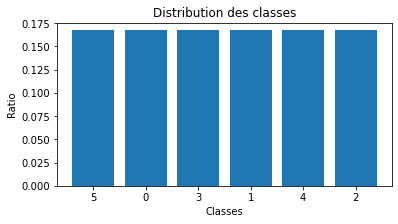

In [20]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_abrupt_balanced_norm']['exploratory-dir'], DATASETS['INSECTS_abrupt_balanced_norm']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

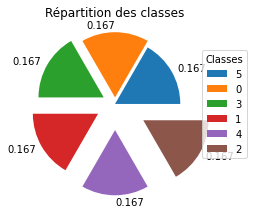

In [21]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_abrupt_balanced_norm']['exploratory-dir'], DATASETS['INSECTS_abrupt_balanced_norm']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [22]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['INSECTS_abrupt_balanced_norm']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de mouvement de 6 types d'insecte captés dans un piège."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-encode'] = classes
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "brusque"

dataset_meta

{'name': 'INSECTS_abrupt_balanced_norm',
 'desc': "jeu de données régissant des résultats de capteurs de mouvement de 6 types d'insecte captés dans un piège.",
 'size': 52848,
 'varriables': ['Att1',
  'Att2',
  'Att3',
  'Att4',
  'Att5',
  'Att6',
  'Att7',
  'Att8',
  'Att9',
  'Att10',
  'Att11',
  'Att12',
  'Att13',
  'Att14',
  'Att15',
  'Att16',
  'Att17',
  'Att18',
  'Att19',
  'Att20',
  'Att21',
  'Att22',
  'Att23',
  'Att24',
  'Att25',
  'Att26',
  'Att27',
  'Att28',
  'Att29',
  'Att30',
  'Att31',
  'Att32',
  'Att33'],
 'var-nbr': 33,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64

In [23]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['INSECTS_abrupt_balanced_norm']['pre-proc-dir'],
                            DATASETS['INSECTS_abrupt_balanced_norm']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['INSECTS_abrupt_balanced_norm']['pre-proc-dir'],
                         DATASETS['INSECTS_abrupt_balanced_norm']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="INSECTS_abrupt_imbalanced_norm">INSECTS_abrupt_imbalanced_norm</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [109]:
dataset_file = os.path.join(DATASETS['INSECTS_abrupt_imbalanced_norm']['brute-dir'],
                            DATASETS['INSECTS_abrupt_imbalanced_norm']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Classification DataStream Benchmark/INSECTS_abrupt_imbalanced_norm.arff'

In [110]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.31416 , 0.368843, 0.012162, 0.292245, 0.347422, 0.392257, 0.35676 , 0.03456 , 0.036474, 0.154278, 0.068419, 0.043861, 0.017855, 0.08921 , 0.149504, 0.024547, 0.015857, 0.03454 , 0.011818, 0.00811 , 0.009644, 0.018389, 0.092593, 0.232866, 0.194215, 0.065509, 0.027749, 0.013341, 0.01378 , 0.02119 , 0.009782, 0.011849, 0.021161, b'ae-aegypti-male'),
        (0.450849, 0.122103, 0.201813, 0.2756  , 0.30377 , 0.008163, 0.195341, 0.040886, 0.043512, 0.04094 , 0.030748, 0.12388 , 0.014166, 0.157579, 0.047932, 0.005501, 0.019722, 0.231787, 0.118031, 0.037774, 0.014443, 0.017317, 0.010068, 0.030013, 0.060822, 0.010857, 0.013668, 0.00789 , 0.009281, 0.066441, 0.251836, 0.140248, 0.08501 , b'ae-aegypti-female'),
        (0.346746, 0.419092, 0.011972, 0.034547, 0.303011, 0.036638, 0.20182 , 0.052141, 0.053174, 0.082507, 0.03009 , 0.068645, 0.025121, 0.029711, 0.080774, 0.090197, 0.01134 , 0.015406, 0.025527, 0.020546, 0.013132, 0.008823, 0.014885, 0.036537, 0.108467, 0.145751, 0.120076,

In [111]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.314160,0.368843,0.012162,0.292245,0.347422,0.392257,0.356760,0.034560,0.036474,0.154278,...,0.194215,0.065509,0.027749,0.013341,0.013780,0.021190,0.009782,0.011849,0.021161,b'ae-aegypti-male'
1,0.450849,0.122103,0.201813,0.275600,0.303770,0.008163,0.195341,0.040886,0.043512,0.040940,...,0.060822,0.010857,0.013668,0.007890,0.009281,0.066441,0.251836,0.140248,0.085010,b'ae-aegypti-female'
2,0.346746,0.419092,0.011972,0.034547,0.303011,0.036638,0.201820,0.052141,0.053174,0.082507,...,0.108467,0.145751,0.120076,0.046312,0.018362,0.013947,0.014449,0.009428,0.010726,b'ae-albopictus-male'
3,0.314927,0.014374,0.194887,0.298821,0.351216,0.327972,0.306784,0.061600,0.045886,0.093672,...,0.106777,0.038048,0.007291,0.005380,0.004947,0.010106,0.005018,0.005335,0.022650,b'cx-quinq-male'
4,0.219811,0.248705,0.016897,0.204891,0.029517,0.179141,0.150731,0.046572,0.044726,0.041880,...,0.015053,0.006755,0.007020,0.006434,0.006772,0.016135,0.038279,0.016603,0.013216,b'ae-aegypti-female'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355270,0.457436,0.529280,0.066411,0.211403,0.312775,0.278353,0.211394,0.005481,0.006530,0.009181,...,0.018754,0.004954,0.007877,0.005208,0.005705,0.009097,0.069049,0.108009,0.099123,b'cx-quinq-female'
355271,0.326427,0.378227,0.302432,0.407587,0.447783,0.004059,0.311465,0.013555,0.010887,0.174085,...,0.300792,0.115545,0.019680,0.005982,0.013245,0.022617,0.012499,0.006678,0.024171,b'cx-quinq-male'
355272,0.747053,0.207719,0.453429,0.346003,0.005902,0.449321,0.418933,0.024737,0.018702,0.019739,...,0.019634,0.151372,0.305209,0.096690,0.024700,0.011447,0.008213,0.004311,0.017948,b'ae-aegypti-male'
355273,0.250820,0.287042,0.309171,0.233554,0.346329,0.307422,0.236488,0.007770,0.290438,0.234244,...,0.031758,0.004397,0.044061,0.013029,0.007792,0.011223,0.007216,0.003207,0.018329,b'ae-albopictus-female'


<b>Nettoyage</b>

variables -> virgule flottante

In [112]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33
0,0.314160,0.368843,0.012162,0.292245,0.347422,0.392257,0.356760,0.034560,0.036474,0.154278,...,0.232866,0.194215,0.065509,0.027749,0.013341,0.013780,0.021190,0.009782,0.011849,0.021161
1,0.450849,0.122103,0.201813,0.275600,0.303770,0.008163,0.195341,0.040886,0.043512,0.040940,...,0.030013,0.060822,0.010857,0.013668,0.007890,0.009281,0.066441,0.251836,0.140248,0.085010
2,0.346746,0.419092,0.011972,0.034547,0.303011,0.036638,0.201820,0.052141,0.053174,0.082507,...,0.036537,0.108467,0.145751,0.120076,0.046312,0.018362,0.013947,0.014449,0.009428,0.010726
3,0.314927,0.014374,0.194887,0.298821,0.351216,0.327972,0.306784,0.061600,0.045886,0.093672,...,0.134490,0.106777,0.038048,0.007291,0.005380,0.004947,0.010106,0.005018,0.005335,0.022650
4,0.219811,0.248705,0.016897,0.204891,0.029517,0.179141,0.150731,0.046572,0.044726,0.041880,...,0.010730,0.015053,0.006755,0.007020,0.006434,0.006772,0.016135,0.038279,0.016603,0.013216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355270,0.457436,0.529280,0.066411,0.211403,0.312775,0.278353,0.211394,0.005481,0.006530,0.009181,...,0.003430,0.018754,0.004954,0.007877,0.005208,0.005705,0.009097,0.069049,0.108009,0.099123
355271,0.326427,0.378227,0.302432,0.407587,0.447783,0.004059,0.311465,0.013555,0.010887,0.174085,...,0.281763,0.300792,0.115545,0.019680,0.005982,0.013245,0.022617,0.012499,0.006678,0.024171
355272,0.747053,0.207719,0.453429,0.346003,0.005902,0.449321,0.418933,0.024737,0.018702,0.019739,...,0.005612,0.019634,0.151372,0.305209,0.096690,0.024700,0.011447,0.008213,0.004311,0.017948
355273,0.250820,0.287042,0.309171,0.233554,0.346329,0.307422,0.236488,0.007770,0.290438,0.234244,...,0.007998,0.031758,0.004397,0.044061,0.013029,0.007792,0.011223,0.007216,0.003207,0.018329


class -> entiers

In [113]:
classes = dataset_df['class'].values.tolist()
classes

[b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-albopictus-male',
 b'cx-quinq-male',
 b'ae-aegypti-female',
 b'cx-quinq-female',
 b'cx-quinq-female',
 b'cx-quinq-male',
 b'cx-quinq-male',
 b'ae-aegypti-female',
 b'ae-albopictus-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'cx-quinq-male',
 b'cx-quinq-female',
 b'ae-aegypti-female',
 b'cx-quinq-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'cx-quinq-female',
 b'cx-quinq-male',
 b'ae-aegypti-female',
 b'cx-quinq-female',
 b'cx-quinq-female',
 b'cx-quinq-female',
 b'ae-aegypti-male',
 b'cx-quinq-female',
 b'ae-aegypti-female',
 b'cx-quinq-male',
 b'cx-quinq-male',
 b'cx-quinq-male',
 b'cx-quinq-female',
 b'ae-aegypti-male',
 b'cx-quinq-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'cx-quinq-male',
 b'cx-quinq-female',
 b'ae-aegypti-male',
 b'cx-quinq-female',
 b'cx-quinq-male',
 b'ae-albopictus-female',
 b'ae-albopictus-female',
 b'cx-quinq-male',
 b'cx-quinq-female',
 

In [114]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['ae-aegypti-male',
 'ae-aegypti-female',
 'ae-albopictus-male',
 'cx-quinq-male',
 'ae-aegypti-female',
 'cx-quinq-female',
 'cx-quinq-female',
 'cx-quinq-male',
 'cx-quinq-male',
 'ae-aegypti-female',
 'ae-albopictus-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'cx-quinq-male',
 'cx-quinq-female',
 'ae-aegypti-female',
 'cx-quinq-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'cx-quinq-female',
 'cx-quinq-male',
 'ae-aegypti-female',
 'cx-quinq-female',
 'cx-quinq-female',
 'cx-quinq-female',
 'ae-aegypti-male',
 'cx-quinq-female',
 'ae-aegypti-female',
 'cx-quinq-male',
 'cx-quinq-male',
 'cx-quinq-male',
 'cx-quinq-female',
 'ae-aegypti-male',
 'cx-quinq-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'cx-quinq-male',
 'cx-quinq-female',
 'ae-aegypti-male',
 'cx-quinq-female',
 'cx-quinq-male',
 'ae-albopictus-female',
 'ae-albopictus-female',
 'cx-quinq-male',
 'cx-quinq-female',
 'cx-quinq-male',
 'ae-aegypti-male',
 'ae-albop

In [115]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(classes)

LabelEncoder()

In [116]:
variables['class'] = label_encoder.transform(classes)
variables['class'] = variables['class'].astype('int32')
dataset_df = variables
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.314160,0.368843,0.012162,0.292245,0.347422,0.392257,0.356760,0.034560,0.036474,0.154278,...,0.194215,0.065509,0.027749,0.013341,0.013780,0.021190,0.009782,0.011849,0.021161,1
1,0.450849,0.122103,0.201813,0.275600,0.303770,0.008163,0.195341,0.040886,0.043512,0.040940,...,0.060822,0.010857,0.013668,0.007890,0.009281,0.066441,0.251836,0.140248,0.085010,0
2,0.346746,0.419092,0.011972,0.034547,0.303011,0.036638,0.201820,0.052141,0.053174,0.082507,...,0.108467,0.145751,0.120076,0.046312,0.018362,0.013947,0.014449,0.009428,0.010726,3
3,0.314927,0.014374,0.194887,0.298821,0.351216,0.327972,0.306784,0.061600,0.045886,0.093672,...,0.106777,0.038048,0.007291,0.005380,0.004947,0.010106,0.005018,0.005335,0.022650,5
4,0.219811,0.248705,0.016897,0.204891,0.029517,0.179141,0.150731,0.046572,0.044726,0.041880,...,0.015053,0.006755,0.007020,0.006434,0.006772,0.016135,0.038279,0.016603,0.013216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355270,0.457436,0.529280,0.066411,0.211403,0.312775,0.278353,0.211394,0.005481,0.006530,0.009181,...,0.018754,0.004954,0.007877,0.005208,0.005705,0.009097,0.069049,0.108009,0.099123,4
355271,0.326427,0.378227,0.302432,0.407587,0.447783,0.004059,0.311465,0.013555,0.010887,0.174085,...,0.300792,0.115545,0.019680,0.005982,0.013245,0.022617,0.012499,0.006678,0.024171,5
355272,0.747053,0.207719,0.453429,0.346003,0.005902,0.449321,0.418933,0.024737,0.018702,0.019739,...,0.019634,0.151372,0.305209,0.096690,0.024700,0.011447,0.008213,0.004311,0.017948,1
355273,0.250820,0.287042,0.309171,0.233554,0.346329,0.307422,0.236488,0.007770,0.290438,0.234244,...,0.031758,0.004397,0.044061,0.013029,0.007792,0.011223,0.007216,0.003207,0.018329,2


<b>Taille</b>

In [117]:
Taille = len(dataset_df.index)
Taille

355275

<b>Variables</b>

In [118]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['Att1',
 'Att2',
 'Att3',
 'Att4',
 'Att5',
 'Att6',
 'Att7',
 'Att8',
 'Att9',
 'Att10',
 'Att11',
 'Att12',
 'Att13',
 'Att14',
 'Att15',
 'Att16',
 'Att17',
 'Att18',
 'Att19',
 'Att20',
 'Att21',
 'Att22',
 'Att23',
 'Att24',
 'Att25',
 'Att26',
 'Att27',
 'Att28',
 'Att29',
 'Att30',
 'Att31',
 'Att32',
 'Att33']

In [119]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [120]:
# Distribution des classes

classes = list(set(classes))
classes_encoded = list(label_encoder.transform(classes))

classes_dist = dict()
for classe in classes_encoded :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[str(classe)] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)


## Correspondance
classes_encoded = [str(classe_encoded) for classe_encoded in classes_encoded ]
classes = dict(zip(classes_encoded, classes))

0  :  101256
1  :  67237
5  :  99557
4  :  54320
2  :  21204
3  :  11701
Total =  355275
Distribution correcte !
Nombre de classes trouvées =  6


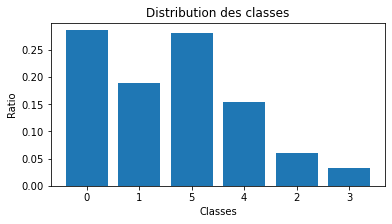

In [121]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_abrupt_imbalanced_norm']['exploratory-dir'], DATASETS['INSECTS_abrupt_imbalanced_norm']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

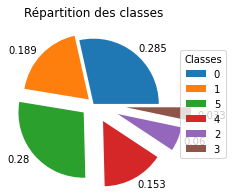

In [122]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_abrupt_imbalanced_norm']['exploratory-dir'], DATASETS['INSECTS_abrupt_imbalanced_norm']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [123]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['INSECTS_abrupt_imbalanced_norm']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de mouvement de 6 types d'insecte captés dans un piège."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-encode'] = classes
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "-"

dataset_meta

{'name': 'INSECTS_abrupt_imbalanced_norm',
 'desc': "jeu de données régissant des résultats de capteurs de mouvement de 6 types d'insecte captés dans un piège.",
 'size': 355275,
 'varriables': ['Att1',
  'Att2',
  'Att3',
  'Att4',
  'Att5',
  'Att6',
  'Att7',
  'Att8',
  'Att9',
  'Att10',
  'Att11',
  'Att12',
  'Att13',
  'Att14',
  'Att15',
  'Att16',
  'Att17',
  'Att18',
  'Att19',
  'Att20',
  'Att21',
  'Att22',
  'Att23',
  'Att24',
  'Att25',
  'Att26',
  'Att27',
  'Att28',
  'Att29',
  'Att30',
  'Att31',
  'Att32',
  'Att33'],
 'var-nbr': 33,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'floa

In [124]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['INSECTS_abrupt_imbalanced_norm']['pre-proc-dir'],
                            DATASETS['INSECTS_abrupt_imbalanced_norm']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['INSECTS_abrupt_imbalanced_norm']['pre-proc-dir'],
                         DATASETS['INSECTS_abrupt_imbalanced_norm']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="INSECTS_gradual_balanced_norm">INSECTS_gradual_balanced_norm</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [125]:
dataset_file = os.path.join(DATASETS['INSECTS_gradual_balanced_norm']['brute-dir'],
                            DATASETS['INSECTS_gradual_balanced_norm']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Classification DataStream Benchmark/INSECTS_gradual_balanced_norm.arff'

In [126]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.221687, 0.278738, 0.230267, 0.012072, 0.291936, 0.368676, 0.306643, 0.148194, 0.373911, 0.239031, 0.153688, 0.323044, 0.239671, 0.137238, 0.189301, 0.085801, 0.067635, 0.170181, 0.399079, 0.379827, 0.208618, 0.126325, 0.083368, 0.095399, 0.03128 , 0.117695, 0.086213, 0.051817, 0.032058, 0.024235, 0.057984, 0.084282, 0.246349, b'ae-aegypti-female'),
        (0.216156, 0.24849 , 0.207935, 0.27761 , 0.012118, 0.02227 , 0.215332, 0.034307, 0.032627, 0.038244, 0.0243  , 0.115212, 0.009217, 0.049035, 0.014365, 0.006801, 0.01568 , 0.139665, 0.108172, 0.030791, 0.007528, 0.012768, 0.005183, 0.018137, 0.011887, 0.006941, 0.005115, 0.004826, 0.006064, 0.024626, 0.088533, 0.05234 , 0.02588 , b'ae-aegypti-female'),
        (0.458254, 0.011934, 0.290734, 0.228966, 0.108324, 0.422456, 0.334562, 0.075886, 0.055659, 0.032657, 0.02107 , 0.080459, 0.015459, 0.085894, 0.019104, 0.031171, 0.010708, 0.052396, 0.075675, 0.016552, 0.006909, 0.008097, 0.042337, 0.015517, 0.014689, 0.043372, 0.03815

In [127]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.221687,0.278738,0.230267,0.012072,0.291936,0.368676,0.306643,0.148194,0.373911,0.239031,...,0.031280,0.117695,0.086213,0.051817,0.032058,0.024235,0.057984,0.084282,0.246349,b'ae-aegypti-female'
1,0.216156,0.248490,0.207935,0.277610,0.012118,0.022270,0.215332,0.034307,0.032627,0.038244,...,0.011887,0.006941,0.005115,0.004826,0.006064,0.024626,0.088533,0.052340,0.025880,b'ae-aegypti-female'
2,0.458254,0.011934,0.290734,0.228966,0.108324,0.422456,0.334562,0.075886,0.055659,0.032657,...,0.014689,0.043372,0.038154,0.019074,0.013496,0.023259,0.085427,0.143533,0.107721,b'ae-aegypti-male'
3,0.399140,0.452438,0.375610,0.500829,0.002449,0.606104,0.563900,0.011115,0.007772,0.005426,...,0.002710,0.011455,0.037303,0.308902,0.297547,0.099780,0.020431,0.005512,0.006190,b'ae-aegypti-male'
4,0.418305,0.479065,0.397929,0.000868,0.511484,0.643908,0.604099,0.015001,0.007669,0.003962,...,0.003295,0.006972,0.010259,0.031866,0.212833,0.203114,0.100263,0.019290,0.012371,b'ae-aegypti-male'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24145,0.349471,0.400771,0.005798,0.333179,0.431198,0.546270,0.496879,0.034361,0.019016,0.061211,...,0.071119,0.232142,0.110718,0.044183,0.013570,0.007121,0.007556,0.007497,0.009246,b'ae-albopictus-male'
24146,0.640327,0.174622,0.298338,0.396216,0.006706,0.486061,0.432158,0.012083,0.012982,0.049050,...,0.046233,0.024583,0.010133,0.009969,0.013310,0.008816,0.005726,0.018463,0.049414,b'ae-albopictus-male'
24147,0.277232,0.324583,0.269065,0.357360,0.011804,0.438470,0.378477,0.018315,0.084183,0.029152,...,0.009210,0.012845,0.015609,0.006492,0.011520,0.022787,0.010899,0.008300,0.012211,b'ae-albopictus-male'
24148,0.329867,0.379020,0.005716,0.316917,0.399384,0.039503,0.365419,0.076165,0.051042,0.335760,...,0.362278,0.388240,0.099521,0.022174,0.027390,0.025400,0.021686,0.015319,0.021907,b'ae-albopictus-male'


<b>Nettoyage</b>

variables -> virgule flottante

In [128]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33
0,0.221687,0.278738,0.230267,0.012072,0.291936,0.368676,0.306643,0.148194,0.373911,0.239031,...,0.095399,0.031280,0.117695,0.086213,0.051817,0.032058,0.024235,0.057984,0.084282,0.246349
1,0.216156,0.248490,0.207935,0.277610,0.012118,0.022270,0.215332,0.034307,0.032627,0.038244,...,0.018137,0.011887,0.006941,0.005115,0.004826,0.006064,0.024626,0.088533,0.052340,0.025880
2,0.458254,0.011934,0.290734,0.228966,0.108324,0.422456,0.334562,0.075886,0.055659,0.032657,...,0.015517,0.014689,0.043372,0.038154,0.019074,0.013496,0.023259,0.085427,0.143533,0.107721
3,0.399140,0.452438,0.375610,0.500829,0.002449,0.606104,0.563900,0.011115,0.007772,0.005426,...,0.004058,0.002710,0.011455,0.037303,0.308902,0.297547,0.099780,0.020431,0.005512,0.006190
4,0.418305,0.479065,0.397929,0.000868,0.511484,0.643908,0.604099,0.015001,0.007669,0.003962,...,0.007928,0.003295,0.006972,0.010259,0.031866,0.212833,0.203114,0.100263,0.019290,0.012371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24145,0.349471,0.400771,0.005798,0.333179,0.431198,0.546270,0.496879,0.034361,0.019016,0.061211,...,0.026212,0.071119,0.232142,0.110718,0.044183,0.013570,0.007121,0.007556,0.007497,0.009246
24146,0.640327,0.174622,0.298338,0.396216,0.006706,0.486061,0.432158,0.012083,0.012982,0.049050,...,0.181892,0.046233,0.024583,0.010133,0.009969,0.013310,0.008816,0.005726,0.018463,0.049414
24147,0.277232,0.324583,0.269065,0.357360,0.011804,0.438470,0.378477,0.018315,0.084183,0.029152,...,0.047843,0.009210,0.012845,0.015609,0.006492,0.011520,0.022787,0.010899,0.008300,0.012211
24148,0.329867,0.379020,0.005716,0.316917,0.399384,0.039503,0.365419,0.076165,0.051042,0.335760,...,0.369102,0.362278,0.388240,0.099521,0.022174,0.027390,0.025400,0.021686,0.015319,0.021907


class -> entiers

In [129]:
classes = dataset_df['class'].values.tolist()
classes

[b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'cx-quinq-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'cx-quinq-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'cx-quinq-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'cx-quinq-female',
 b'ae-aegypti-male',
 b'cx-quinq-female',
 b'ae-aegypti-male',
 b'a

In [130]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'cx-quinq-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'cx-quinq-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'cx-quinq-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'cx-quinq-female',
 'ae-aegypti-male',
 'cx-quinq-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aeg

In [131]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(classes)

LabelEncoder()

In [132]:
variables['class'] = label_encoder.transform(classes)
variables['class'] = variables['class'].astype('int32')
dataset_df = variables
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.221687,0.278738,0.230267,0.012072,0.291936,0.368676,0.306643,0.148194,0.373911,0.239031,...,0.031280,0.117695,0.086213,0.051817,0.032058,0.024235,0.057984,0.084282,0.246349,0
1,0.216156,0.248490,0.207935,0.277610,0.012118,0.022270,0.215332,0.034307,0.032627,0.038244,...,0.011887,0.006941,0.005115,0.004826,0.006064,0.024626,0.088533,0.052340,0.025880,0
2,0.458254,0.011934,0.290734,0.228966,0.108324,0.422456,0.334562,0.075886,0.055659,0.032657,...,0.014689,0.043372,0.038154,0.019074,0.013496,0.023259,0.085427,0.143533,0.107721,1
3,0.399140,0.452438,0.375610,0.500829,0.002449,0.606104,0.563900,0.011115,0.007772,0.005426,...,0.002710,0.011455,0.037303,0.308902,0.297547,0.099780,0.020431,0.005512,0.006190,1
4,0.418305,0.479065,0.397929,0.000868,0.511484,0.643908,0.604099,0.015001,0.007669,0.003962,...,0.003295,0.006972,0.010259,0.031866,0.212833,0.203114,0.100263,0.019290,0.012371,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24145,0.349471,0.400771,0.005798,0.333179,0.431198,0.546270,0.496879,0.034361,0.019016,0.061211,...,0.071119,0.232142,0.110718,0.044183,0.013570,0.007121,0.007556,0.007497,0.009246,3
24146,0.640327,0.174622,0.298338,0.396216,0.006706,0.486061,0.432158,0.012083,0.012982,0.049050,...,0.046233,0.024583,0.010133,0.009969,0.013310,0.008816,0.005726,0.018463,0.049414,3
24147,0.277232,0.324583,0.269065,0.357360,0.011804,0.438470,0.378477,0.018315,0.084183,0.029152,...,0.009210,0.012845,0.015609,0.006492,0.011520,0.022787,0.010899,0.008300,0.012211,3
24148,0.329867,0.379020,0.005716,0.316917,0.399384,0.039503,0.365419,0.076165,0.051042,0.335760,...,0.362278,0.388240,0.099521,0.022174,0.027390,0.025400,0.021686,0.015319,0.021907,3


<b>Taille</b>

In [133]:
Taille = len(dataset_df.index)
Taille

24150

<b>Variables</b>

In [134]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['Att1',
 'Att2',
 'Att3',
 'Att4',
 'Att5',
 'Att6',
 'Att7',
 'Att8',
 'Att9',
 'Att10',
 'Att11',
 'Att12',
 'Att13',
 'Att14',
 'Att15',
 'Att16',
 'Att17',
 'Att18',
 'Att19',
 'Att20',
 'Att21',
 'Att22',
 'Att23',
 'Att24',
 'Att25',
 'Att26',
 'Att27',
 'Att28',
 'Att29',
 'Att30',
 'Att31',
 'Att32',
 'Att33']

In [135]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [136]:
# Distribution des classes

classes = list(set(classes))
classes_encoded = list(label_encoder.transform(classes))

classes_dist = dict()
for classe in classes_encoded :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[str(classe)] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)


## Correspondance
classes_encoded = [str(classe_encoded) for classe_encoded in classes_encoded ]
classes = dict(zip(classes_encoded, classes))

0  :  4025
1  :  4025
5  :  4025
4  :  4025
2  :  4025
3  :  4025
Total =  24150
Distribution correcte !
Nombre de classes trouvées =  6


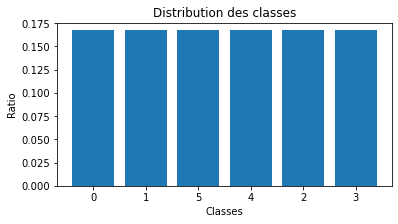

In [137]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_gradual_balanced_norm']['exploratory-dir'], DATASETS['INSECTS_gradual_balanced_norm']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

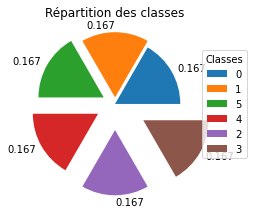

In [138]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_gradual_balanced_norm']['exploratory-dir'], DATASETS['INSECTS_gradual_balanced_norm']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [139]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['INSECTS_gradual_balanced_norm']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-encode'] = classes
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "graduel"

dataset_meta

{'name': 'INSECTS_gradual_balanced_norm',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 24150,
 'varriables': ['Att1',
  'Att2',
  'Att3',
  'Att4',
  'Att5',
  'Att6',
  'Att7',
  'Att8',
  'Att9',
  'Att10',
  'Att11',
  'Att12',
  'Att13',
  'Att14',
  'Att15',
  'Att16',
  'Att17',
  'Att18',
  'Att19',
  'Att20',
  'Att21',
  'Att22',
  'Att23',
  'Att24',
  'Att25',
  'Att26',
  'Att27',
  'Att28',
  'Att29',
  'Att30',
  'Att31',
  'Att32',
  'Att33'],
 'var-nbr': 33,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 'classes': 

In [140]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['INSECTS_gradual_balanced_norm']['pre-proc-dir'],
                            DATASETS['INSECTS_gradual_balanced_norm']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['INSECTS_gradual_balanced_norm']['pre-proc-dir'],
                         DATASETS['INSECTS_gradual_balanced_norm']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="INSECTS_gradual_imbalanced_norm">INSECTS_gradual_imbalanced_norm</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [141]:
dataset_file = os.path.join(DATASETS['INSECTS_gradual_imbalanced_norm']['brute-dir'],
                            DATASETS['INSECTS_gradual_imbalanced_norm']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Classification DataStream Benchmark/INSECTS_gradual_imbalanced_norm.arff'

In [142]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.234941, 0.266894, 0.22343 , 0.29474 , 0.322286, 0.386103, 0.289503, 0.012651, 0.054138, 0.121616, 0.007246, 0.189765, 0.038598, 0.055017, 0.023536, 0.006343, 0.005364, 0.033389, 0.183276, 0.11609 , 0.037265, 0.012515, 0.014801, 0.009786, 0.013195, 0.059838, 0.009371, 0.01115 , 0.006002, 0.004551, 0.015152, 0.115582, 0.228292, b'ae-aegypti-female'),
        (0.548039, 0.031149, 0.091009, 0.255453, 0.063735, 0.284683, 0.23578 , 0.132054, 0.117773, 0.163662, 0.090007, 0.082343, 0.114214, 0.102019, 0.088682, 0.094298, 0.065491, 0.032452, 0.031099, 0.081028, 0.13468 , 0.084977, 0.070607, 0.062869, 0.068615, 0.060651, 0.050835, 0.03673 , 0.071154, 0.055531, 0.043923, 0.032274, 0.025698, b'ae-aegypti-female'),
        (0.459476, 0.124122, 0.21761 , 0.288023, 0.313382, 0.01027 , 0.272405, 0.009646, 0.013868, 0.039958, 0.00728 , 0.119608, 0.007459, 0.07933 , 0.022039, 0.002962, 0.005517, 0.064821, 0.094307, 0.036058, 0.006022, 0.005252, 0.012679, 0.00406 , 0.023673, 0.012112, 0.00771

In [143]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.234941,0.266894,0.223430,0.294740,0.322286,0.386103,0.289503,0.012651,0.054138,0.121616,...,0.013195,0.059838,0.009371,0.011150,0.006002,0.004551,0.015152,0.115582,0.228292,b'ae-aegypti-female'
1,0.548039,0.031149,0.091009,0.255453,0.063735,0.284683,0.235780,0.132054,0.117773,0.163662,...,0.068615,0.060651,0.050835,0.036730,0.071154,0.055531,0.043923,0.032274,0.025698,b'ae-aegypti-female'
2,0.459476,0.124122,0.217610,0.288023,0.313382,0.010270,0.272405,0.009646,0.013868,0.039958,...,0.023673,0.012112,0.007712,0.003141,0.003628,0.011931,0.057339,0.152119,0.118163,b'ae-aegypti-female'
3,0.259176,0.299472,0.012392,0.034288,0.216926,0.289124,0.257777,0.072300,0.247851,0.142136,...,0.027823,0.021453,0.014601,0.024978,0.023731,0.016271,0.014823,0.013093,0.018801,b'ae-aegypti-female'
4,0.456695,0.004778,0.285420,0.425891,0.495916,0.029827,0.506113,0.034476,0.013533,0.009127,...,0.011801,0.005220,0.006171,0.004810,0.016382,0.047970,0.137083,0.141625,0.102133,b'ae-aegypti-male'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143318,0.206139,0.244063,0.201928,0.266823,0.293843,0.352390,0.260191,0.181560,0.187139,0.122097,...,0.021840,0.028733,0.018570,0.011901,0.070527,0.323286,0.337571,0.127448,0.036209,b'ae-albopictus-female'
143319,0.308770,0.355945,0.292859,0.388079,0.424768,0.510549,0.402139,0.004061,0.006705,0.095083,...,0.101997,0.016607,0.008695,0.004579,0.014455,0.005802,0.006743,0.044084,0.017805,b'ae-albopictus-male'
143320,0.441949,0.122717,0.207773,0.276064,0.361264,0.300447,0.267202,0.005942,0.006696,0.016393,...,0.014578,0.005742,0.006488,0.003854,0.007690,0.048398,0.159478,0.113395,0.023501,b'ae-aegypti-female'
143321,0.199836,0.226227,0.012191,0.023507,0.160351,0.217133,0.176100,0.166055,0.149905,0.093940,...,0.014006,0.010670,0.023619,0.041225,0.070380,0.057333,0.026868,0.016502,0.014761,b'ae-aegypti-female'


<b>Nettoyage</b>

variables -> virgule flottante

In [144]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33
0,0.234941,0.266894,0.223430,0.294740,0.322286,0.386103,0.289503,0.012651,0.054138,0.121616,...,0.009786,0.013195,0.059838,0.009371,0.011150,0.006002,0.004551,0.015152,0.115582,0.228292
1,0.548039,0.031149,0.091009,0.255453,0.063735,0.284683,0.235780,0.132054,0.117773,0.163662,...,0.062869,0.068615,0.060651,0.050835,0.036730,0.071154,0.055531,0.043923,0.032274,0.025698
2,0.459476,0.124122,0.217610,0.288023,0.313382,0.010270,0.272405,0.009646,0.013868,0.039958,...,0.004060,0.023673,0.012112,0.007712,0.003141,0.003628,0.011931,0.057339,0.152119,0.118163
3,0.259176,0.299472,0.012392,0.034288,0.216926,0.289124,0.257777,0.072300,0.247851,0.142136,...,0.026466,0.027823,0.021453,0.014601,0.024978,0.023731,0.016271,0.014823,0.013093,0.018801
4,0.456695,0.004778,0.285420,0.425891,0.495916,0.029827,0.506113,0.034476,0.013533,0.009127,...,0.006020,0.011801,0.005220,0.006171,0.004810,0.016382,0.047970,0.137083,0.141625,0.102133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143318,0.206139,0.244063,0.201928,0.266823,0.293843,0.352390,0.260191,0.181560,0.187139,0.122097,...,0.071422,0.021840,0.028733,0.018570,0.011901,0.070527,0.323286,0.337571,0.127448,0.036209
143319,0.308770,0.355945,0.292859,0.388079,0.424768,0.510549,0.402139,0.004061,0.006705,0.095083,...,0.227724,0.101997,0.016607,0.008695,0.004579,0.014455,0.005802,0.006743,0.044084,0.017805
143320,0.441949,0.122717,0.207773,0.276064,0.361264,0.300447,0.267202,0.005942,0.006696,0.016393,...,0.015919,0.014578,0.005742,0.006488,0.003854,0.007690,0.048398,0.159478,0.113395,0.023501
143321,0.199836,0.226227,0.012191,0.023507,0.160351,0.217133,0.176100,0.166055,0.149905,0.093940,...,0.013291,0.014006,0.010670,0.023619,0.041225,0.070380,0.057333,0.026868,0.016502,0.014761


class -> entiers

In [145]:
classes = dataset_df['class'].values.tolist()
classes

[b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'cx-quinq-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegyp

In [146]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'cx-quinq-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-mal

In [147]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(classes)

LabelEncoder()

In [148]:
variables['class'] = label_encoder.transform(classes)
variables['class'] = variables['class'].astype('int32')
dataset_df = variables
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.234941,0.266894,0.223430,0.294740,0.322286,0.386103,0.289503,0.012651,0.054138,0.121616,...,0.013195,0.059838,0.009371,0.011150,0.006002,0.004551,0.015152,0.115582,0.228292,0
1,0.548039,0.031149,0.091009,0.255453,0.063735,0.284683,0.235780,0.132054,0.117773,0.163662,...,0.068615,0.060651,0.050835,0.036730,0.071154,0.055531,0.043923,0.032274,0.025698,0
2,0.459476,0.124122,0.217610,0.288023,0.313382,0.010270,0.272405,0.009646,0.013868,0.039958,...,0.023673,0.012112,0.007712,0.003141,0.003628,0.011931,0.057339,0.152119,0.118163,0
3,0.259176,0.299472,0.012392,0.034288,0.216926,0.289124,0.257777,0.072300,0.247851,0.142136,...,0.027823,0.021453,0.014601,0.024978,0.023731,0.016271,0.014823,0.013093,0.018801,0
4,0.456695,0.004778,0.285420,0.425891,0.495916,0.029827,0.506113,0.034476,0.013533,0.009127,...,0.011801,0.005220,0.006171,0.004810,0.016382,0.047970,0.137083,0.141625,0.102133,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143318,0.206139,0.244063,0.201928,0.266823,0.293843,0.352390,0.260191,0.181560,0.187139,0.122097,...,0.021840,0.028733,0.018570,0.011901,0.070527,0.323286,0.337571,0.127448,0.036209,2
143319,0.308770,0.355945,0.292859,0.388079,0.424768,0.510549,0.402139,0.004061,0.006705,0.095083,...,0.101997,0.016607,0.008695,0.004579,0.014455,0.005802,0.006743,0.044084,0.017805,3
143320,0.441949,0.122717,0.207773,0.276064,0.361264,0.300447,0.267202,0.005942,0.006696,0.016393,...,0.014578,0.005742,0.006488,0.003854,0.007690,0.048398,0.159478,0.113395,0.023501,0
143321,0.199836,0.226227,0.012191,0.023507,0.160351,0.217133,0.176100,0.166055,0.149905,0.093940,...,0.014006,0.010670,0.023619,0.041225,0.070380,0.057333,0.026868,0.016502,0.014761,0


<b>Taille</b>

In [149]:
Taille = len(dataset_df.index)
Taille

143323

<b>Variables</b>

In [150]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['Att1',
 'Att2',
 'Att3',
 'Att4',
 'Att5',
 'Att6',
 'Att7',
 'Att8',
 'Att9',
 'Att10',
 'Att11',
 'Att12',
 'Att13',
 'Att14',
 'Att15',
 'Att16',
 'Att17',
 'Att18',
 'Att19',
 'Att20',
 'Att21',
 'Att22',
 'Att23',
 'Att24',
 'Att25',
 'Att26',
 'Att27',
 'Att28',
 'Att29',
 'Att30',
 'Att31',
 'Att32',
 'Att33']

In [151]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [152]:
# Distribution des classes

classes = list(set(classes))
classes_encoded = list(label_encoder.transform(classes))

classes_dist = dict()
for classe in classes_encoded :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[str(classe)] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)


## Correspondance
classes_encoded = [str(classe_encoded) for classe_encoded in classes_encoded ]
classes = dict(zip(classes_encoded, classes))

0  :  30231
1  :  31219
5  :  42384
4  :  25318
2  :  9304
3  :  4867
Total =  143323
Distribution correcte !
Nombre de classes trouvées =  6


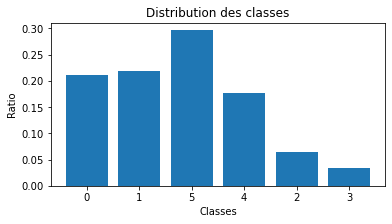

In [153]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_gradual_imbalanced_norm']['exploratory-dir'], DATASETS['INSECTS_gradual_imbalanced_norm']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

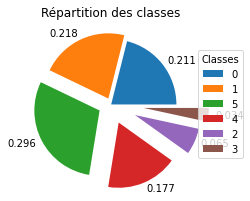

In [154]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_gradual_imbalanced_norm']['exploratory-dir'], DATASETS['INSECTS_gradual_imbalanced_norm']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [155]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['INSECTS_gradual_imbalanced_norm']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-encode'] = classes
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "graduel"

dataset_meta

{'name': 'INSECTS_gradual_imbalanced_norm',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 143323,
 'varriables': ['Att1',
  'Att2',
  'Att3',
  'Att4',
  'Att5',
  'Att6',
  'Att7',
  'Att8',
  'Att9',
  'Att10',
  'Att11',
  'Att12',
  'Att13',
  'Att14',
  'Att15',
  'Att16',
  'Att17',
  'Att18',
  'Att19',
  'Att20',
  'Att21',
  'Att22',
  'Att23',
  'Att24',
  'Att25',
  'Att26',
  'Att27',
  'Att28',
  'Att29',
  'Att30',
  'Att31',
  'Att32',
  'Att33'],
 'var-nbr': 33,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 'classes

In [156]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['INSECTS_gradual_imbalanced_norm']['pre-proc-dir'],
                            DATASETS['INSECTS_gradual_imbalanced_norm']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['INSECTS_gradual_imbalanced_norm']['pre-proc-dir'],
                         DATASETS['INSECTS_gradual_imbalanced_norm']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="INSECTS_incremental_balanced_norm">INSECTS_incremental_balanced_norm</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [157]:
dataset_file = os.path.join(DATASETS['INSECTS_incremental_balanced_norm']['brute-dir'],
                            DATASETS['INSECTS_incremental_balanced_norm']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Classification DataStream Benchmark/INSECTS_incremental_balanced_norm.arff'

In [158]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.162919, 0.223581, 0.170982, 0.210447, 0.260262, 0.313684, 0.210527, 0.129912, 0.108045, 0.314143, 0.111188, 0.096811, 0.01478 , 0.034073, 0.410446, 0.223038, 0.087762, 0.031736, 0.01004 , 0.078611, 0.011295, 0.015796, 0.006302, 0.035065, 0.184005, 0.107587, 0.029085, 0.019693, 0.005861, 0.024745, 0.012178, 0.00758 , 0.006055, b'ae-albopictus-female'),
        (0.17991 , 0.015617, 0.018342, 0.111462, 0.028435, 0.164292, 0.105495, 0.08592 , 0.079683, 0.048566, 0.074946, 0.028445, 0.025069, 0.02024 , 0.029956, 0.061106, 0.053038, 0.024743, 0.015615, 0.013575, 0.012547, 0.014593, 0.010509, 0.009581, 0.008929, 0.016024, 0.024117, 0.021911, 0.010983, 0.01077 , 0.010413, 0.00968 , 0.007052, b'ae-albopictus-female'),
        (0.093009, 0.171964, 0.1036  , 0.193611, 0.206219, 0.260224, 0.183089, 0.275424, 0.240193, 0.236459, 0.209369, 0.157789, 0.12924 , 0.133627, 0.118952, 0.077244, 0.065488, 0.059544, 0.039587, 0.034445, 0.03039 , 0.035581, 0.030603, 0.034363, 0.030383, 0.024538, 0

In [159]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.162919,0.223581,0.170982,0.210447,0.260262,0.313684,0.210527,0.129912,0.108045,0.314143,...,0.184005,0.107587,0.029085,0.019693,0.005861,0.024745,0.012178,0.007580,0.006055,b'ae-albopictus-female'
1,0.179910,0.015617,0.018342,0.111462,0.028435,0.164292,0.105495,0.085920,0.079683,0.048566,...,0.008929,0.016024,0.024117,0.021911,0.010983,0.010770,0.010413,0.009680,0.007052,b'ae-albopictus-female'
2,0.093009,0.171964,0.103600,0.193611,0.206219,0.260224,0.183089,0.275424,0.240193,0.236459,...,0.030383,0.024538,0.023142,0.027263,0.019545,0.021473,0.022304,0.016444,0.013020,b'cx-quinq-male'
3,0.364570,0.120045,0.186800,0.226773,0.280583,0.335924,0.229092,0.217283,0.212943,0.101705,...,0.032920,0.181381,0.292963,0.176154,0.028934,0.014860,0.024450,0.061111,0.008718,b'ae-albopictus-female'
4,0.257008,0.353529,0.007418,0.330596,0.027673,0.239377,0.283919,0.036563,0.088543,0.056334,...,0.007628,0.009555,0.005842,0.019820,0.006230,0.005064,0.009392,0.007614,0.005202,b'ae-aegypti-male'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57013,0.562268,0.183415,0.375939,0.258558,0.509252,0.600390,0.490171,0.002612,0.033014,0.008796,...,0.004282,0.009679,0.008692,0.004108,0.018510,0.012258,0.004962,0.006172,0.005519,b'ae-albopictus-female'
57014,0.240139,0.326005,0.006055,0.220982,0.293031,0.368863,0.314305,0.045538,0.079011,0.089466,...,0.014705,0.030068,0.010801,0.014773,0.011011,0.010857,0.017171,0.051595,0.090258,b'ae-aegypti-female'
57015,0.205250,0.281994,0.217749,0.264718,0.390612,0.006439,0.323978,0.118622,0.119251,0.082268,...,0.018091,0.014782,0.009773,0.016811,0.073063,0.245475,0.192334,0.074523,0.020860,b'cx-quinq-female'
57016,0.308834,0.425707,0.326710,0.397737,0.022402,0.011996,0.360777,0.012555,0.011269,0.039137,...,0.036967,0.009424,0.005501,0.008485,0.005072,0.009786,0.009940,0.013624,0.017133,b'cx-quinq-male'


<b>Nettoyage</b>

variables -> virgule flottante

In [160]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33
0,0.162919,0.223581,0.170982,0.210447,0.260262,0.313684,0.210527,0.129912,0.108045,0.314143,...,0.035065,0.184005,0.107587,0.029085,0.019693,0.005861,0.024745,0.012178,0.007580,0.006055
1,0.179910,0.015617,0.018342,0.111462,0.028435,0.164292,0.105495,0.085920,0.079683,0.048566,...,0.009581,0.008929,0.016024,0.024117,0.021911,0.010983,0.010770,0.010413,0.009680,0.007052
2,0.093009,0.171964,0.103600,0.193611,0.206219,0.260224,0.183089,0.275424,0.240193,0.236459,...,0.034363,0.030383,0.024538,0.023142,0.027263,0.019545,0.021473,0.022304,0.016444,0.013020
3,0.364570,0.120045,0.186800,0.226773,0.280583,0.335924,0.229092,0.217283,0.212943,0.101705,...,0.009922,0.032920,0.181381,0.292963,0.176154,0.028934,0.014860,0.024450,0.061111,0.008718
4,0.257008,0.353529,0.007418,0.330596,0.027673,0.239377,0.283919,0.036563,0.088543,0.056334,...,0.008164,0.007628,0.009555,0.005842,0.019820,0.006230,0.005064,0.009392,0.007614,0.005202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57013,0.562268,0.183415,0.375939,0.258558,0.509252,0.600390,0.490171,0.002612,0.033014,0.008796,...,0.007439,0.004282,0.009679,0.008692,0.004108,0.018510,0.012258,0.004962,0.006172,0.005519
57014,0.240139,0.326005,0.006055,0.220982,0.293031,0.368863,0.314305,0.045538,0.079011,0.089466,...,0.019193,0.014705,0.030068,0.010801,0.014773,0.011011,0.010857,0.017171,0.051595,0.090258
57015,0.205250,0.281994,0.217749,0.264718,0.390612,0.006439,0.323978,0.118622,0.119251,0.082268,...,0.068006,0.018091,0.014782,0.009773,0.016811,0.073063,0.245475,0.192334,0.074523,0.020860
57016,0.308834,0.425707,0.326710,0.397737,0.022402,0.011996,0.360777,0.012555,0.011269,0.039137,...,0.128909,0.036967,0.009424,0.005501,0.008485,0.005072,0.009786,0.009940,0.013624,0.017133


class -> entiers

In [161]:
classes = dataset_df['class'].values.tolist()
classes

[b'ae-albopictus-female',
 b'ae-albopictus-female',
 b'cx-quinq-male',
 b'ae-albopictus-female',
 b'ae-aegypti-male',
 b'cx-quinq-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'cx-quinq-female',
 b'ae-aegypti-female',
 b'ae-albopictus-female',
 b'ae-aegypti-male',
 b'ae-albopictus-male',
 b'cx-quinq-female',
 b'ae-aegypti-female',
 b'ae-albopictus-female',
 b'cx-quinq-male',
 b'cx-quinq-male',
 b'cx-quinq-male',
 b'cx-quinq-female',
 b'cx-quinq-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-albopictus-female',
 b'ae-aegypti-female',
 b'ae-albopictus-female',
 b'cx-quinq-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'cx-quinq-male',
 b'cx-quinq-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-albopictus-female',
 b'ae-albopictus-male',
 b'ae-albopictus-male',
 b'cx-quinq-female',
 b'cx-quinq-female',
 b'ae-albopictus-male',
 b'ae-albopictus-male',
 b'cx-quinq-female',
 b'ae-albopictus-male

In [162]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['ae-albopictus-female',
 'ae-albopictus-female',
 'cx-quinq-male',
 'ae-albopictus-female',
 'ae-aegypti-male',
 'cx-quinq-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'cx-quinq-female',
 'ae-aegypti-female',
 'ae-albopictus-female',
 'ae-aegypti-male',
 'ae-albopictus-male',
 'cx-quinq-female',
 'ae-aegypti-female',
 'ae-albopictus-female',
 'cx-quinq-male',
 'cx-quinq-male',
 'cx-quinq-male',
 'cx-quinq-female',
 'cx-quinq-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-albopictus-female',
 'ae-aegypti-female',
 'ae-albopictus-female',
 'cx-quinq-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'cx-quinq-male',
 'cx-quinq-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-albopictus-female',
 'ae-albopictus-male',
 'ae-albopictus-male',
 'cx-quinq-female',
 'cx-quinq-female',
 'ae-albopictus-male',
 'ae-albopictus-male',
 'cx-quinq-female',
 'ae-albopictus-male',
 'ae-albopictus-male',
 'cx-quinq-female',

In [163]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(classes)

LabelEncoder()

In [164]:
variables['class'] = label_encoder.transform(classes)
variables['class'] = variables['class'].astype('int32')
dataset_df = variables
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.162919,0.223581,0.170982,0.210447,0.260262,0.313684,0.210527,0.129912,0.108045,0.314143,...,0.184005,0.107587,0.029085,0.019693,0.005861,0.024745,0.012178,0.007580,0.006055,2
1,0.179910,0.015617,0.018342,0.111462,0.028435,0.164292,0.105495,0.085920,0.079683,0.048566,...,0.008929,0.016024,0.024117,0.021911,0.010983,0.010770,0.010413,0.009680,0.007052,2
2,0.093009,0.171964,0.103600,0.193611,0.206219,0.260224,0.183089,0.275424,0.240193,0.236459,...,0.030383,0.024538,0.023142,0.027263,0.019545,0.021473,0.022304,0.016444,0.013020,5
3,0.364570,0.120045,0.186800,0.226773,0.280583,0.335924,0.229092,0.217283,0.212943,0.101705,...,0.032920,0.181381,0.292963,0.176154,0.028934,0.014860,0.024450,0.061111,0.008718,2
4,0.257008,0.353529,0.007418,0.330596,0.027673,0.239377,0.283919,0.036563,0.088543,0.056334,...,0.007628,0.009555,0.005842,0.019820,0.006230,0.005064,0.009392,0.007614,0.005202,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57013,0.562268,0.183415,0.375939,0.258558,0.509252,0.600390,0.490171,0.002612,0.033014,0.008796,...,0.004282,0.009679,0.008692,0.004108,0.018510,0.012258,0.004962,0.006172,0.005519,2
57014,0.240139,0.326005,0.006055,0.220982,0.293031,0.368863,0.314305,0.045538,0.079011,0.089466,...,0.014705,0.030068,0.010801,0.014773,0.011011,0.010857,0.017171,0.051595,0.090258,0
57015,0.205250,0.281994,0.217749,0.264718,0.390612,0.006439,0.323978,0.118622,0.119251,0.082268,...,0.018091,0.014782,0.009773,0.016811,0.073063,0.245475,0.192334,0.074523,0.020860,4
57016,0.308834,0.425707,0.326710,0.397737,0.022402,0.011996,0.360777,0.012555,0.011269,0.039137,...,0.036967,0.009424,0.005501,0.008485,0.005072,0.009786,0.009940,0.013624,0.017133,5


<b>Taille</b>

In [165]:
Taille = len(dataset_df.index)
Taille

57018

<b>Variables</b>

In [166]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['Att1',
 'Att2',
 'Att3',
 'Att4',
 'Att5',
 'Att6',
 'Att7',
 'Att8',
 'Att9',
 'Att10',
 'Att11',
 'Att12',
 'Att13',
 'Att14',
 'Att15',
 'Att16',
 'Att17',
 'Att18',
 'Att19',
 'Att20',
 'Att21',
 'Att22',
 'Att23',
 'Att24',
 'Att25',
 'Att26',
 'Att27',
 'Att28',
 'Att29',
 'Att30',
 'Att31',
 'Att32',
 'Att33']

In [167]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [168]:
# Distribution des classes

classes = list(set(classes))
classes_encoded = list(label_encoder.transform(classes))

classes_dist = dict()
for classe in classes_encoded :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[str(classe)] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)


## Correspondance
classes_encoded = [str(classe_encoded) for classe_encoded in classes_encoded ]
classes = dict(zip(classes_encoded, classes))

0  :  9503
1  :  9503
5  :  9503
4  :  9503
2  :  9503
3  :  9503
Total =  57018
Distribution correcte !
Nombre de classes trouvées =  6


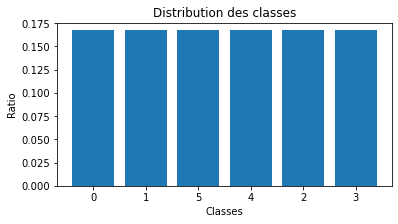

In [169]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_incremental_balanced_norm']['exploratory-dir'], DATASETS['INSECTS_incremental_balanced_norm']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

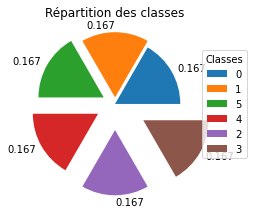

In [170]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_incremental_balanced_norm']['exploratory-dir'], DATASETS['INSECTS_incremental_balanced_norm']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [171]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['INSECTS_incremental_balanced_norm']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-encode'] = classes
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "incrémental"

dataset_meta

{'name': 'INSECTS_incremental_balanced_norm',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 57018,
 'varriables': ['Att1',
  'Att2',
  'Att3',
  'Att4',
  'Att5',
  'Att6',
  'Att7',
  'Att8',
  'Att9',
  'Att10',
  'Att11',
  'Att12',
  'Att13',
  'Att14',
  'Att15',
  'Att16',
  'Att17',
  'Att18',
  'Att19',
  'Att20',
  'Att21',
  'Att22',
  'Att23',
  'Att24',
  'Att25',
  'Att26',
  'Att27',
  'Att28',
  'Att29',
  'Att30',
  'Att31',
  'Att32',
  'Att33'],
 'var-nbr': 33,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 'classe

In [172]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['INSECTS_incremental_balanced_norm']['pre-proc-dir'],
                            DATASETS['INSECTS_incremental_balanced_norm']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['INSECTS_incremental_balanced_norm']['pre-proc-dir'],
                         DATASETS['INSECTS_incremental_balanced_norm']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="INSECTS_incremental_imbalanced_norm">INSECTS_incremental_imbalanced_norm</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [173]:
dataset_file = os.path.join(DATASETS['INSECTS_incremental_imbalanced_norm']['brute-dir'],
                            DATASETS['INSECTS_incremental_imbalanced_norm']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Classification DataStream Benchmark/INSECTS_incremental_imbalanced_norm.arff'

In [174]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.078263, 0.114012, 0.007126, 0.095015, 0.135642, 0.13231 , 0.099518, 0.203948, 0.186932, 0.119682, 0.113925, 0.10143 , 0.099934, 0.092086, 0.087419, 0.062602, 0.038823, 0.049919, 0.033589, 0.042998, 0.030181, 0.025278, 0.034812, 0.042129, 0.04638 , 0.037443, 0.032134, 0.021222, 0.016704, 0.022194, 0.012532, 0.007982, 0.016489, b'ae-aegypti-female'),
        (0.106287, 0.15493 , 0.125237, 0.165866, 0.154589, 0.139151, 0.079541, 0.112793, 0.119592, 0.097203, 0.068618, 0.045541, 0.118676, 0.120398, 0.087468, 0.062443, 0.029231, 0.027703, 0.022057, 0.03647 , 0.042653, 0.042813, 0.032552, 0.0335  , 0.031492, 0.013002, 0.019322, 0.026108, 0.04163 , 0.051124, 0.032025, 0.021562, 0.020781, b'ae-aegypti-female'),
        (0.106952, 0.14558 , 0.011527, 0.161163, 0.10238 , 0.082402, 0.064927, 0.145755, 0.186063, 0.146856, 0.086661, 0.053439, 0.161168, 0.140532, 0.10653 , 0.080539, 0.027395, 0.032964, 0.028035, 0.075979, 0.08481 , 0.071873, 0.055725, 0.039832, 0.03573 , 0.025044, 0.03151

In [175]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.078263,0.114012,0.007126,0.095015,0.135642,0.132310,0.099518,0.203948,0.186932,0.119682,...,0.046380,0.037443,0.032134,0.021222,0.016704,0.022194,0.012532,0.007982,0.016489,b'ae-aegypti-female'
1,0.106287,0.154930,0.125237,0.165866,0.154589,0.139151,0.079541,0.112793,0.119592,0.097203,...,0.031492,0.013002,0.019322,0.026108,0.041630,0.051124,0.032025,0.021562,0.020781,b'ae-aegypti-female'
2,0.106952,0.145580,0.011527,0.161163,0.102380,0.082402,0.064927,0.145755,0.186063,0.146856,...,0.035730,0.025044,0.031511,0.046070,0.042545,0.042168,0.027446,0.017139,0.017975,b'ae-aegypti-female'
3,0.227019,0.074605,0.125525,0.171626,0.226940,0.140002,0.111100,0.042202,0.043181,0.030333,...,0.005533,0.005232,0.003637,0.003804,0.017265,0.029684,0.016021,0.005143,0.006355,b'ae-aegypti-female'
4,0.178909,0.021797,0.136860,0.022572,0.183913,0.182730,0.158732,0.073736,0.068456,0.052402,...,0.015588,0.010953,0.010563,0.008856,0.008176,0.007730,0.019045,0.022627,0.029521,b'ae-aegypti-male'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452039,0.301603,0.418217,0.330798,0.007297,0.024852,0.295987,0.285230,0.036836,0.027876,0.033817,...,0.037856,0.182390,0.174929,0.105967,0.037020,0.011084,0.011750,0.005346,0.013976,b'ae-aegypti-male'
452040,0.361569,0.502312,0.405924,0.001717,0.485991,0.161349,0.317429,0.007997,0.006853,0.005087,...,0.005338,0.004650,0.005244,0.007014,0.011620,0.082889,0.140533,0.058724,0.029726,b'ae-aegypti-male'
452041,0.179626,0.255370,0.201076,0.276046,0.001274,0.225103,0.196867,0.105359,0.135247,0.113977,...,0.041183,0.023183,0.021476,0.021692,0.030286,0.066199,0.125653,0.070528,0.053791,b'cx-quinq-female'
452042,0.178698,0.247523,0.005765,0.204585,0.298877,0.175369,0.190903,0.162888,0.145205,0.105265,...,0.051337,0.033796,0.025758,0.026411,0.060271,0.142619,0.147090,0.082015,0.080718,b'cx-quinq-female'


<b>Nettoyage</b>

variables -> virgule flottante

In [176]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33
0,0.078263,0.114012,0.007126,0.095015,0.135642,0.132310,0.099518,0.203948,0.186932,0.119682,...,0.042129,0.046380,0.037443,0.032134,0.021222,0.016704,0.022194,0.012532,0.007982,0.016489
1,0.106287,0.154930,0.125237,0.165866,0.154589,0.139151,0.079541,0.112793,0.119592,0.097203,...,0.033500,0.031492,0.013002,0.019322,0.026108,0.041630,0.051124,0.032025,0.021562,0.020781
2,0.106952,0.145580,0.011527,0.161163,0.102380,0.082402,0.064927,0.145755,0.186063,0.146856,...,0.039832,0.035730,0.025044,0.031511,0.046070,0.042545,0.042168,0.027446,0.017139,0.017975
3,0.227019,0.074605,0.125525,0.171626,0.226940,0.140002,0.111100,0.042202,0.043181,0.030333,...,0.009745,0.005533,0.005232,0.003637,0.003804,0.017265,0.029684,0.016021,0.005143,0.006355
4,0.178909,0.021797,0.136860,0.022572,0.183913,0.182730,0.158732,0.073736,0.068456,0.052402,...,0.012294,0.015588,0.010953,0.010563,0.008856,0.008176,0.007730,0.019045,0.022627,0.029521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452039,0.301603,0.418217,0.330798,0.007297,0.024852,0.295987,0.285230,0.036836,0.027876,0.033817,...,0.017404,0.037856,0.182390,0.174929,0.105967,0.037020,0.011084,0.011750,0.005346,0.013976
452040,0.361569,0.502312,0.405924,0.001717,0.485991,0.161349,0.317429,0.007997,0.006853,0.005087,...,0.010544,0.005338,0.004650,0.005244,0.007014,0.011620,0.082889,0.140533,0.058724,0.029726
452041,0.179626,0.255370,0.201076,0.276046,0.001274,0.225103,0.196867,0.105359,0.135247,0.113977,...,0.034476,0.041183,0.023183,0.021476,0.021692,0.030286,0.066199,0.125653,0.070528,0.053791
452042,0.178698,0.247523,0.005765,0.204585,0.298877,0.175369,0.190903,0.162888,0.145205,0.105265,...,0.050703,0.051337,0.033796,0.025758,0.026411,0.060271,0.142619,0.147090,0.082015,0.080718


class -> entiers

In [177]:
classes = dataset_df['class'].values.tolist()
classes

[b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-ae

In [178]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegyp

In [179]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(classes)

LabelEncoder()

In [180]:
variables['class'] = label_encoder.transform(classes)
variables['class'] = variables['class'].astype('int32')
dataset_df = variables
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.078263,0.114012,0.007126,0.095015,0.135642,0.132310,0.099518,0.203948,0.186932,0.119682,...,0.046380,0.037443,0.032134,0.021222,0.016704,0.022194,0.012532,0.007982,0.016489,0
1,0.106287,0.154930,0.125237,0.165866,0.154589,0.139151,0.079541,0.112793,0.119592,0.097203,...,0.031492,0.013002,0.019322,0.026108,0.041630,0.051124,0.032025,0.021562,0.020781,0
2,0.106952,0.145580,0.011527,0.161163,0.102380,0.082402,0.064927,0.145755,0.186063,0.146856,...,0.035730,0.025044,0.031511,0.046070,0.042545,0.042168,0.027446,0.017139,0.017975,0
3,0.227019,0.074605,0.125525,0.171626,0.226940,0.140002,0.111100,0.042202,0.043181,0.030333,...,0.005533,0.005232,0.003637,0.003804,0.017265,0.029684,0.016021,0.005143,0.006355,0
4,0.178909,0.021797,0.136860,0.022572,0.183913,0.182730,0.158732,0.073736,0.068456,0.052402,...,0.015588,0.010953,0.010563,0.008856,0.008176,0.007730,0.019045,0.022627,0.029521,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452039,0.301603,0.418217,0.330798,0.007297,0.024852,0.295987,0.285230,0.036836,0.027876,0.033817,...,0.037856,0.182390,0.174929,0.105967,0.037020,0.011084,0.011750,0.005346,0.013976,1
452040,0.361569,0.502312,0.405924,0.001717,0.485991,0.161349,0.317429,0.007997,0.006853,0.005087,...,0.005338,0.004650,0.005244,0.007014,0.011620,0.082889,0.140533,0.058724,0.029726,1
452041,0.179626,0.255370,0.201076,0.276046,0.001274,0.225103,0.196867,0.105359,0.135247,0.113977,...,0.041183,0.023183,0.021476,0.021692,0.030286,0.066199,0.125653,0.070528,0.053791,4
452042,0.178698,0.247523,0.005765,0.204585,0.298877,0.175369,0.190903,0.162888,0.145205,0.105265,...,0.051337,0.033796,0.025758,0.026411,0.060271,0.142619,0.147090,0.082015,0.080718,4


<b>Taille</b>

In [181]:
Taille = len(dataset_df.index)
Taille

452044

<b>Variables</b>

In [182]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['Att1',
 'Att2',
 'Att3',
 'Att4',
 'Att5',
 'Att6',
 'Att7',
 'Att8',
 'Att9',
 'Att10',
 'Att11',
 'Att12',
 'Att13',
 'Att14',
 'Att15',
 'Att16',
 'Att17',
 'Att18',
 'Att19',
 'Att20',
 'Att21',
 'Att22',
 'Att23',
 'Att24',
 'Att25',
 'Att26',
 'Att27',
 'Att28',
 'Att29',
 'Att30',
 'Att31',
 'Att32',
 'Att33']

In [183]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [184]:
# Distribution des classes

classes = list(set(classes))
classes_encoded = list(label_encoder.transform(classes))

classes_dist = dict()
for classe in classes_encoded :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[str(classe)] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)


## Correspondance
classes_encoded = [str(classe_encoded) for classe_encoded in classes_encoded ]
classes = dict(zip(classes_encoded, classes))

0  :  125354
1  :  83794
5  :  134717
4  :  64895
2  :  29953
3  :  13331
Total =  452044
Distribution correcte !
Nombre de classes trouvées =  6


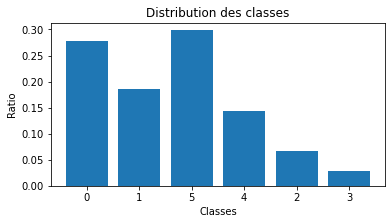

In [185]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_incremental_imbalanced_norm']['exploratory-dir'], DATASETS['INSECTS_incremental_imbalanced_norm']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

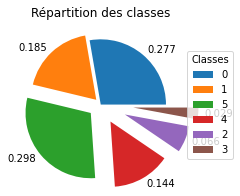

In [186]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_incremental_imbalanced_norm']['exploratory-dir'], DATASETS['INSECTS_incremental_imbalanced_norm']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [187]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['INSECTS_incremental_imbalanced_norm']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-encode'] = classes
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "Incrémental"

dataset_meta

{'name': 'INSECTS_incremental_imbalanced_norm',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 452044,
 'varriables': ['Att1',
  'Att2',
  'Att3',
  'Att4',
  'Att5',
  'Att6',
  'Att7',
  'Att8',
  'Att9',
  'Att10',
  'Att11',
  'Att12',
  'Att13',
  'Att14',
  'Att15',
  'Att16',
  'Att17',
  'Att18',
  'Att19',
  'Att20',
  'Att21',
  'Att22',
  'Att23',
  'Att24',
  'Att25',
  'Att26',
  'Att27',
  'Att28',
  'Att29',
  'Att30',
  'Att31',
  'Att32',
  'Att33'],
 'var-nbr': 33,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 'cla

In [188]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['INSECTS_incremental_imbalanced_norm']['pre-proc-dir'],
                            DATASETS['INSECTS_incremental_imbalanced_norm']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['INSECTS_incremental_imbalanced_norm']['pre-proc-dir'],
                         DATASETS['INSECTS_incremental_imbalanced_norm']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="INSECTS_incremental_abrupt_balanced_norm">INSECTS_incremental_abrupt_balanced_norm</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [189]:
dataset_file = os.path.join(DATASETS['INSECTS_incremental_abrupt_balanced_norm']['brute-dir'],
                            DATASETS['INSECTS_incremental_abrupt_balanced_norm']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Classification DataStream Benchmark/INSECTS_incremental_abrupt_balanced_norm.arff'

In [190]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.104786, 0.177437, 0.127348, 1.66377e-01, 0.173653, 0.210802, 0.110593, 0.112789, 0.119592, 0.097037, 0.079945, 0.083602, 0.148564, 0.133561, 0.087134, 0.062055, 0.045429, 0.041752, 0.046796, 0.051347, 0.055651, 0.051712, 0.063576, 0.061596, 0.044745, 0.012664, 0.019215, 0.033919, 0.04103 , 0.078895, 0.047801, 0.056905, 0.042594, b'ae-aegypti-female'),
        (0.222615, 0.082908, 0.012211, 1.32240e-01, 0.158171, 0.114506, 0.089346, 0.107228, 0.147048, 0.094347, 0.095715, 0.08705 , 0.135355, 0.099465, 0.063399, 0.04419 , 0.038168, 0.056239, 0.052283, 0.063868, 0.081649, 0.081116, 0.088354, 0.084172, 0.055497, 0.026038, 0.025214, 0.035499, 0.026753, 0.04601 , 0.043288, 0.025842, 0.035629, b'ae-aegypti-female'),
        (0.191783, 0.316429, 0.221004, 2.98153e-01, 0.367791, 0.357252, 0.266188, 0.005467, 0.022786, 0.040412, 0.005379, 0.060974, 0.021771, 0.009581, 0.009644, 0.006132, 0.003837, 0.015445, 0.080056, 0.064735, 0.020598, 0.006942, 0.008469, 0.009317, 0.006443, 0.010801

In [191]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.104786,0.177437,0.127348,0.166377,0.173653,0.210802,0.110593,0.112789,0.119592,0.097037,...,0.044745,0.012664,0.019215,0.033919,0.041030,0.078895,0.047801,0.056905,0.042594,b'ae-aegypti-female'
1,0.222615,0.082908,0.012211,0.132240,0.158171,0.114506,0.089346,0.107228,0.147048,0.094347,...,0.055497,0.026038,0.025214,0.035499,0.026753,0.046010,0.043288,0.025842,0.035629,b'ae-aegypti-female'
2,0.191783,0.316429,0.221004,0.298153,0.367791,0.357252,0.266188,0.005467,0.022786,0.040412,...,0.006443,0.010801,0.007107,0.004875,0.003229,0.006719,0.007591,0.019423,0.055560,b'ae-aegypti-male'
3,0.106044,0.188385,0.139068,0.183759,0.001392,0.125598,0.117964,0.103110,0.088212,0.071891,...,0.030993,0.009889,0.010659,0.014419,0.011395,0.024807,0.021067,0.038479,0.041440,b'ae-aegypti-female'
4,0.102941,0.169156,0.122622,0.166684,0.206373,0.249206,0.154802,0.335912,0.371870,0.163826,...,0.056908,0.016429,0.014142,0.089209,0.154863,0.172861,0.052296,0.029528,0.030566,b'ae-aegypti-female'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79981,0.686123,0.260852,0.385028,0.007090,0.508286,0.761681,0.699373,0.016533,0.013340,0.007065,...,0.004804,0.004078,0.008489,0.044783,0.136087,0.073045,0.024029,0.012372,0.011731,b'ae-albopictus-male'
79982,0.045960,0.307167,0.133201,0.111360,0.260442,0.276196,0.205961,0.075350,0.054994,0.059779,...,0.028372,0.021084,0.024331,0.030070,0.026642,0.076374,0.076617,0.080936,0.110151,b'ae-albopictus-male'
79983,0.048051,0.213497,0.039009,0.073602,0.049665,0.211566,0.127674,0.069087,0.065582,0.074316,...,0.059043,0.037490,0.021164,0.024557,0.017056,0.024160,0.015770,0.023992,0.030771,b'ae-albopictus-male'
79984,0.316612,0.515930,0.363502,0.486722,0.006556,0.033378,0.456291,0.010967,0.008998,0.006514,...,0.007459,0.012828,0.077743,0.258139,0.143586,0.073371,0.020638,0.008789,0.012037,b'ae-albopictus-male'


<b>Nettoyage</b>

variables -> virgule flottante

In [192]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33
0,0.104786,0.177437,0.127348,0.166377,0.173653,0.210802,0.110593,0.112789,0.119592,0.097037,...,0.061596,0.044745,0.012664,0.019215,0.033919,0.041030,0.078895,0.047801,0.056905,0.042594
1,0.222615,0.082908,0.012211,0.132240,0.158171,0.114506,0.089346,0.107228,0.147048,0.094347,...,0.084172,0.055497,0.026038,0.025214,0.035499,0.026753,0.046010,0.043288,0.025842,0.035629
2,0.191783,0.316429,0.221004,0.298153,0.367791,0.357252,0.266188,0.005467,0.022786,0.040412,...,0.009317,0.006443,0.010801,0.007107,0.004875,0.003229,0.006719,0.007591,0.019423,0.055560
3,0.106044,0.188385,0.139068,0.183759,0.001392,0.125598,0.117964,0.103110,0.088212,0.071891,...,0.058844,0.030993,0.009889,0.010659,0.014419,0.011395,0.024807,0.021067,0.038479,0.041440
4,0.102941,0.169156,0.122622,0.166684,0.206373,0.249206,0.154802,0.335912,0.371870,0.163826,...,0.035229,0.056908,0.016429,0.014142,0.089209,0.154863,0.172861,0.052296,0.029528,0.030566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79981,0.686123,0.260852,0.385028,0.007090,0.508286,0.761681,0.699373,0.016533,0.013340,0.007065,...,0.005181,0.004804,0.004078,0.008489,0.044783,0.136087,0.073045,0.024029,0.012372,0.011731
79982,0.045960,0.307167,0.133201,0.111360,0.260442,0.276196,0.205961,0.075350,0.054994,0.059779,...,0.030764,0.028372,0.021084,0.024331,0.030070,0.026642,0.076374,0.076617,0.080936,0.110151
79983,0.048051,0.213497,0.039009,0.073602,0.049665,0.211566,0.127674,0.069087,0.065582,0.074316,...,0.049885,0.059043,0.037490,0.021164,0.024557,0.017056,0.024160,0.015770,0.023992,0.030771
79984,0.316612,0.515930,0.363502,0.486722,0.006556,0.033378,0.456291,0.010967,0.008998,0.006514,...,0.005562,0.007459,0.012828,0.077743,0.258139,0.143586,0.073371,0.020638,0.008789,0.012037


class -> entiers

In [193]:
classes = dataset_df['class'].values.tolist()
classes

[b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegy

In [194]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti

In [195]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(classes)

LabelEncoder()

In [196]:
variables['class'] = label_encoder.transform(classes)
variables['class'] = variables['class'].astype('int32')
dataset_df = variables
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.104786,0.177437,0.127348,0.166377,0.173653,0.210802,0.110593,0.112789,0.119592,0.097037,...,0.044745,0.012664,0.019215,0.033919,0.041030,0.078895,0.047801,0.056905,0.042594,0
1,0.222615,0.082908,0.012211,0.132240,0.158171,0.114506,0.089346,0.107228,0.147048,0.094347,...,0.055497,0.026038,0.025214,0.035499,0.026753,0.046010,0.043288,0.025842,0.035629,0
2,0.191783,0.316429,0.221004,0.298153,0.367791,0.357252,0.266188,0.005467,0.022786,0.040412,...,0.006443,0.010801,0.007107,0.004875,0.003229,0.006719,0.007591,0.019423,0.055560,1
3,0.106044,0.188385,0.139068,0.183759,0.001392,0.125598,0.117964,0.103110,0.088212,0.071891,...,0.030993,0.009889,0.010659,0.014419,0.011395,0.024807,0.021067,0.038479,0.041440,0
4,0.102941,0.169156,0.122622,0.166684,0.206373,0.249206,0.154802,0.335912,0.371870,0.163826,...,0.056908,0.016429,0.014142,0.089209,0.154863,0.172861,0.052296,0.029528,0.030566,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79981,0.686123,0.260852,0.385028,0.007090,0.508286,0.761681,0.699373,0.016533,0.013340,0.007065,...,0.004804,0.004078,0.008489,0.044783,0.136087,0.073045,0.024029,0.012372,0.011731,3
79982,0.045960,0.307167,0.133201,0.111360,0.260442,0.276196,0.205961,0.075350,0.054994,0.059779,...,0.028372,0.021084,0.024331,0.030070,0.026642,0.076374,0.076617,0.080936,0.110151,3
79983,0.048051,0.213497,0.039009,0.073602,0.049665,0.211566,0.127674,0.069087,0.065582,0.074316,...,0.059043,0.037490,0.021164,0.024557,0.017056,0.024160,0.015770,0.023992,0.030771,3
79984,0.316612,0.515930,0.363502,0.486722,0.006556,0.033378,0.456291,0.010967,0.008998,0.006514,...,0.007459,0.012828,0.077743,0.258139,0.143586,0.073371,0.020638,0.008789,0.012037,3


<b>Taille</b>

In [197]:
Taille = len(dataset_df.index)
Taille

79986

<b>Variables</b>

In [198]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['Att1',
 'Att2',
 'Att3',
 'Att4',
 'Att5',
 'Att6',
 'Att7',
 'Att8',
 'Att9',
 'Att10',
 'Att11',
 'Att12',
 'Att13',
 'Att14',
 'Att15',
 'Att16',
 'Att17',
 'Att18',
 'Att19',
 'Att20',
 'Att21',
 'Att22',
 'Att23',
 'Att24',
 'Att25',
 'Att26',
 'Att27',
 'Att28',
 'Att29',
 'Att30',
 'Att31',
 'Att32',
 'Att33']

In [199]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [200]:
# Distribution des classes

classes = list(set(classes))
classes_encoded = list(label_encoder.transform(classes))

classes_dist = dict()
for classe in classes_encoded :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[str(classe)] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)


## Correspondance
classes_encoded = [str(classe_encoded) for classe_encoded in classes_encoded ]
classes = dict(zip(classes_encoded, classes))

0  :  13331
1  :  13331
5  :  13331
4  :  13331
2  :  13331
3  :  13331
Total =  79986
Distribution correcte !
Nombre de classes trouvées =  6


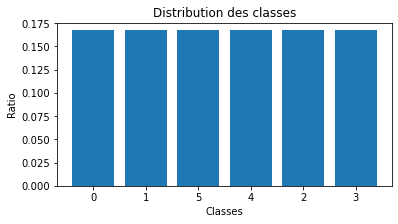

In [201]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_incremental_abrupt_balanced_norm']['exploratory-dir'], DATASETS['INSECTS_incremental_abrupt_balanced_norm']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

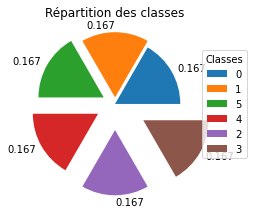

In [202]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_incremental_abrupt_balanced_norm']['exploratory-dir'], DATASETS['INSECTS_incremental_abrupt_balanced_norm']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [203]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['INSECTS_incremental_abrupt_balanced_norm']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-encode'] = classes
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "brusque-incrémental"

dataset_meta

{'name': 'INSECTS_incremental_abrupt_balanced_norm',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 79986,
 'varriables': ['Att1',
  'Att2',
  'Att3',
  'Att4',
  'Att5',
  'Att6',
  'Att7',
  'Att8',
  'Att9',
  'Att10',
  'Att11',
  'Att12',
  'Att13',
  'Att14',
  'Att15',
  'Att16',
  'Att17',
  'Att18',
  'Att19',
  'Att20',
  'Att21',
  'Att22',
  'Att23',
  'Att24',
  'Att25',
  'Att26',
  'Att27',
  'Att28',
  'Att29',
  'Att30',
  'Att31',
  'Att32',
  'Att33'],
 'var-nbr': 33,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 

In [204]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['INSECTS_incremental_abrupt_balanced_norm']['pre-proc-dir'],
                            DATASETS['INSECTS_incremental_abrupt_balanced_norm']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['INSECTS_incremental_abrupt_balanced_norm']['pre-proc-dir'],
                         DATASETS['INSECTS_incremental_abrupt_balanced_norm']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="INSECTS_incremental_abrupt_imbalanced_norm">INSECTS_incremental_abrupt_imbalanced_norm</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [205]:
dataset_file = os.path.join(DATASETS['INSECTS_incremental_abrupt_imbalanced_norm']['brute-dir'],
                            DATASETS['INSECTS_incremental_abrupt_imbalanced_norm']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Classification DataStream Benchmark/INSECTS_incremental_abrupt_imbalanced_norm.arff'

In [206]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.223917, 0.072908, 0.012154, 0.131875, 0.140809, 0.075658, 0.065605, 0.107232, 0.147048, 0.094514, 0.082088, 0.047413, 0.108178, 0.089662, 0.063741, 0.044585, 0.024584, 0.037233, 0.024607, 0.04532 , 0.062384, 0.067157, 0.045128, 0.045742, 0.039001, 0.026372, 0.02532 , 0.027306, 0.027362, 0.029874, 0.02905 , 0.00998 , 0.017456, b'ae-aegypti-female'),
        (0.193138, 0.275531, 0.217221, 0.297075, 0.327387, 0.235711, 0.18159 , 0.005471, 0.022786, 0.040589, 0.00493 , 0.033254, 0.017904, 0.008636, 0.010006, 0.006543, 0.002613, 0.010396, 0.037511, 0.045932, 0.016049, 0.005747, 0.004582, 0.005151, 0.004744, 0.01114 , 0.007215, 0.004072, 0.003852, 0.004484, 0.00552 , 0.007587, 0.026971, b'ae-aegypti-male'),
        (0.106287, 0.15493 , 0.125237, 0.165866, 0.154589, 0.139151, 0.079541, 0.112793, 0.119592, 0.097203, 0.068618, 0.045541, 0.118676, 0.120398, 0.087468, 0.062443, 0.029231, 0.027703, 0.022057, 0.03647 , 0.042653, 0.042813, 0.032552, 0.0335  , 0.031492, 0.013002, 0.019322,

In [207]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.223917,0.072908,0.012154,0.131875,0.140809,0.075658,0.065605,0.107232,0.147048,0.094514,...,0.039001,0.026372,0.025320,0.027306,0.027362,0.029874,0.029050,0.009980,0.017456,b'ae-aegypti-female'
1,0.193138,0.275531,0.217221,0.297075,0.327387,0.235711,0.181590,0.005471,0.022786,0.040589,...,0.004744,0.011140,0.007215,0.004072,0.003852,0.004484,0.005520,0.007587,0.026971,b'ae-aegypti-male'
2,0.106287,0.154930,0.125237,0.165866,0.154589,0.139151,0.079541,0.112793,0.119592,0.097203,...,0.031492,0.013002,0.019322,0.026108,0.041630,0.051124,0.032025,0.021562,0.020781,b'ae-aegypti-female'
3,0.104445,0.147745,0.120595,0.166171,0.183712,0.164472,0.108536,0.335915,0.371870,0.163980,...,0.039986,0.016766,0.014250,0.068056,0.155392,0.111842,0.034987,0.011354,0.015038,b'ae-aegypti-female'
4,0.093127,0.136731,0.110243,0.153860,0.169262,0.150576,0.096983,0.063469,0.114807,0.058532,...,0.006305,0.012962,0.032446,0.026124,0.010665,0.007986,0.006047,0.003324,0.009629,b'ae-aegypti-female'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452039,0.016760,0.228417,0.244238,0.374017,0.053675,0.325002,0.309034,0.050705,0.031731,0.016816,...,0.005708,0.006485,0.012228,0.045596,0.062860,0.045951,0.023665,0.008228,0.007590,b'ae-aegypti-male'
452040,0.162003,0.347406,0.120871,0.248440,0.006361,0.242808,0.203743,0.093360,0.094017,0.012877,...,0.013071,0.007027,0.011095,0.033833,0.046961,0.037742,0.014585,0.006833,0.009008,b'cx-quinq-female'
452041,0.599170,0.203845,0.331099,0.028712,0.015511,0.004652,0.203996,0.021467,0.018200,0.027066,...,0.028743,0.120441,0.084683,0.027508,0.010297,0.007611,0.004911,0.003333,0.006796,b'ae-aegypti-male'
452042,0.180813,0.399002,0.131625,0.006527,0.250160,0.232522,0.204226,0.078146,0.100521,0.089879,...,0.046399,0.035195,0.016517,0.014709,0.009819,0.026815,0.058009,0.047533,0.027586,b'cx-quinq-female'


<b>Nettoyage</b>

variables -> virgule flottante

In [208]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33
0,0.223917,0.072908,0.012154,0.131875,0.140809,0.075658,0.065605,0.107232,0.147048,0.094514,...,0.045742,0.039001,0.026372,0.025320,0.027306,0.027362,0.029874,0.029050,0.009980,0.017456
1,0.193138,0.275531,0.217221,0.297075,0.327387,0.235711,0.181590,0.005471,0.022786,0.040589,...,0.005151,0.004744,0.011140,0.007215,0.004072,0.003852,0.004484,0.005520,0.007587,0.026971
2,0.106287,0.154930,0.125237,0.165866,0.154589,0.139151,0.079541,0.112793,0.119592,0.097203,...,0.033500,0.031492,0.013002,0.019322,0.026108,0.041630,0.051124,0.032025,0.021562,0.020781
3,0.104445,0.147745,0.120595,0.166171,0.183712,0.164472,0.108536,0.335915,0.371870,0.163980,...,0.019202,0.039986,0.016766,0.014250,0.068056,0.155392,0.111842,0.034987,0.011354,0.015038
4,0.093127,0.136731,0.110243,0.153860,0.169262,0.150576,0.096983,0.063469,0.114807,0.058532,...,0.008056,0.006305,0.012962,0.032446,0.026124,0.010665,0.007986,0.006047,0.003324,0.009629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452039,0.016760,0.228417,0.244238,0.374017,0.053675,0.325002,0.309034,0.050705,0.031731,0.016816,...,0.004363,0.005708,0.006485,0.012228,0.045596,0.062860,0.045951,0.023665,0.008228,0.007590
452040,0.162003,0.347406,0.120871,0.248440,0.006361,0.242808,0.203743,0.093360,0.094017,0.012877,...,0.011650,0.013071,0.007027,0.011095,0.033833,0.046961,0.037742,0.014585,0.006833,0.009008
452041,0.599170,0.203845,0.331099,0.028712,0.015511,0.004652,0.203996,0.021467,0.018200,0.027066,...,0.008080,0.028743,0.120441,0.084683,0.027508,0.010297,0.007611,0.004911,0.003333,0.006796
452042,0.180813,0.399002,0.131625,0.006527,0.250160,0.232522,0.204226,0.078146,0.100521,0.089879,...,0.015387,0.046399,0.035195,0.016517,0.014709,0.009819,0.026815,0.058009,0.047533,0.027586


class -> entiers

In [209]:
classes = dataset_df['class'].values.tolist()
classes

[b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-

In [210]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-a

In [211]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(classes)

LabelEncoder()

In [212]:
variables['class'] = label_encoder.transform(classes)
variables['class'] = variables['class'].astype('int32')
dataset_df = variables
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.223917,0.072908,0.012154,0.131875,0.140809,0.075658,0.065605,0.107232,0.147048,0.094514,...,0.039001,0.026372,0.025320,0.027306,0.027362,0.029874,0.029050,0.009980,0.017456,0
1,0.193138,0.275531,0.217221,0.297075,0.327387,0.235711,0.181590,0.005471,0.022786,0.040589,...,0.004744,0.011140,0.007215,0.004072,0.003852,0.004484,0.005520,0.007587,0.026971,1
2,0.106287,0.154930,0.125237,0.165866,0.154589,0.139151,0.079541,0.112793,0.119592,0.097203,...,0.031492,0.013002,0.019322,0.026108,0.041630,0.051124,0.032025,0.021562,0.020781,0
3,0.104445,0.147745,0.120595,0.166171,0.183712,0.164472,0.108536,0.335915,0.371870,0.163980,...,0.039986,0.016766,0.014250,0.068056,0.155392,0.111842,0.034987,0.011354,0.015038,0
4,0.093127,0.136731,0.110243,0.153860,0.169262,0.150576,0.096983,0.063469,0.114807,0.058532,...,0.006305,0.012962,0.032446,0.026124,0.010665,0.007986,0.006047,0.003324,0.009629,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452039,0.016760,0.228417,0.244238,0.374017,0.053675,0.325002,0.309034,0.050705,0.031731,0.016816,...,0.005708,0.006485,0.012228,0.045596,0.062860,0.045951,0.023665,0.008228,0.007590,1
452040,0.162003,0.347406,0.120871,0.248440,0.006361,0.242808,0.203743,0.093360,0.094017,0.012877,...,0.013071,0.007027,0.011095,0.033833,0.046961,0.037742,0.014585,0.006833,0.009008,4
452041,0.599170,0.203845,0.331099,0.028712,0.015511,0.004652,0.203996,0.021467,0.018200,0.027066,...,0.028743,0.120441,0.084683,0.027508,0.010297,0.007611,0.004911,0.003333,0.006796,1
452042,0.180813,0.399002,0.131625,0.006527,0.250160,0.232522,0.204226,0.078146,0.100521,0.089879,...,0.046399,0.035195,0.016517,0.014709,0.009819,0.026815,0.058009,0.047533,0.027586,4


<b>Taille</b>

In [213]:
Taille = len(dataset_df.index)
Taille

452044

<b>Variables</b>

In [214]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['Att1',
 'Att2',
 'Att3',
 'Att4',
 'Att5',
 'Att6',
 'Att7',
 'Att8',
 'Att9',
 'Att10',
 'Att11',
 'Att12',
 'Att13',
 'Att14',
 'Att15',
 'Att16',
 'Att17',
 'Att18',
 'Att19',
 'Att20',
 'Att21',
 'Att22',
 'Att23',
 'Att24',
 'Att25',
 'Att26',
 'Att27',
 'Att28',
 'Att29',
 'Att30',
 'Att31',
 'Att32',
 'Att33']

In [215]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [216]:
# Distribution des classes

classes = list(set(classes))
classes_encoded = list(label_encoder.transform(classes))

classes_dist = dict()
for classe in classes_encoded :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[str(classe)] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)


## Correspondance
classes_encoded = [str(classe_encoded) for classe_encoded in classes_encoded ]
classes = dict(zip(classes_encoded, classes))

0  :  125354
1  :  83794
5  :  134717
4  :  64895
2  :  29953
3  :  13331
Total =  452044
Distribution correcte !
Nombre de classes trouvées =  6


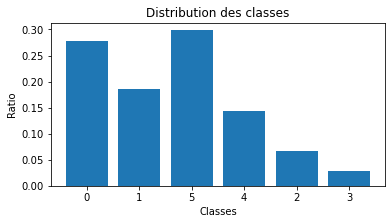

In [217]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_incremental_abrupt_imbalanced_norm']['exploratory-dir'], DATASETS['INSECTS_incremental_abrupt_imbalanced_norm']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

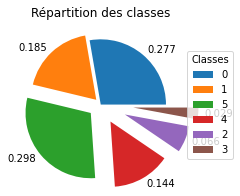

In [218]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_incremental_abrupt_imbalanced_norm']['exploratory-dir'], DATASETS['INSECTS_incremental_abrupt_imbalanced_norm']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [219]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['INSECTS_incremental_abrupt_imbalanced_norm']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-encode'] = classes
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "brusque-incrémental"

dataset_meta

{'name': 'INSECTS_incremental_abrupt_imbalanced_norm',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 452044,
 'varriables': ['Att1',
  'Att2',
  'Att3',
  'Att4',
  'Att5',
  'Att6',
  'Att7',
  'Att8',
  'Att9',
  'Att10',
  'Att11',
  'Att12',
  'Att13',
  'Att14',
  'Att15',
  'Att16',
  'Att17',
  'Att18',
  'Att19',
  'Att20',
  'Att21',
  'Att22',
  'Att23',
  'Att24',
  'Att25',
  'Att26',
  'Att27',
  'Att28',
  'Att29',
  'Att30',
  'Att31',
  'Att32',
  'Att33'],
 'var-nbr': 33,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64']

In [220]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['INSECTS_incremental_abrupt_imbalanced_norm']['pre-proc-dir'],
                            DATASETS['INSECTS_incremental_abrupt_imbalanced_norm']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['INSECTS_incremental_abrupt_imbalanced_norm']['pre-proc-dir'],
                         DATASETS['INSECTS_incremental_abrupt_imbalanced_norm']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="INSECTS_incremental_reoccurring_balanced_norm">INSECTS_incremental_reoccurring_balanced_norm</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [221]:
dataset_file = os.path.join(DATASETS['INSECTS_incremental_reoccurring_balanced_norm']['brute-dir'],
                            DATASETS['INSECTS_incremental_reoccurring_balanced_norm']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Classification DataStream Benchmark/INSECTS_incremental_reoccurring_balanced_norm.arff'

In [222]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.223311, 0.079163, 0.012211, 0.132269, 0.158171, 0.114506, 0.089346, 0.114717, 0.157377, 0.137315, 0.095832, 0.078285, 0.166023, 0.102372, 0.079876, 0.044451, 0.038292, 0.052536, 0.031743, 0.053505, 0.104962, 0.096053, 0.049659, 0.059214, 0.04621 , 0.026228, 0.025214, 0.035441, 0.02681 , 0.044673, 0.046864, 0.020707, 0.02545 , b'ae-aegypti-female'),
        (0.105588, 0.169421, 0.127348, 0.166405, 0.173653, 0.210802, 0.110593, 0.120666, 0.127992, 0.141229, 0.080063, 0.075184, 0.182227, 0.137465, 0.10978 , 0.062311, 0.045552, 0.039003, 0.028411, 0.042978, 0.071411, 0.061235, 0.035733, 0.043331, 0.037313, 0.012856, 0.019215, 0.033862, 0.041086, 0.076604, 0.051749, 0.045597, 0.030425, b'ae-aegypti-female'),
        (0.10836 , 0.173294, 0.176599, 0.133152, 0.217392, 0.00727 , 0.157316, 0.096854, 0.064394, 0.099857, 0.076029, 0.021506, 0.077854, 0.159893, 0.076385, 0.035594, 0.020105, 0.028058, 0.017751, 0.012956, 0.031504, 0.104721, 0.064911, 0.029036, 0.020205, 0.018347, 0.01062

In [223]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.223311,0.079163,0.012211,0.132269,0.158171,0.114506,0.089346,0.114717,0.157377,0.137315,...,0.046210,0.026228,0.025214,0.035441,0.026810,0.044673,0.046864,0.020707,0.025450,b'ae-aegypti-female'
1,0.105588,0.169421,0.127348,0.166405,0.173653,0.210802,0.110593,0.120666,0.127992,0.141229,...,0.037313,0.012856,0.019215,0.033862,0.041086,0.076604,0.051749,0.045597,0.030425,b'ae-aegypti-female'
2,0.108360,0.173294,0.176599,0.133152,0.217392,0.007270,0.157316,0.096854,0.064394,0.099857,...,0.020205,0.018347,0.010626,0.012346,0.014863,0.054629,0.046622,0.031068,0.021384,b'ae-aegypti-female'
3,0.103744,0.161514,0.122622,0.166712,0.206373,0.249206,0.154802,0.359372,0.397990,0.238435,...,0.047377,0.016621,0.014142,0.089154,0.154913,0.167840,0.056616,0.023661,0.021834,b'ae-aegypti-female'
4,0.092418,0.149394,0.112082,0.154348,0.190138,0.228131,0.137188,0.067898,0.122871,0.084936,...,0.007470,0.012816,0.032340,0.033883,0.010104,0.011785,0.009084,0.006403,0.013740,b'ae-aegypti-female'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79981,0.358653,0.548098,0.401645,0.000389,0.526100,0.157412,0.467337,0.009642,0.006946,0.005550,...,0.004641,0.004032,0.005834,0.011742,0.023962,0.219927,0.169958,0.082255,0.028450,b'ae-albopictus-male'
79982,0.359137,0.538605,0.007422,0.409750,0.390018,0.519114,0.465198,0.034541,0.025002,0.026314,...,0.007310,0.007443,0.012067,0.024263,0.039948,0.151150,0.132588,0.097535,0.082248,b'ae-albopictus-male'
79983,0.048903,0.203851,0.039009,0.073633,0.049665,0.211566,0.127674,0.073912,0.070188,0.108161,...,0.049143,0.037678,0.021164,0.024498,0.017113,0.023458,0.017073,0.019224,0.021980,b'ae-albopictus-male'
79984,0.296566,0.451527,0.017609,0.343000,0.444827,0.567692,0.513836,0.035361,0.026738,0.053619,...,0.040722,0.138344,0.114632,0.062095,0.012559,0.009805,0.008731,0.010883,0.023376,b'ae-albopictus-male'


<b>Nettoyage</b>

variables -> virgule flottante

In [224]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33
0,0.223311,0.079163,0.012211,0.132269,0.158171,0.114506,0.089346,0.114717,0.157377,0.137315,...,0.059214,0.046210,0.026228,0.025214,0.035441,0.026810,0.044673,0.046864,0.020707,0.025450
1,0.105588,0.169421,0.127348,0.166405,0.173653,0.210802,0.110593,0.120666,0.127992,0.141229,...,0.043331,0.037313,0.012856,0.019215,0.033862,0.041086,0.076604,0.051749,0.045597,0.030425
2,0.108360,0.173294,0.176599,0.133152,0.217392,0.007270,0.157316,0.096854,0.064394,0.099857,...,0.029036,0.020205,0.018347,0.010626,0.012346,0.014863,0.054629,0.046622,0.031068,0.021384
3,0.103744,0.161514,0.122622,0.166712,0.206373,0.249206,0.154802,0.359372,0.397990,0.238435,...,0.024783,0.047377,0.016621,0.014142,0.089154,0.154913,0.167840,0.056616,0.023661,0.021834
4,0.092418,0.149394,0.112082,0.154348,0.190138,0.228131,0.137188,0.067898,0.122871,0.084936,...,0.010323,0.007470,0.012816,0.032340,0.033883,0.010104,0.011785,0.009084,0.006403,0.013740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79981,0.358653,0.548098,0.401645,0.000389,0.526100,0.157412,0.467337,0.009642,0.006946,0.005550,...,0.010047,0.004641,0.004032,0.005834,0.011742,0.023962,0.219927,0.169958,0.082255,0.028450
79982,0.359137,0.538605,0.007422,0.409750,0.390018,0.519114,0.465198,0.034541,0.025002,0.026314,...,0.010307,0.007310,0.007443,0.012067,0.024263,0.039948,0.151150,0.132588,0.097535,0.082248
79983,0.048903,0.203851,0.039009,0.073633,0.049665,0.211566,0.127674,0.073912,0.070188,0.108161,...,0.035093,0.049143,0.037678,0.021164,0.024498,0.017113,0.023458,0.017073,0.019224,0.021980
79984,0.296566,0.451527,0.017609,0.343000,0.444827,0.567692,0.513836,0.035361,0.026738,0.053619,...,0.006074,0.040722,0.138344,0.114632,0.062095,0.012559,0.009805,0.008731,0.010883,0.023376


class -> entiers

In [225]:
classes = dataset_df['class'].values.tolist()
classes

[b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegy

In [226]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti

In [227]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(classes)

LabelEncoder()

In [228]:
variables['class'] = label_encoder.transform(classes)
variables['class'] = variables['class'].astype('int32')
dataset_df = variables
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.223311,0.079163,0.012211,0.132269,0.158171,0.114506,0.089346,0.114717,0.157377,0.137315,...,0.046210,0.026228,0.025214,0.035441,0.026810,0.044673,0.046864,0.020707,0.025450,0
1,0.105588,0.169421,0.127348,0.166405,0.173653,0.210802,0.110593,0.120666,0.127992,0.141229,...,0.037313,0.012856,0.019215,0.033862,0.041086,0.076604,0.051749,0.045597,0.030425,0
2,0.108360,0.173294,0.176599,0.133152,0.217392,0.007270,0.157316,0.096854,0.064394,0.099857,...,0.020205,0.018347,0.010626,0.012346,0.014863,0.054629,0.046622,0.031068,0.021384,0
3,0.103744,0.161514,0.122622,0.166712,0.206373,0.249206,0.154802,0.359372,0.397990,0.238435,...,0.047377,0.016621,0.014142,0.089154,0.154913,0.167840,0.056616,0.023661,0.021834,0
4,0.092418,0.149394,0.112082,0.154348,0.190138,0.228131,0.137188,0.067898,0.122871,0.084936,...,0.007470,0.012816,0.032340,0.033883,0.010104,0.011785,0.009084,0.006403,0.013740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79981,0.358653,0.548098,0.401645,0.000389,0.526100,0.157412,0.467337,0.009642,0.006946,0.005550,...,0.004641,0.004032,0.005834,0.011742,0.023962,0.219927,0.169958,0.082255,0.028450,3
79982,0.359137,0.538605,0.007422,0.409750,0.390018,0.519114,0.465198,0.034541,0.025002,0.026314,...,0.007310,0.007443,0.012067,0.024263,0.039948,0.151150,0.132588,0.097535,0.082248,3
79983,0.048903,0.203851,0.039009,0.073633,0.049665,0.211566,0.127674,0.073912,0.070188,0.108161,...,0.049143,0.037678,0.021164,0.024498,0.017113,0.023458,0.017073,0.019224,0.021980,3
79984,0.296566,0.451527,0.017609,0.343000,0.444827,0.567692,0.513836,0.035361,0.026738,0.053619,...,0.040722,0.138344,0.114632,0.062095,0.012559,0.009805,0.008731,0.010883,0.023376,3


<b>Taille</b>

In [229]:
Taille = len(dataset_df.index)
Taille

79986

<b>Variables</b>

In [230]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['Att1',
 'Att2',
 'Att3',
 'Att4',
 'Att5',
 'Att6',
 'Att7',
 'Att8',
 'Att9',
 'Att10',
 'Att11',
 'Att12',
 'Att13',
 'Att14',
 'Att15',
 'Att16',
 'Att17',
 'Att18',
 'Att19',
 'Att20',
 'Att21',
 'Att22',
 'Att23',
 'Att24',
 'Att25',
 'Att26',
 'Att27',
 'Att28',
 'Att29',
 'Att30',
 'Att31',
 'Att32',
 'Att33']

In [231]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [232]:
# Distribution des classes

classes = list(set(classes))
classes_encoded = list(label_encoder.transform(classes))

classes_dist = dict()
for classe in classes_encoded :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[str(classe)] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)


## Correspondance
classes_encoded = [str(classe_encoded) for classe_encoded in classes_encoded ]
classes = dict(zip(classes_encoded, classes))

0  :  13331
1  :  13331
5  :  13331
4  :  13331
2  :  13331
3  :  13331
Total =  79986
Distribution correcte !
Nombre de classes trouvées =  6


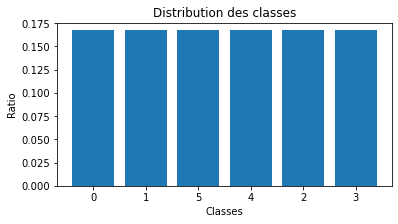

In [233]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_incremental_reoccurring_balanced_norm']['exploratory-dir'], DATASETS['INSECTS_incremental_reoccurring_balanced_norm']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

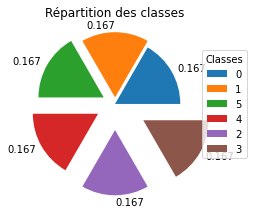

In [234]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_incremental_reoccurring_balanced_norm']['exploratory-dir'], DATASETS['INSECTS_incremental_reoccurring_balanced_norm']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [235]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['INSECTS_incremental_reoccurring_balanced_norm']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-encode'] = classes
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "incrémental-redondant"

dataset_meta

{'name': 'INSECTS_incremental_reoccurring_balanced_norm',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 79986,
 'varriables': ['Att1',
  'Att2',
  'Att3',
  'Att4',
  'Att5',
  'Att6',
  'Att7',
  'Att8',
  'Att9',
  'Att10',
  'Att11',
  'Att12',
  'Att13',
  'Att14',
  'Att15',
  'Att16',
  'Att17',
  'Att18',
  'Att19',
  'Att20',
  'Att21',
  'Att22',
  'Att23',
  'Att24',
  'Att25',
  'Att26',
  'Att27',
  'Att28',
  'Att29',
  'Att30',
  'Att31',
  'Att32',
  'Att33'],
 'var-nbr': 33,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64

In [236]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['INSECTS_incremental_reoccurring_balanced_norm']['pre-proc-dir'],
                            DATASETS['INSECTS_incremental_reoccurring_balanced_norm']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['INSECTS_incremental_reoccurring_balanced_norm']['pre-proc-dir'],
                         DATASETS['INSECTS_incremental_reoccurring_balanced_norm']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="INSECTS_incremental_reoccurring_imbalanced_norm">INSECTS_incremental_reoccurring_imbalanced_norm</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [237]:
dataset_file = os.path.join(DATASETS['INSECTS_incremental_reoccurring_imbalanced_norm']['brute-dir'],
                            DATASETS['INSECTS_incremental_reoccurring_imbalanced_norm']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Classification DataStream Benchmark/INSECTS_incremental_reoccurring_imbalanced_norm.arff'

In [238]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.107542, 0.164429, 0.136748, 0.183173, 0.001263, 0.082972, 0.084375, 0.103114, 0.088212, 0.072062, 0.061252, 0.020139, 0.060803, 0.13073 , 0.063775, 0.034394, 0.020341, 0.015705, 0.012097, 0.017097, 0.020078, 0.041451, 0.050128, 0.032008, 0.021889, 0.010229, 0.010767, 0.011313, 0.012013, 0.016173, 0.014402, 0.014692, 0.02023 , b'ae-aegypti-female'),
        (0.109057, 0.158449, 0.173609, 0.132754, 0.19352 , 0.004954, 0.110185, 0.090535, 0.060168, 0.068782, 0.065171, 0.01313 , 0.051054, 0.140041, 0.060971, 0.035729, 0.012943, 0.019994, 0.013899, 0.011231, 0.019184, 0.073216, 0.058901, 0.02248 , 0.017054, 0.018492, 0.010734, 0.009785, 0.015422, 0.036499, 0.028903, 0.014801, 0.014738, b'ae-aegypti-female'),
        (0.104445, 0.147745, 0.120595, 0.166171, 0.183712, 0.164472, 0.108536, 0.335915, 0.37187 , 0.16398 , 0.136594, 0.036259, 0.456986, 0.344385, 0.152028, 0.065495, 0.072709, 0.033657, 0.01236 , 0.045141, 0.164692, 0.102886, 0.045167, 0.019202, 0.039986, 0.016766, 0.01425

In [239]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.107542,0.164429,0.136748,0.183173,0.001263,0.082972,0.084375,0.103114,0.088212,0.072062,...,0.021889,0.010229,0.010767,0.011313,0.012013,0.016173,0.014402,0.014692,0.020230,b'ae-aegypti-female'
1,0.109057,0.158449,0.173609,0.132754,0.193520,0.004954,0.110185,0.090535,0.060168,0.068782,...,0.017054,0.018492,0.010734,0.009785,0.015422,0.036499,0.028903,0.014801,0.014738,b'ae-aegypti-female'
2,0.104445,0.147745,0.120595,0.166171,0.183712,0.164472,0.108536,0.335915,0.371870,0.163980,...,0.039986,0.016766,0.014250,0.068056,0.155392,0.111842,0.034987,0.011354,0.015038,b'ae-aegypti-female'
3,0.193138,0.275531,0.217221,0.297075,0.327387,0.235711,0.181590,0.005471,0.022786,0.040589,...,0.004744,0.011140,0.007215,0.004072,0.003852,0.004484,0.005520,0.007587,0.026971,b'ae-aegypti-male'
4,0.093127,0.136731,0.110243,0.153860,0.169262,0.150576,0.096983,0.063469,0.114807,0.058532,...,0.006305,0.012962,0.032446,0.026124,0.010665,0.007986,0.006047,0.003324,0.009629,b'ae-aegypti-female'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452039,0.314453,0.022865,0.228243,0.353013,0.414578,0.040241,0.286081,0.096336,0.079346,0.076254,...,0.039474,0.072879,0.141719,0.124439,0.081368,0.053888,0.023684,0.008743,0.011580,b'ae-aegypti-male'
452040,0.686683,0.024170,0.119737,0.385105,0.444304,0.029358,0.318717,0.028998,0.038630,0.026479,...,0.004288,0.007033,0.013328,0.030918,0.088740,0.033505,0.019877,0.008248,0.007140,b'ae-aegypti-male'
452041,0.315191,0.438756,0.352442,0.006596,0.423170,0.385963,0.365014,0.023799,0.016625,0.021150,...,0.016686,0.061409,0.255090,0.320891,0.222118,0.090797,0.018708,0.007651,0.009752,b'ae-aegypti-male'
452042,0.343425,0.012474,0.260671,0.396499,0.462291,0.424437,0.404343,0.069862,0.044119,0.027014,...,0.006493,0.015754,0.039520,0.073556,0.128781,0.189875,0.123394,0.052204,0.048993,b'ae-aegypti-male'


<b>Nettoyage</b>

variables -> virgule flottante

In [240]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33
0,0.107542,0.164429,0.136748,0.183173,0.001263,0.082972,0.084375,0.103114,0.088212,0.072062,...,0.032008,0.021889,0.010229,0.010767,0.011313,0.012013,0.016173,0.014402,0.014692,0.020230
1,0.109057,0.158449,0.173609,0.132754,0.193520,0.004954,0.110185,0.090535,0.060168,0.068782,...,0.022480,0.017054,0.018492,0.010734,0.009785,0.015422,0.036499,0.028903,0.014801,0.014738
2,0.104445,0.147745,0.120595,0.166171,0.183712,0.164472,0.108536,0.335915,0.371870,0.163980,...,0.019202,0.039986,0.016766,0.014250,0.068056,0.155392,0.111842,0.034987,0.011354,0.015038
3,0.193138,0.275531,0.217221,0.297075,0.327387,0.235711,0.181590,0.005471,0.022786,0.040589,...,0.005151,0.004744,0.011140,0.007215,0.004072,0.003852,0.004484,0.005520,0.007587,0.026971
4,0.093127,0.136731,0.110243,0.153860,0.169262,0.150576,0.096983,0.063469,0.114807,0.058532,...,0.008056,0.006305,0.012962,0.032446,0.026124,0.010665,0.007986,0.006047,0.003324,0.009629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452039,0.314453,0.022865,0.228243,0.353013,0.414578,0.040241,0.286081,0.096336,0.079346,0.076254,...,0.017067,0.039474,0.072879,0.141719,0.124439,0.081368,0.053888,0.023684,0.008743,0.011580
452040,0.686683,0.024170,0.119737,0.385105,0.444304,0.029358,0.318717,0.028998,0.038630,0.026479,...,0.003877,0.004288,0.007033,0.013328,0.030918,0.088740,0.033505,0.019877,0.008248,0.007140
452041,0.315191,0.438756,0.352442,0.006596,0.423170,0.385963,0.365014,0.023799,0.016625,0.021150,...,0.006574,0.016686,0.061409,0.255090,0.320891,0.222118,0.090797,0.018708,0.007651,0.009752
452042,0.343425,0.012474,0.260671,0.396499,0.462291,0.424437,0.404343,0.069862,0.044119,0.027014,...,0.009760,0.006493,0.015754,0.039520,0.073556,0.128781,0.189875,0.123394,0.052204,0.048993


class -> entiers

In [241]:
classes = dataset_df['class'].values.tolist()
classes

[b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegypti-male',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'ae-aegypti-female',
 b'ae-aegy

In [242]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegypti-female',
 'ae-aegyp

In [243]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(classes)

LabelEncoder()

In [244]:
variables['class'] = label_encoder.transform(classes)
variables['class'] = variables['class'].astype('int32')
dataset_df = variables
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.107542,0.164429,0.136748,0.183173,0.001263,0.082972,0.084375,0.103114,0.088212,0.072062,...,0.021889,0.010229,0.010767,0.011313,0.012013,0.016173,0.014402,0.014692,0.020230,0
1,0.109057,0.158449,0.173609,0.132754,0.193520,0.004954,0.110185,0.090535,0.060168,0.068782,...,0.017054,0.018492,0.010734,0.009785,0.015422,0.036499,0.028903,0.014801,0.014738,0
2,0.104445,0.147745,0.120595,0.166171,0.183712,0.164472,0.108536,0.335915,0.371870,0.163980,...,0.039986,0.016766,0.014250,0.068056,0.155392,0.111842,0.034987,0.011354,0.015038,0
3,0.193138,0.275531,0.217221,0.297075,0.327387,0.235711,0.181590,0.005471,0.022786,0.040589,...,0.004744,0.011140,0.007215,0.004072,0.003852,0.004484,0.005520,0.007587,0.026971,1
4,0.093127,0.136731,0.110243,0.153860,0.169262,0.150576,0.096983,0.063469,0.114807,0.058532,...,0.006305,0.012962,0.032446,0.026124,0.010665,0.007986,0.006047,0.003324,0.009629,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452039,0.314453,0.022865,0.228243,0.353013,0.414578,0.040241,0.286081,0.096336,0.079346,0.076254,...,0.039474,0.072879,0.141719,0.124439,0.081368,0.053888,0.023684,0.008743,0.011580,1
452040,0.686683,0.024170,0.119737,0.385105,0.444304,0.029358,0.318717,0.028998,0.038630,0.026479,...,0.004288,0.007033,0.013328,0.030918,0.088740,0.033505,0.019877,0.008248,0.007140,1
452041,0.315191,0.438756,0.352442,0.006596,0.423170,0.385963,0.365014,0.023799,0.016625,0.021150,...,0.016686,0.061409,0.255090,0.320891,0.222118,0.090797,0.018708,0.007651,0.009752,1
452042,0.343425,0.012474,0.260671,0.396499,0.462291,0.424437,0.404343,0.069862,0.044119,0.027014,...,0.006493,0.015754,0.039520,0.073556,0.128781,0.189875,0.123394,0.052204,0.048993,1


<b>Taille</b>

In [245]:
Taille = len(dataset_df.index)
Taille

452044

<b>Variables</b>

In [246]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['Att1',
 'Att2',
 'Att3',
 'Att4',
 'Att5',
 'Att6',
 'Att7',
 'Att8',
 'Att9',
 'Att10',
 'Att11',
 'Att12',
 'Att13',
 'Att14',
 'Att15',
 'Att16',
 'Att17',
 'Att18',
 'Att19',
 'Att20',
 'Att21',
 'Att22',
 'Att23',
 'Att24',
 'Att25',
 'Att26',
 'Att27',
 'Att28',
 'Att29',
 'Att30',
 'Att31',
 'Att32',
 'Att33']

In [247]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [248]:
# Distribution des classes

classes = list(set(classes))
classes_encoded = list(label_encoder.transform(classes))

classes_dist = dict()
for classe in classes_encoded :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[str(classe)] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)


## Correspondance
classes_encoded = [str(classe_encoded) for classe_encoded in classes_encoded ]
classes = dict(zip(classes_encoded, classes))

0  :  125354
1  :  83794
5  :  134717
4  :  64895
2  :  29953
3  :  13331
Total =  452044
Distribution correcte !
Nombre de classes trouvées =  6


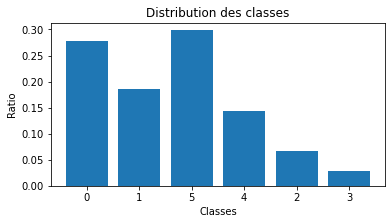

In [249]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_incremental_reoccurring_imbalanced_norm']['exploratory-dir'], DATASETS['INSECTS_incremental_reoccurring_imbalanced_norm']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

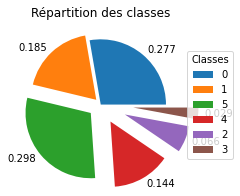

In [250]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_incremental_reoccurring_imbalanced_norm']['exploratory-dir'], DATASETS['INSECTS_incremental_reoccurring_imbalanced_norm']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [251]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['INSECTS_abrupt_balanced_norm']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-encode'] = classes
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "incrémental-redondant"

dataset_meta

{'name': 'INSECTS_abrupt_balanced_norm',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 452044,
 'varriables': ['Att1',
  'Att2',
  'Att3',
  'Att4',
  'Att5',
  'Att6',
  'Att7',
  'Att8',
  'Att9',
  'Att10',
  'Att11',
  'Att12',
  'Att13',
  'Att14',
  'Att15',
  'Att16',
  'Att17',
  'Att18',
  'Att19',
  'Att20',
  'Att21',
  'Att22',
  'Att23',
  'Att24',
  'Att25',
  'Att26',
  'Att27',
  'Att28',
  'Att29',
  'Att30',
  'Att31',
  'Att32',
  'Att33'],
 'var-nbr': 33,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 'classes': 

In [252]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['INSECTS_incremental_reoccurring_imbalanced_norm']['pre-proc-dir'],
                            DATASETS['INSECTS_incremental_reoccurring_imbalanced_norm']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['INSECTS_incremental_reoccurring_imbalanced_norm']['pre-proc-dir'],
                         DATASETS['INSECTS_incremental_reoccurring_imbalanced_norm']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="INSECTS_out_of_control_norm">INSECTS_out_of_control_norm</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [253]:
dataset_file = os.path.join(DATASETS['INSECTS_out_of_control_norm']['brute-dir'],
                            DATASETS['INSECTS_out_of_control_norm']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Classification DataStream Benchmark/INSECTS_out_of_control_norm.arff'

In [254]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.037438, 0.082779, 0.163789, 0.003256, 0.218203, 0.207292, 0.192831, 0.031748, 0.025385, 0.029229, 0.028308, 0.013847, 0.033902, 0.020569, 0.010198, 0.018987, 0.006152, 0.005639, 0.006114, 0.02002 , 0.043001, 0.036481, 0.0171  , 0.008951, 0.009969, 0.006848, 0.007202, 0.00675 , 0.010093, 0.006851, 0.005705, 0.004625, 0.007936, b'cx-quinq-male'),
        (0.114606, 0.143829, 0.212386, 0.291612, 0.32241 , 0.00435 , 0.209849, 0.007889, 0.015942, 0.035089, 0.005333, 0.075364, 0.015311, 0.039296, 0.014832, 0.005302, 0.005007, 0.034607, 0.102311, 0.061517, 0.019452, 0.014197, 0.011055, 0.004359, 0.011111, 0.0164  , 0.005515, 0.013651, 0.005591, 0.005919, 0.012753, 0.049633, 0.108045, b'ae-albopictus-female'),
        (0.335063, 0.09574 , 0.391119, 0.296171, 0.437966, 0.004426, 0.298586, 0.002637, 0.0022  , 0.016294, 0.00818 , 0.005728, 0.002501, 0.019484, 0.024201, 0.003359, 0.006797, 0.010751, 0.004342, 0.003036, 0.003126, 0.004806, 0.02223 , 0.067048, 0.033934, 0.013978, 0.004737

In [255]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.037438,0.082779,0.163789,0.003256,0.218203,0.207292,0.192831,0.031748,0.025385,0.029229,...,0.009969,0.006848,0.007202,0.006750,0.010093,0.006851,0.005705,0.004625,0.007936,b'cx-quinq-male'
1,0.114606,0.143829,0.212386,0.291612,0.322410,0.004350,0.209849,0.007889,0.015942,0.035089,...,0.011111,0.016400,0.005515,0.013651,0.005591,0.005919,0.012753,0.049633,0.108045,b'ae-albopictus-female'
2,0.335063,0.095740,0.391119,0.296171,0.437966,0.004426,0.298586,0.002637,0.002200,0.016294,...,0.033934,0.013978,0.004737,0.006863,0.003755,0.014299,0.004069,0.003695,0.010296,b'ae-albopictus-male'
3,0.084829,0.023427,0.076079,0.104947,0.115524,0.103510,0.055550,0.023300,0.017573,0.032308,...,0.011308,0.012029,0.006935,0.004178,0.003781,0.011042,0.010902,0.003871,0.003500,b'tet-angustula'
4,0.215239,0.259913,0.006842,0.390463,0.351456,0.346011,0.314702,0.018308,0.010604,0.011264,...,0.004366,0.006167,0.010061,0.020769,0.080391,0.119915,0.047262,0.008324,0.004616,b'ae-aegypti-male'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905140,0.187568,0.226772,0.336372,0.012695,0.399816,0.032705,0.278425,0.014135,0.011890,0.026717,...,0.040528,0.189771,0.276371,0.127286,0.034062,0.016912,0.011463,0.006649,0.013278,b'ae-aegypti-male'
905141,0.037033,0.046253,0.071343,0.099107,0.107183,0.096678,0.049380,0.079288,0.026521,0.125244,...,0.033519,0.019415,0.010992,0.017198,0.029014,0.022912,0.010669,0.005658,0.017285,b'tet-angustula'
905142,0.037765,0.049475,0.072314,0.127881,0.088061,0.117919,0.066882,0.046272,0.017475,0.058902,...,0.014268,0.011703,0.007436,0.006224,0.010469,0.017542,0.011761,0.004588,0.005866,b'tet-angustula'
905143,0.083107,0.022431,0.098452,0.073613,0.111027,0.100520,0.052539,0.038732,0.024171,0.076542,...,0.048095,0.029722,0.015767,0.011312,0.020785,0.028197,0.014194,0.006474,0.012139,b'tet-angustula'


<b>Nettoyage</b>

variables -> virgule flottante

In [256]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33
0,0.037438,0.082779,0.163789,0.003256,0.218203,0.207292,0.192831,0.031748,0.025385,0.029229,...,0.008951,0.009969,0.006848,0.007202,0.006750,0.010093,0.006851,0.005705,0.004625,0.007936
1,0.114606,0.143829,0.212386,0.291612,0.322410,0.004350,0.209849,0.007889,0.015942,0.035089,...,0.004359,0.011111,0.016400,0.005515,0.013651,0.005591,0.005919,0.012753,0.049633,0.108045
2,0.335063,0.095740,0.391119,0.296171,0.437966,0.004426,0.298586,0.002637,0.002200,0.016294,...,0.067048,0.033934,0.013978,0.004737,0.006863,0.003755,0.014299,0.004069,0.003695,0.010296
3,0.084829,0.023427,0.076079,0.104947,0.115524,0.103510,0.055550,0.023300,0.017573,0.032308,...,0.003381,0.011308,0.012029,0.006935,0.004178,0.003781,0.011042,0.010902,0.003871,0.003500
4,0.215239,0.259913,0.006842,0.390463,0.351456,0.346011,0.314702,0.018308,0.010604,0.011264,...,0.005526,0.004366,0.006167,0.010061,0.020769,0.080391,0.119915,0.047262,0.008324,0.004616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905140,0.187568,0.226772,0.336372,0.012695,0.399816,0.032705,0.278425,0.014135,0.011890,0.026717,...,0.011688,0.040528,0.189771,0.276371,0.127286,0.034062,0.016912,0.011463,0.006649,0.013278
905141,0.037033,0.046253,0.071343,0.099107,0.107183,0.096678,0.049380,0.079288,0.026521,0.125244,...,0.032202,0.033519,0.019415,0.010992,0.017198,0.029014,0.022912,0.010669,0.005658,0.017285
905142,0.037765,0.049475,0.072314,0.127881,0.088061,0.117919,0.066882,0.046272,0.017475,0.058902,...,0.008657,0.014268,0.011703,0.007436,0.006224,0.010469,0.017542,0.011761,0.004588,0.005866
905143,0.083107,0.022431,0.098452,0.073613,0.111027,0.100520,0.052539,0.038732,0.024171,0.076542,...,0.028511,0.048095,0.029722,0.015767,0.011312,0.020785,0.028197,0.014194,0.006474,0.012139


class -> entiers

In [257]:
classes = dataset_df['class'].values.tolist()
classes

[b'cx-quinq-male',
 b'ae-albopictus-female',
 b'ae-albopictus-male',
 b'tet-angustula',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'tet-angustula',
 b'ae-albopictus-female',
 b'ae-aegypti-male',
 b'ae-aegypti-female',
 b'tet-angustula',
 b'musca',
 b'tet-angustula',
 b'musca',
 b'tet-angustula',
 b'musca',
 b'tet-angustula',
 b'cx-quinq-female',
 b'musca',
 b'musca',
 b'ae-aegypti-male',
 b'musca',
 b'cx-quinq-male',
 b'tet-angustula',
 b'ae-aegypti-female',
 b'musca',
 b'fruit-female',
 b'musca',
 b'cx-quinq-female',
 b'musca',
 b'tet-angustula',
 b'ae-aegypti-female',
 b'cx-quinq-male',
 b'tet-angustula',
 b'tet-angustula',
 b'cx-quinq-male',
 b'musca',
 b'ae-aegypti-female',
 b'cx-quinq-female',
 b'crisopideo',
 b'ae-aegypti-female',
 b'cx-quinq-male',
 b'ae-aegypti-female',
 b'musca',
 b'musca',
 b'sca-bipunctata',
 b'musca',
 b'euro-bee',
 b'cx-quinq-male',
 b'tet-angustula',
 b'tet-angustula',
 b'cx-quinq-female',
 b'cx-quinq-male',
 b'tet-angustula',
 b'ae-aegypti-female',
 b

In [258]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['cx-quinq-male',
 'ae-albopictus-female',
 'ae-albopictus-male',
 'tet-angustula',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'tet-angustula',
 'ae-albopictus-female',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'tet-angustula',
 'musca',
 'tet-angustula',
 'musca',
 'tet-angustula',
 'musca',
 'tet-angustula',
 'cx-quinq-female',
 'musca',
 'musca',
 'ae-aegypti-male',
 'musca',
 'cx-quinq-male',
 'tet-angustula',
 'ae-aegypti-female',
 'musca',
 'fruit-female',
 'musca',
 'cx-quinq-female',
 'musca',
 'tet-angustula',
 'ae-aegypti-female',
 'cx-quinq-male',
 'tet-angustula',
 'tet-angustula',
 'cx-quinq-male',
 'musca',
 'ae-aegypti-female',
 'cx-quinq-female',
 'crisopideo',
 'ae-aegypti-female',
 'cx-quinq-male',
 'ae-aegypti-female',
 'musca',
 'musca',
 'sca-bipunctata',
 'musca',
 'euro-bee',
 'cx-quinq-male',
 'tet-angustula',
 'tet-angustula',
 'cx-quinq-female',
 'cx-quinq-male',
 'tet-angustula',
 'ae-aegypti-female',
 'tet-angustula',
 'ae-aegypti-male',
 'ae-aegypti-male',

In [259]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(classes)

LabelEncoder()

In [260]:
variables['class'] = label_encoder.transform(classes)
variables['class'] = variables['class'].astype('int32')
dataset_df = variables
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.037438,0.082779,0.163789,0.003256,0.218203,0.207292,0.192831,0.031748,0.025385,0.029229,...,0.009969,0.006848,0.007202,0.006750,0.010093,0.006851,0.005705,0.004625,0.007936,10
1,0.114606,0.143829,0.212386,0.291612,0.322410,0.004350,0.209849,0.007889,0.015942,0.035089,...,0.011111,0.016400,0.005515,0.013651,0.005591,0.005919,0.012753,0.049633,0.108045,2
2,0.335063,0.095740,0.391119,0.296171,0.437966,0.004426,0.298586,0.002637,0.002200,0.016294,...,0.033934,0.013978,0.004737,0.006863,0.003755,0.014299,0.004069,0.003695,0.010296,3
3,0.084829,0.023427,0.076079,0.104947,0.115524,0.103510,0.055550,0.023300,0.017573,0.032308,...,0.011308,0.012029,0.006935,0.004178,0.003781,0.011042,0.010902,0.003871,0.003500,23
4,0.215239,0.259913,0.006842,0.390463,0.351456,0.346011,0.314702,0.018308,0.010604,0.011264,...,0.004366,0.006167,0.010061,0.020769,0.080391,0.119915,0.047262,0.008324,0.004616,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905140,0.187568,0.226772,0.336372,0.012695,0.399816,0.032705,0.278425,0.014135,0.011890,0.026717,...,0.040528,0.189771,0.276371,0.127286,0.034062,0.016912,0.011463,0.006649,0.013278,1
905141,0.037033,0.046253,0.071343,0.099107,0.107183,0.096678,0.049380,0.079288,0.026521,0.125244,...,0.033519,0.019415,0.010992,0.017198,0.029014,0.022912,0.010669,0.005658,0.017285,23
905142,0.037765,0.049475,0.072314,0.127881,0.088061,0.117919,0.066882,0.046272,0.017475,0.058902,...,0.014268,0.011703,0.007436,0.006224,0.010469,0.017542,0.011761,0.004588,0.005866,23
905143,0.083107,0.022431,0.098452,0.073613,0.111027,0.100520,0.052539,0.038732,0.024171,0.076542,...,0.048095,0.029722,0.015767,0.011312,0.020785,0.028197,0.014194,0.006474,0.012139,23


<b>Taille</b>

In [261]:
Taille = len(dataset_df.index)
Taille

905145

<b>Variables</b>

In [262]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['Att1',
 'Att2',
 'Att3',
 'Att4',
 'Att5',
 'Att6',
 'Att7',
 'Att8',
 'Att9',
 'Att10',
 'Att11',
 'Att12',
 'Att13',
 'Att14',
 'Att15',
 'Att16',
 'Att17',
 'Att18',
 'Att19',
 'Att20',
 'Att21',
 'Att22',
 'Att23',
 'Att24',
 'Att25',
 'Att26',
 'Att27',
 'Att28',
 'Att29',
 'Att30',
 'Att31',
 'Att32',
 'Att33']

In [263]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [264]:
# Distribution des classes

classes = list(set(classes))
classes_encoded = list(label_encoder.transform(classes))

classes_dist = dict()
for classe in classes_encoded :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[str(classe)] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)


## Correspondance
classes_encoded = [str(classe_encoded) for classe_encoded in classes_encoded ]
classes = dict(zip(classes_encoded, classes))

1  :  85193
10  :  136249
9  :  65700
6  :  2807
3  :  13616
17  :  6407
15  :  27350
23  :  170220
11  :  2544
16  :  8099
22  :  1258
0  :  127948
7  :  916
12  :  157
13  :  3803
19  :  168819
14  :  9318
8  :  10154
4  :  3805
21  :  22547
18  :  5491
2  :  30859
5  :  1868
20  :  17
Total =  905145
Distribution correcte !
Nombre de classes trouvées =  24


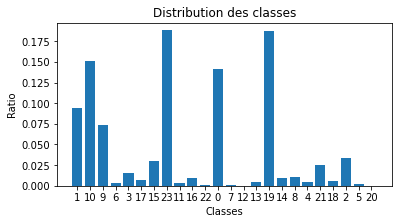

In [265]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_out_of_control_norm']['exploratory-dir'], DATASETS['INSECTS_out_of_control_norm']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

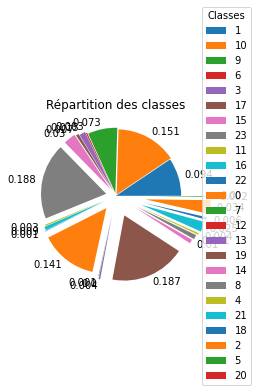

In [266]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['INSECTS_out_of_control_norm']['exploratory-dir'], DATASETS['INSECTS_out_of_control_norm']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [267]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['INSECTS_out_of_control_norm']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-encode'] = classes
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "Non controlé"

dataset_meta

{'name': 'INSECTS_out_of_control_norm',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 905145,
 'varriables': ['Att1',
  'Att2',
  'Att3',
  'Att4',
  'Att5',
  'Att6',
  'Att7',
  'Att8',
  'Att9',
  'Att10',
  'Att11',
  'Att12',
  'Att13',
  'Att14',
  'Att15',
  'Att16',
  'Att17',
  'Att18',
  'Att19',
  'Att20',
  'Att21',
  'Att22',
  'Att23',
  'Att24',
  'Att25',
  'Att26',
  'Att27',
  'Att28',
  'Att29',
  'Att30',
  'Att31',
  'Att32',
  'Att33'],
 'var-nbr': 33,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 'classes': {

In [268]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['INSECTS_out_of_control_norm']['pre-proc-dir'],
                            DATASETS['INSECTS_out_of_control_norm']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['INSECTS_out_of_control_norm']['pre-proc-dir'],
                         DATASETS['INSECTS_out_of_control_norm']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="KDD_CUP_99">KDD_CUP_99</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [410]:
dataset_file = os.path.join(DATASETS['KDD_CUP_99']['brute-dir'],
                            DATASETS['KDD_CUP_99']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/KDD_CUP_99.arff'

In [411]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0., b'udp', b'domain_u', b'SF',   46., 46., b'0', 0., 0., 0., 0., b'0', 0., 0., 0., 0., 0., 0., 0., 0., b'0', b'0',  11.,  17., 0., 0., 0., 0., 1., 0., 0.12, 255., 255., 1., 0., 0., 0., 0., 0., 0., 0., b'normal.'),
        (0., b'icmp', b'ecr_i', b'SF',  520.,  0., b'0', 0., 0., 0., 0., b'0', 0., 0., 0., 0., 0., 0., 0., 0., b'0', b'0', 459., 459., 0., 0., 0., 0., 1., 0., 0.  , 255., 255., 1., 0., 1., 0., 0., 0., 0., 0., b'smurf.'),
        (0., b'icmp', b'ecr_i', b'SF', 1032.,  0., b'0', 0., 0., 0., 0., b'0', 0., 0., 0., 0., 0., 0., 0., 0., b'0', b'0', 511., 511., 0., 0., 0., 0., 1., 0., 0.  , 255., 255., 1., 0., 1., 0., 0., 0., 0., 0., b'smurf.'),
        ...,
        (0., b'icmp', b'ecr_i', b'SF', 1032.,  0., b'0', 0., 0., 0., 0., b'0', 0., 0., 0., 0., 0., 0., 0., 0., b'0', b'0', 511., 511., 0., 0., 0., 0., 1., 0., 0.  , 255., 255., 1., 0., 1., 0., 0., 0., 0., 0., b'smurf.'),
        (0., b'icmp', b'ecr_i', b'SF', 1032.,  0., b'0', 0., 0., 0., 0., b'0', 0., 0., 0., 0., 0., 0

In [412]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'udp',b'domain_u',b'SF',46.0,46.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0.0,b'icmp',b'ecr_i',b'SF',520.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
2,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
3,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.06,0.0,0.0,1.0,1.0,0.0,0.0,b'neptune.'
4,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,11.0,0.04,0.07,0.0,0.0,1.0,1.0,0.0,0.0,b'neptune.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0.0,b'icmp',b'ecr_i',b'SF',520.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
494017,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
494018,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
494019,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'


<b>Nettoyage</b>

variables -> virgule flottante

In [397]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9,14.0
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0,21.0
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0,33.1
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9,16.0
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0,9.0
...,...,...,...,...,...,...,...,...
18154,32.6,21.9,1022.7,7.0,12.4,26.0,41.0,24.8
18155,36.8,25.4,1014.9,7.0,10.0,19.0,57.2,21.2
18156,41.9,29.9,1010.0,7.0,4.7,9.9,62.6,28.4
18157,42.4,29.7,1011.3,7.0,3.3,8.9,51.8,32.0


class -> entiers

In [398]:
classes = dataset_df['class'].values.tolist()
classes

[b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'2',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'2',
 b'1',
 b'2',
 b'1',
 b'2',
 b'2',
 b'2',

In [399]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1'

In [400]:
classes = [int(classe) for classe in classes]
classes

[1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,


In [401]:
variables['class'] = classes
dataset_df = variables
dataset_df

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,class
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9,14.0,1
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0,21.0,1
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0,33.1,2
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9,16.0,2
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0,9.0,1
...,...,...,...,...,...,...,...,...,...
18154,32.6,21.9,1022.7,7.0,12.4,26.0,41.0,24.8,2
18155,36.8,25.4,1014.9,7.0,10.0,19.0,57.2,21.2,1
18156,41.9,29.9,1010.0,7.0,4.7,9.9,62.6,28.4,1
18157,42.4,29.7,1011.3,7.0,3.3,8.9,51.8,32.0,1


<b>Taille</b>

In [402]:
Taille = len(dataset_df.index)
Taille

18159

<b>Variables</b>

In [403]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['attribute1',
 'attribute2',
 'attribute3',
 'attribute4',
 'attribute5',
 'attribute6',
 'attribute7',
 'attribute8']

In [404]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [405]:
# Distribution des classes

classes = list(set(dataset_df['class']))

classes_dist = dict()
for classe in classes :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[classe] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)

1  :  12461
2  :  5698
Total =  18159
Distribution correcte !
Nombre de classes trouvées =  2


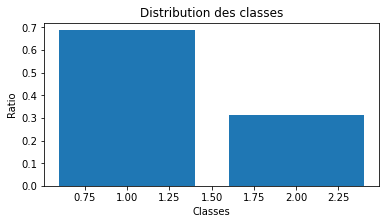

In [406]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['KDD_CUP_99']['exploratory-dir'], DATASETS['KDD_CUP_99']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

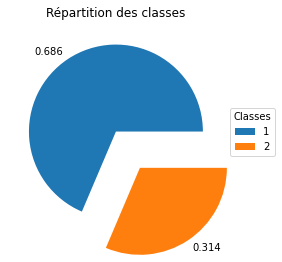

In [407]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['KDD_CUP_99']['exploratory-dir'], DATASETS['KDD_CUP_99']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [408]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['KDD_CUP_99']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "-"

dataset_meta

{'name': 'NOAA',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 18159,
 'varriables': ['attribute1',
  'attribute2',
  'attribute3',
  'attribute4',
  'attribute5',
  'attribute6',
  'attribute7',
  'attribute8'],
 'var-nbr': 8,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 'classes': {1: 0.686, 2: 0.314},
 'class-nbr': 2,
 'concept-drift': '-'}

In [409]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['KDD_CUP_99']['pre-proc-dir'],
                            DATASETS['KDD_CUP_99']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['KDD_CUP_99']['pre-proc-dir'],
                         DATASETS['KDD_CUP_99']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="Key_Stroke">Key_Stroke</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [394]:
dataset_file = os.path.join(DATASETS['Key_Stroke']['brute-dir'],
                            DATASETS['Key_Stroke']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/NOAA.arff'

In [395]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(19.8, 14. , 1019.6, 8.4,  9.9, 15.9, 28.9, 14. , b'1'),
        (26.8, 22.2, 1006.2, 8.1, 10.9, 19. , 34. , 21. , b'1'),
        (34.6, 32.9, 1004.6, 3.9, 13.8, 22. , 36. , 33.1, b'2'), ...,
        (41.9, 29.9, 1010. , 7. ,  4.7,  9.9, 62.6, 28.4, b'1'),
        (42.4, 29.7, 1011.3, 7. ,  3.3,  8.9, 51.8, 32. , b'1'),
        (36.6, 29.5, 1017.9, 6.8,  4.8, 13. , 53.6, 24.8, b'1')],
       dtype=[('attribute1', '<f8'), ('attribute2', '<f8'), ('attribute3', '<f8'), ('attribute4', '<f8'), ('attribute5', '<f8'), ('attribute6', '<f8'), ('attribute7', '<f8'), ('attribute8', '<f8'), ('class', 'S1')]),
 Dataset: NOAA
 	attribute1's type is numeric
 	attribute2's type is numeric
 	attribute3's type is numeric
 	attribute4's type is numeric
 	attribute5's type is numeric
 	attribute6's type is numeric
 	attribute7's type is numeric
 	attribute8's type is numeric
 	class's type is nominal, range is ('1', '2'))

In [396]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,class
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9,14.0,b'1'
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0,21.0,b'1'
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0,33.1,b'2'
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9,16.0,b'2'
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0,9.0,b'1'
...,...,...,...,...,...,...,...,...,...
18154,32.6,21.9,1022.7,7.0,12.4,26.0,41.0,24.8,b'2'
18155,36.8,25.4,1014.9,7.0,10.0,19.0,57.2,21.2,b'1'
18156,41.9,29.9,1010.0,7.0,4.7,9.9,62.6,28.4,b'1'
18157,42.4,29.7,1011.3,7.0,3.3,8.9,51.8,32.0,b'1'


<b>Nettoyage</b>

variables -> virgule flottante

In [397]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9,14.0
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0,21.0
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0,33.1
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9,16.0
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0,9.0
...,...,...,...,...,...,...,...,...
18154,32.6,21.9,1022.7,7.0,12.4,26.0,41.0,24.8
18155,36.8,25.4,1014.9,7.0,10.0,19.0,57.2,21.2
18156,41.9,29.9,1010.0,7.0,4.7,9.9,62.6,28.4
18157,42.4,29.7,1011.3,7.0,3.3,8.9,51.8,32.0


class -> entiers

In [398]:
classes = dataset_df['class'].values.tolist()
classes

[b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'2',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'2',
 b'1',
 b'2',
 b'1',
 b'2',
 b'2',
 b'2',

In [399]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1'

In [400]:
classes = [int(classe) for classe in classes]
classes

[1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,


In [401]:
variables['class'] = classes
dataset_df = variables
dataset_df

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,class
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9,14.0,1
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0,21.0,1
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0,33.1,2
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9,16.0,2
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0,9.0,1
...,...,...,...,...,...,...,...,...,...
18154,32.6,21.9,1022.7,7.0,12.4,26.0,41.0,24.8,2
18155,36.8,25.4,1014.9,7.0,10.0,19.0,57.2,21.2,1
18156,41.9,29.9,1010.0,7.0,4.7,9.9,62.6,28.4,1
18157,42.4,29.7,1011.3,7.0,3.3,8.9,51.8,32.0,1


<b>Taille</b>

In [402]:
Taille = len(dataset_df.index)
Taille

18159

<b>Variables</b>

In [403]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['attribute1',
 'attribute2',
 'attribute3',
 'attribute4',
 'attribute5',
 'attribute6',
 'attribute7',
 'attribute8']

In [404]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [405]:
# Distribution des classes

classes = list(set(dataset_df['class']))

classes_dist = dict()
for classe in classes :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[classe] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)

1  :  12461
2  :  5698
Total =  18159
Distribution correcte !
Nombre de classes trouvées =  2


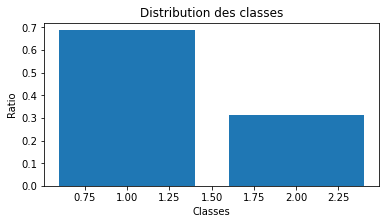

In [406]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Key_Stroke']['exploratory-dir'], DATASETS['Key_Stroke']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

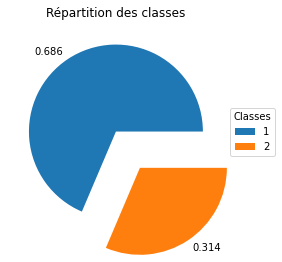

In [407]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Key_Stroke']['exploratory-dir'], DATASETS['Key_Stroke']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [408]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['Key_Stroke']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "-"

dataset_meta

{'name': 'NOAA',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 18159,
 'varriables': ['attribute1',
  'attribute2',
  'attribute3',
  'attribute4',
  'attribute5',
  'attribute6',
  'attribute7',
  'attribute8'],
 'var-nbr': 8,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 'classes': {1: 0.686, 2: 0.314},
 'class-nbr': 2,
 'concept-drift': '-'}

In [409]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['Key_Stroke']['pre-proc-dir'],
                            DATASETS['Key_Stroke']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['Key_Stroke']['pre-proc-dir'],
                         DATASETS['Key_Stroke']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="Luxembourg">Luxembourg</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [394]:
dataset_file = os.path.join(DATASETS['Luxembourg']['brute-dir'],
                            DATASETS['Luxembourg']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/NOAA.arff'

In [395]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(19.8, 14. , 1019.6, 8.4,  9.9, 15.9, 28.9, 14. , b'1'),
        (26.8, 22.2, 1006.2, 8.1, 10.9, 19. , 34. , 21. , b'1'),
        (34.6, 32.9, 1004.6, 3.9, 13.8, 22. , 36. , 33.1, b'2'), ...,
        (41.9, 29.9, 1010. , 7. ,  4.7,  9.9, 62.6, 28.4, b'1'),
        (42.4, 29.7, 1011.3, 7. ,  3.3,  8.9, 51.8, 32. , b'1'),
        (36.6, 29.5, 1017.9, 6.8,  4.8, 13. , 53.6, 24.8, b'1')],
       dtype=[('attribute1', '<f8'), ('attribute2', '<f8'), ('attribute3', '<f8'), ('attribute4', '<f8'), ('attribute5', '<f8'), ('attribute6', '<f8'), ('attribute7', '<f8'), ('attribute8', '<f8'), ('class', 'S1')]),
 Dataset: NOAA
 	attribute1's type is numeric
 	attribute2's type is numeric
 	attribute3's type is numeric
 	attribute4's type is numeric
 	attribute5's type is numeric
 	attribute6's type is numeric
 	attribute7's type is numeric
 	attribute8's type is numeric
 	class's type is nominal, range is ('1', '2'))

In [396]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,class
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9,14.0,b'1'
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0,21.0,b'1'
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0,33.1,b'2'
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9,16.0,b'2'
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0,9.0,b'1'
...,...,...,...,...,...,...,...,...,...
18154,32.6,21.9,1022.7,7.0,12.4,26.0,41.0,24.8,b'2'
18155,36.8,25.4,1014.9,7.0,10.0,19.0,57.2,21.2,b'1'
18156,41.9,29.9,1010.0,7.0,4.7,9.9,62.6,28.4,b'1'
18157,42.4,29.7,1011.3,7.0,3.3,8.9,51.8,32.0,b'1'


<b>Nettoyage</b>

variables -> virgule flottante

In [397]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9,14.0
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0,21.0
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0,33.1
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9,16.0
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0,9.0
...,...,...,...,...,...,...,...,...
18154,32.6,21.9,1022.7,7.0,12.4,26.0,41.0,24.8
18155,36.8,25.4,1014.9,7.0,10.0,19.0,57.2,21.2
18156,41.9,29.9,1010.0,7.0,4.7,9.9,62.6,28.4
18157,42.4,29.7,1011.3,7.0,3.3,8.9,51.8,32.0


class -> entiers

In [398]:
classes = dataset_df['class'].values.tolist()
classes

[b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'2',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'2',
 b'1',
 b'2',
 b'1',
 b'2',
 b'2',
 b'2',

In [399]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1'

In [400]:
classes = [int(classe) for classe in classes]
classes

[1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,


In [401]:
variables['class'] = classes
dataset_df = variables
dataset_df

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,class
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9,14.0,1
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0,21.0,1
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0,33.1,2
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9,16.0,2
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0,9.0,1
...,...,...,...,...,...,...,...,...,...
18154,32.6,21.9,1022.7,7.0,12.4,26.0,41.0,24.8,2
18155,36.8,25.4,1014.9,7.0,10.0,19.0,57.2,21.2,1
18156,41.9,29.9,1010.0,7.0,4.7,9.9,62.6,28.4,1
18157,42.4,29.7,1011.3,7.0,3.3,8.9,51.8,32.0,1


<b>Taille</b>

In [402]:
Taille = len(dataset_df.index)
Taille

18159

<b>Variables</b>

In [403]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['attribute1',
 'attribute2',
 'attribute3',
 'attribute4',
 'attribute5',
 'attribute6',
 'attribute7',
 'attribute8']

In [404]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [405]:
# Distribution des classes

classes = list(set(dataset_df['class']))

classes_dist = dict()
for classe in classes :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[classe] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)

1  :  12461
2  :  5698
Total =  18159
Distribution correcte !
Nombre de classes trouvées =  2


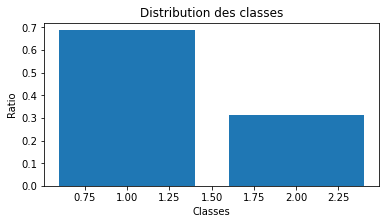

In [406]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Luxembourg']['exploratory-dir'], DATASETS['Luxembourg']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

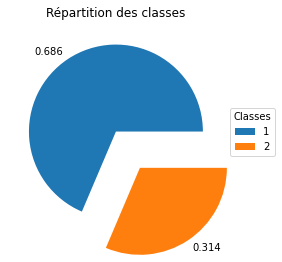

In [407]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Luxembourg']['exploratory-dir'], DATASETS['Luxembourg']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [408]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['Luxembourg']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "-"

dataset_meta

{'name': 'NOAA',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 18159,
 'varriables': ['attribute1',
  'attribute2',
  'attribute3',
  'attribute4',
  'attribute5',
  'attribute6',
  'attribute7',
  'attribute8'],
 'var-nbr': 8,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 'classes': {1: 0.686, 2: 0.314},
 'class-nbr': 2,
 'concept-drift': '-'}

In [409]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['Luxembourg']['pre-proc-dir'],
                            DATASETS['Luxembourg']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['Luxembourg']['pre-proc-dir'],
                         DATASETS['Luxembourg']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="NOAA">NOAA</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 18159 </li>
    <li><strong>Nombre de variables : </strong> 8 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [394]:
dataset_file = os.path.join(DATASETS['NOAA']['brute-dir'],
                            DATASETS['NOAA']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/NOAA.arff'

In [395]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(19.8, 14. , 1019.6, 8.4,  9.9, 15.9, 28.9, 14. , b'1'),
        (26.8, 22.2, 1006.2, 8.1, 10.9, 19. , 34. , 21. , b'1'),
        (34.6, 32.9, 1004.6, 3.9, 13.8, 22. , 36. , 33.1, b'2'), ...,
        (41.9, 29.9, 1010. , 7. ,  4.7,  9.9, 62.6, 28.4, b'1'),
        (42.4, 29.7, 1011.3, 7. ,  3.3,  8.9, 51.8, 32. , b'1'),
        (36.6, 29.5, 1017.9, 6.8,  4.8, 13. , 53.6, 24.8, b'1')],
       dtype=[('attribute1', '<f8'), ('attribute2', '<f8'), ('attribute3', '<f8'), ('attribute4', '<f8'), ('attribute5', '<f8'), ('attribute6', '<f8'), ('attribute7', '<f8'), ('attribute8', '<f8'), ('class', 'S1')]),
 Dataset: NOAA
 	attribute1's type is numeric
 	attribute2's type is numeric
 	attribute3's type is numeric
 	attribute4's type is numeric
 	attribute5's type is numeric
 	attribute6's type is numeric
 	attribute7's type is numeric
 	attribute8's type is numeric
 	class's type is nominal, range is ('1', '2'))

In [396]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,class
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9,14.0,b'1'
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0,21.0,b'1'
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0,33.1,b'2'
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9,16.0,b'2'
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0,9.0,b'1'
...,...,...,...,...,...,...,...,...,...
18154,32.6,21.9,1022.7,7.0,12.4,26.0,41.0,24.8,b'2'
18155,36.8,25.4,1014.9,7.0,10.0,19.0,57.2,21.2,b'1'
18156,41.9,29.9,1010.0,7.0,4.7,9.9,62.6,28.4,b'1'
18157,42.4,29.7,1011.3,7.0,3.3,8.9,51.8,32.0,b'1'


<b>Nettoyage</b>

variables -> virgule flottante

In [397]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9,14.0
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0,21.0
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0,33.1
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9,16.0
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0,9.0
...,...,...,...,...,...,...,...,...
18154,32.6,21.9,1022.7,7.0,12.4,26.0,41.0,24.8
18155,36.8,25.4,1014.9,7.0,10.0,19.0,57.2,21.2
18156,41.9,29.9,1010.0,7.0,4.7,9.9,62.6,28.4
18157,42.4,29.7,1011.3,7.0,3.3,8.9,51.8,32.0


class -> entiers

In [398]:
classes = dataset_df['class'].values.tolist()
classes

[b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'2',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'2',
 b'1',
 b'2',
 b'1',
 b'2',
 b'2',
 b'2',

In [399]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1'

In [400]:
classes = [int(classe) for classe in classes]
classes

[1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,


In [401]:
variables['class'] = classes
dataset_df = variables
dataset_df

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,class
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9,14.0,1
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0,21.0,1
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0,33.1,2
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9,16.0,2
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0,9.0,1
...,...,...,...,...,...,...,...,...,...
18154,32.6,21.9,1022.7,7.0,12.4,26.0,41.0,24.8,2
18155,36.8,25.4,1014.9,7.0,10.0,19.0,57.2,21.2,1
18156,41.9,29.9,1010.0,7.0,4.7,9.9,62.6,28.4,1
18157,42.4,29.7,1011.3,7.0,3.3,8.9,51.8,32.0,1


<b>Taille</b>

In [402]:
Taille = len(dataset_df.index)
Taille

18159

<b>Variables</b>

In [403]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['attribute1',
 'attribute2',
 'attribute3',
 'attribute4',
 'attribute5',
 'attribute6',
 'attribute7',
 'attribute8']

In [404]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [405]:
# Distribution des classes

classes = list(set(dataset_df['class']))

classes_dist = dict()
for classe in classes :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[classe] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)

1  :  12461
2  :  5698
Total =  18159
Distribution correcte !
Nombre de classes trouvées =  2


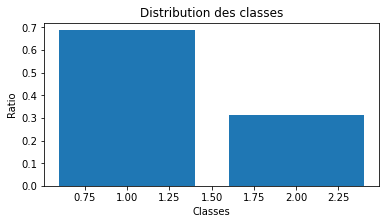

In [406]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['NOAA']['exploratory-dir'], DATASETS['NOAA']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

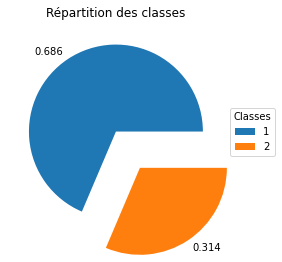

In [407]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['NOAA']['exploratory-dir'], DATASETS['NOAA']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [408]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['NOAA']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "-"

dataset_meta

{'name': 'NOAA',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 18159,
 'varriables': ['attribute1',
  'attribute2',
  'attribute3',
  'attribute4',
  'attribute5',
  'attribute6',
  'attribute7',
  'attribute8'],
 'var-nbr': 8,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 'classes': {1: 0.686, 2: 0.314},
 'class-nbr': 2,
 'concept-drift': '-'}

In [409]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['NOAA']['pre-proc-dir'],
                            DATASETS['NOAA']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['NOAA']['pre-proc-dir'],
                         DATASETS['NOAA']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="Outdoor">Outdoor</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 4000 </li>
    <li><strong>Nombre de variables : </strong> 21 </li>
    <li><strong>Nombre de classes : </strong> 40 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [377]:
dataset_file = os.path.join(DATASETS['Outdoor']['brute-dir'],
                            DATASETS['Outdoor']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Outdoor.arff'

In [378]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.       , 0., 0., 0.       , 0.       , 0.      , 0., 0.0009357, 0.0131  , 0.0003119, 0.      , 0.030256 , 0.78072  , 0.15783, 0.0006238, 0.0028072, 0.0028072, 0.0053026, 0.0003119, 0.0028072, 0.0021834, b'3'),
        (0.0002889, 0., 0., 0.       , 0.       , 0.      , 0., 0.0014443, 0.011265, 0.0002889, 0.      , 0.022819 , 0.78596  , 0.15945, 0.0011554, 0.0008666, 0.0043328, 0.0072213, 0.       , 0.0023108, 0.0025997, b'3'),
        (0.0002733, 0., 0., 0.       , 0.       , 0.      , 0., 0.0024597, 0.019131, 0.       , 0.      , 0.02651  , 0.79721  , 0.13966, 0.       , 0.0024597, 0.0010932, 0.0030063, 0.0005466, 0.0040995, 0.0035529, b'3'),
        ...,
        (0.       , 0., 0., 0.0001525, 0.0028972, 0.016164, 0., 0.       , 0.013724, 0.066484 , 0.060689, 0.0004575, 0.0067094, 0.3559 , 0.47133  , 0.0025923, 0.       , 0.0012199, 0.0015249, 0.       , 0.0001525, b'20'),
        (0.       , 0., 0., 0.       , 0.0021978, 0.015971, 0., 0.0001465, 0.017289, 0.063736 , 0.0654

In [379]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att13,att14,att15,att16,att17,att18,att19,att20,att21,class
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000936,0.013100,0.000312,...,0.780720,0.15783,0.000624,0.002807,0.002807,0.005303,0.000312,0.002807,0.002183,b'3'
1,0.000289,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.001444,0.011265,0.000289,...,0.785960,0.15945,0.001155,0.000867,0.004333,0.007221,0.000000,0.002311,0.002600,b'3'
2,0.000273,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.002460,0.019131,0.000000,...,0.797210,0.13966,0.000000,0.002460,0.001093,0.003006,0.000547,0.004099,0.003553,b'3'
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000732,0.009277,0.000000,...,0.788330,0.15552,0.000488,0.000488,0.002441,0.006836,0.000000,0.003906,0.002441,b'3'
4,0.000690,0.000000,0.0,0.000000,0.000000,0.000000,0.00023,0.001611,0.021629,0.001381,...,0.791070,0.13369,0.000460,0.003221,0.002071,0.005292,0.000230,0.002991,0.001381,b'3'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.000000,0.000791,0.0,0.000198,0.000198,0.015628,0.00000,0.000000,0.016419,0.074975,...,0.000000,0.34639,0.473590,0.001780,0.000000,0.000989,0.000593,0.000000,0.000000,b'20'
3996,0.000000,0.000000,0.0,0.000375,0.000938,0.015575,0.00000,0.000000,0.017639,0.075249,...,0.002815,0.34378,0.471380,0.002064,0.000000,0.002627,0.000563,0.000000,0.000000,b'20'
3997,0.000000,0.000000,0.0,0.000152,0.002897,0.016164,0.00000,0.000000,0.013724,0.066484,...,0.006709,0.35590,0.471330,0.002592,0.000000,0.001220,0.001525,0.000000,0.000152,b'20'
3998,0.000000,0.000000,0.0,0.000000,0.002198,0.015971,0.00000,0.000147,0.017289,0.063736,...,0.004542,0.34432,0.481610,0.002784,0.000000,0.001172,0.000440,0.000000,0.000000,b'20'


<b>Nettoyage</b>

variables -> virgule flottante

In [381]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000936,0.013100,0.000312,...,0.030256,0.780720,0.15783,0.000624,0.002807,0.002807,0.005303,0.000312,0.002807,0.002183
1,0.000289,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.001444,0.011265,0.000289,...,0.022819,0.785960,0.15945,0.001155,0.000867,0.004333,0.007221,0.000000,0.002311,0.002600
2,0.000273,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.002460,0.019131,0.000000,...,0.026510,0.797210,0.13966,0.000000,0.002460,0.001093,0.003006,0.000547,0.004099,0.003553
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000732,0.009277,0.000000,...,0.029541,0.788330,0.15552,0.000488,0.000488,0.002441,0.006836,0.000000,0.003906,0.002441
4,0.000690,0.000000,0.0,0.000000,0.000000,0.000000,0.00023,0.001611,0.021629,0.001381,...,0.034054,0.791070,0.13369,0.000460,0.003221,0.002071,0.005292,0.000230,0.002991,0.001381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.000000,0.000791,0.0,0.000198,0.000198,0.015628,0.00000,0.000000,0.016419,0.074975,...,0.000198,0.000000,0.34639,0.473590,0.001780,0.000000,0.000989,0.000593,0.000000,0.000000
3996,0.000000,0.000000,0.0,0.000375,0.000938,0.015575,0.00000,0.000000,0.017639,0.075249,...,0.000188,0.002815,0.34378,0.471380,0.002064,0.000000,0.002627,0.000563,0.000000,0.000000
3997,0.000000,0.000000,0.0,0.000152,0.002897,0.016164,0.00000,0.000000,0.013724,0.066484,...,0.000458,0.006709,0.35590,0.471330,0.002592,0.000000,0.001220,0.001525,0.000000,0.000152
3998,0.000000,0.000000,0.0,0.000000,0.002198,0.015971,0.00000,0.000147,0.017289,0.063736,...,0.000293,0.004542,0.34432,0.481610,0.002784,0.000000,0.001172,0.000440,0.000000,0.000000


class -> entiers

In [382]:
classes = dataset_df['class'].values.tolist()
classes

[b'3',
 b'3',
 b'3',
 b'3',
 b'3',
 b'3',
 b'3',
 b'3',
 b'3',
 b'3',
 b'31',
 b'31',
 b'31',
 b'31',
 b'31',
 b'31',
 b'31',
 b'31',
 b'31',
 b'31',
 b'21',
 b'21',
 b'21',
 b'21',
 b'21',
 b'21',
 b'21',
 b'21',
 b'21',
 b'21',
 b'10',
 b'10',
 b'10',
 b'10',
 b'10',
 b'10',
 b'10',
 b'10',
 b'10',
 b'10',
 b'20',
 b'20',
 b'20',
 b'20',
 b'20',
 b'20',
 b'20',
 b'20',
 b'20',
 b'20',
 b'27',
 b'27',
 b'27',
 b'27',
 b'27',
 b'27',
 b'27',
 b'27',
 b'27',
 b'27',
 b'23',
 b'23',
 b'23',
 b'23',
 b'23',
 b'23',
 b'23',
 b'23',
 b'23',
 b'23',
 b'39',
 b'39',
 b'39',
 b'39',
 b'39',
 b'39',
 b'39',
 b'39',
 b'39',
 b'39',
 b'23',
 b'23',
 b'23',
 b'23',
 b'23',
 b'23',
 b'23',
 b'23',
 b'23',
 b'23',
 b'35',
 b'35',
 b'35',
 b'35',
 b'35',
 b'35',
 b'35',
 b'35',
 b'35',
 b'35',
 b'21',
 b'21',
 b'21',
 b'21',
 b'21',
 b'21',
 b'21',
 b'21',
 b'21',
 b'21',
 b'35',
 b'35',
 b'35',
 b'35',
 b'35',
 b'35',
 b'35',
 b'35',
 b'35',
 b'35',
 b'34',
 b'34',
 b'34',
 b'34',
 b'34',
 b'34',
 b

In [383]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '31',
 '31',
 '31',
 '31',
 '31',
 '31',
 '31',
 '31',
 '31',
 '31',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '27',
 '27',
 '27',
 '27',
 '27',
 '27',
 '27',
 '27',
 '27',
 '27',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '39',
 '39',
 '39',
 '39',
 '39',
 '39',
 '39',
 '39',
 '39',
 '39',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '34',
 '34',
 '34',
 '34',
 '34',
 '34',
 '34',
 '34',
 '34',
 '34',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '24',
 '24',
 '24',
 '24',
 '

In [384]:
classes = [int(classe) for classe in classes]
classes

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 21,
 21,
 21,
 21,


In [385]:
variables['class'] = classes
dataset_df = variables
dataset_df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att13,att14,att15,att16,att17,att18,att19,att20,att21,class
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000936,0.013100,0.000312,...,0.780720,0.15783,0.000624,0.002807,0.002807,0.005303,0.000312,0.002807,0.002183,3
1,0.000289,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.001444,0.011265,0.000289,...,0.785960,0.15945,0.001155,0.000867,0.004333,0.007221,0.000000,0.002311,0.002600,3
2,0.000273,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.002460,0.019131,0.000000,...,0.797210,0.13966,0.000000,0.002460,0.001093,0.003006,0.000547,0.004099,0.003553,3
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000732,0.009277,0.000000,...,0.788330,0.15552,0.000488,0.000488,0.002441,0.006836,0.000000,0.003906,0.002441,3
4,0.000690,0.000000,0.0,0.000000,0.000000,0.000000,0.00023,0.001611,0.021629,0.001381,...,0.791070,0.13369,0.000460,0.003221,0.002071,0.005292,0.000230,0.002991,0.001381,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.000000,0.000791,0.0,0.000198,0.000198,0.015628,0.00000,0.000000,0.016419,0.074975,...,0.000000,0.34639,0.473590,0.001780,0.000000,0.000989,0.000593,0.000000,0.000000,20
3996,0.000000,0.000000,0.0,0.000375,0.000938,0.015575,0.00000,0.000000,0.017639,0.075249,...,0.002815,0.34378,0.471380,0.002064,0.000000,0.002627,0.000563,0.000000,0.000000,20
3997,0.000000,0.000000,0.0,0.000152,0.002897,0.016164,0.00000,0.000000,0.013724,0.066484,...,0.006709,0.35590,0.471330,0.002592,0.000000,0.001220,0.001525,0.000000,0.000152,20
3998,0.000000,0.000000,0.0,0.000000,0.002198,0.015971,0.00000,0.000147,0.017289,0.063736,...,0.004542,0.34432,0.481610,0.002784,0.000000,0.001172,0.000440,0.000000,0.000000,20


<b>Taille</b>

In [386]:
Taille = len(dataset_df.index)
Taille

4000

<b>Variables</b>

In [387]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['att1',
 'att2',
 'att3',
 'att4',
 'att5',
 'att6',
 'att7',
 'att8',
 'att9',
 'att10',
 'att11',
 'att12',
 'att13',
 'att14',
 'att15',
 'att16',
 'att17',
 'att18',
 'att19',
 'att20',
 'att21']

In [388]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [389]:
# Distribution des classes

classes = list(set(dataset_df['class']))

classes_dist = dict()
for classe in classes :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[classe] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)

0  :  100
1  :  100
2  :  100
3  :  100
4  :  100
5  :  100
6  :  100
7  :  100
8  :  100
9  :  100
10  :  100
11  :  100
12  :  100
13  :  100
14  :  100
15  :  100
16  :  100
17  :  100
18  :  100
19  :  100
20  :  100
21  :  100
22  :  100
23  :  100
24  :  100
25  :  100
26  :  100
27  :  100
28  :  100
29  :  100
30  :  100
31  :  100
32  :  100
33  :  100
34  :  100
35  :  100
36  :  100
37  :  100
38  :  100
39  :  100
Total =  4000
Distribution correcte !
Nombre de classes trouvées =  40


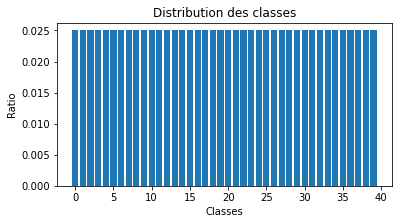

In [390]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Outdoor']['exploratory-dir'], DATASETS['Outdoor']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

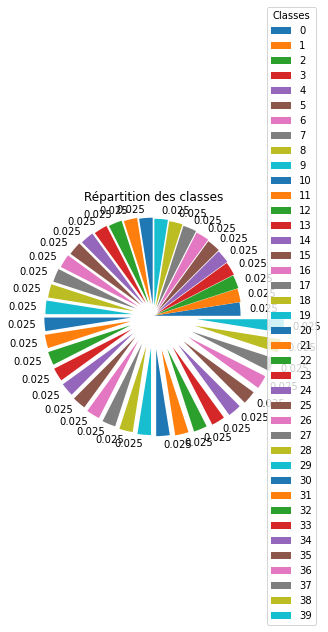

In [391]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Outdoor']['exploratory-dir'], DATASETS['Outdoor']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [392]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['Outdoor']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "-"

dataset_meta

{'name': 'Outdoor',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 4000,
 'varriables': ['att1',
  'att2',
  'att3',
  'att4',
  'att5',
  'att6',
  'att7',
  'att8',
  'att9',
  'att10',
  'att11',
  'att12',
  'att13',
  'att14',
  'att15',
  'att16',
  'att17',
  'att18',
  'att19',
  'att20',
  'att21'],
 'var-nbr': 21,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 'classes': {0: 0.025,
  1: 0.025,
  2: 0.025,
  3: 0.025,
  4: 0.025,
  5: 0.025,
  6: 0.025,
  7: 0.025,
  8: 0.025,
  9: 0.025,
  10: 0.025,
  11: 0.025,
  12: 0.025,
  13: 0.025,
  14: 0.025,
  15: 0.025,
  16: 0.025,
  17: 0.025,
  18: 0.025,
  19: 0.025,
  20: 0.025,
  21: 0.025,
  22: 0.025,
  23: 0.025,
  24: 0.02

In [393]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['Outdoor']['pre-proc-dir'],
                            DATASETS['Outdoor']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['Outdoor']['pre-proc-dir'],
                         DATASETS['Outdoor']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="Ozone">Ozone</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 2534 </li>
    <li><strong>Nombre de variables : </strong> 72 </li>
    <li><strong>Nombre de classes : </strong> 2 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [360]:
dataset_file = os.path.join(DATASETS['Ozone']['brute-dir'],
                            DATASETS['Ozone']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Ozone.arff'

In [361]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.8, 1.8, 2.4, 2.1, 2. , 2.1, 1.5, 1.7, 1.9, 2.3, 3.7, 5.5, 5.1, 5.4, 5.4, 4.7, 4.3, 3.5, 3.5, 2.9, 3.2, 3.2, 2.8, 2.6, 5.5, 3.1,  5.2,  6.1,  6.1,  6.1,  6.1,  5.6,  5.2,  5.4,  7.2, 10.6, 14.5, 17.2, 18.3, 18.9, 19.1, 18.9, 18.3, 17.3, 16.8, 16.1, 15.4, 14.9, 14.8, 15. , 19.1, 12.5,  6.7, 0.11,  3.83,  0.14, 1612. , -2.3, 0.3 , 7.18, 0.12, 3178.5, -15.5, 0.15, 10.67, -1.56, 5795., -12.1 , 17.9 , 10330., -55., 0.  , b'1'),
        (2.8, 3.2, 3.3, 2.7, 3.3, 3.2, 2.9, 2.8, 3.1, 3.4, 4.2, 4.5, 4.5, 4.3, 5.5, 5.1, 3.8, 3. , 2.6, 3. , 2.2, 2.3, 2.5, 2.8, 5.5, 3.4, 15.1, 15.3, 15.6, 15.6, 15.9, 16.2, 16.2, 16.2, 16.6, 17.8, 19.4, 20.6, 21.2, 21.8, 22.4, 22.1, 20.8, 19.1, 18.1, 17.2, 16.5, 16.1, 16. , 16.2, 22.4, 17.8,  9. , 0.25, -0.41,  9.53, 1594.5, -2.2, 0.96, 8.24, 7.3 , 3172. , -14.5, 0.48,  8.39,  3.84, 5805.,  14.05, 29.  , 10275., -55., 0.  , b'1'),
        (2.9, 2.8, 2.6, 2.1, 2.2, 2.5, 2.5, 2.7, 2.2, 2.5, 3.1, 4. , 4.4, 4.6, 5.6, 5.4, 5.2, 4.4, 3.5, 2.7, 2.9, 3.9, 4.1, 4.

In [362]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V64,V65,V66,V67,V68,V69,V70,V71,V72,Class
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.000000,-55.000000,0.00,b'1'
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.000000,-55.000000,0.00,b'1'
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.000000,-40.000000,0.00,b'1'
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.000000,-40.000000,2.08,b'1'
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.58,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.070000,7.930000,-4.410000,5800.000000,-25.600000,21.800000,10295.000000,65.000000,0.00,b'1'
2530,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.040000,5.950000,-1.140000,5845.000000,-19.400000,19.100000,10310.000000,15.000000,0.00,b'1'
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.060000,7.800000,-0.640000,5845.000000,-9.600000,35.200000,10275.000000,-35.000000,0.00,b'1'
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,0.250000,7.720000,-0.890000,5845.000000,-19.600000,34.200000,10245.000000,-30.000000,0.05,b'1'


<b>Nettoyage</b>

variables -> virgule flottante

In [364]:
variables = dataset_df.drop('Class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,-15.50000,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.000000,-55.000000,0.00
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,-14.50000,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.000000,-55.000000,0.00
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,-15.90000,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.000000,-40.000000,0.00
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,-16.80000,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.000000,-40.000000,2.08
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,-10.51141,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,-12.40000,0.070000,7.930000,-4.410000,5800.000000,-25.600000,21.800000,10295.000000,65.000000,0.00
2530,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,-12.00000,0.040000,5.950000,-1.140000,5845.000000,-19.400000,19.100000,10310.000000,15.000000,0.00
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,-11.80000,0.060000,7.800000,-0.640000,5845.000000,-9.600000,35.200000,10275.000000,-35.000000,0.00
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,-10.80000,0.250000,7.720000,-0.890000,5845.000000,-19.600000,34.200000,10245.000000,-30.000000,0.05


class -> entiers

In [365]:
classes = dataset_df['Class'].values.tolist()
classes

[b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'2',
 b'2',
 b'1',
 b'2',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'2',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',

In [366]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

In [367]:
classes = [int(classe) for classe in classes]
classes

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [368]:
variables['Class'] = classes
dataset_df = variables
dataset_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V64,V65,V66,V67,V68,V69,V70,V71,V72,Class
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.000000,-55.000000,0.00,1
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.000000,-55.000000,0.00,1
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.000000,-40.000000,0.00,1
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.000000,-40.000000,2.08,1
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.070000,7.930000,-4.410000,5800.000000,-25.600000,21.800000,10295.000000,65.000000,0.00,1
2530,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.040000,5.950000,-1.140000,5845.000000,-19.400000,19.100000,10310.000000,15.000000,0.00,1
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.060000,7.800000,-0.640000,5845.000000,-9.600000,35.200000,10275.000000,-35.000000,0.00,1
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,0.250000,7.720000,-0.890000,5845.000000,-19.600000,34.200000,10245.000000,-30.000000,0.05,1


<b>Taille</b>

In [369]:
Taille = len(dataset_df.index)
Taille

2534

<b>Variables</b>

In [370]:
Variables = dataset_df.columns.tolist()
Variables.remove('Class')
Variables

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72']

In [371]:
Variables_types = dataset_df.drop('Class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [372]:
# Distribution des classes

classes = list(set(dataset_df['Class']))

classes_dist = dict()
for classe in classes :
    number = len(dataset_df[dataset_df['Class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[classe] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)

1  :  2374
2  :  160
Total =  2534
Distribution correcte !
Nombre de classes trouvées =  2


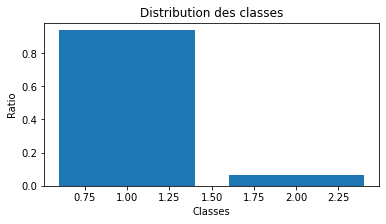

In [373]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Ozone']['exploratory-dir'], DATASETS['Ozone']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

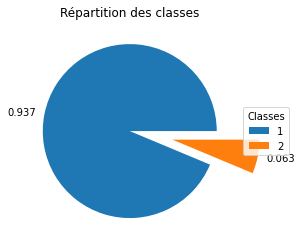

In [374]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Ozone']['exploratory-dir'], DATASETS['Ozone']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [375]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['Ozone']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "-"

dataset_meta

{'name': 'Ozone',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 2534,
 'varriables': ['V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V11',
  'V12',
  'V13',
  'V14',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V23',
  'V24',
  'V25',
  'V26',
  'V27',
  'V28',
  'V29',
  'V30',
  'V31',
  'V32',
  'V33',
  'V34',
  'V35',
  'V36',
  'V37',
  'V38',
  'V39',
  'V40',
  'V41',
  'V42',
  'V43',
  'V44',
  'V45',
  'V46',
  'V47',
  'V48',
  'V49',
  'V50',
  'V51',
  'V52',
  'V53',
  'V54',
  'V55',
  'V56',
  'V57',
  'V58',
  'V59',
  'V60',
  'V61',
  'V62',
  'V63',
  'V64',
  'V65',
  'V66',
  'V67',
  'V68',
  'V69',
  'V70',
  'V71',
  'V72'],
 'var-nbr': 72,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',


In [376]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['Ozone']['pre-proc-dir'],
                            DATASETS['Ozone']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['Ozone']['pre-proc-dir'],
                         DATASETS['Ozone']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="Poker_LSN">Poker_LSN</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 829201 </li>
    <li><strong>Nombre de variables : </strong> 10 </li>
    <li><strong>Nombre de classes : </strong> 10 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [344]:
dataset_file = os.path.join(DATASETS['Poker_LSN']['brute-dir'],
                            DATASETS['Poker_LSN']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Poker_LSN.arff'

In [345]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(b'1', 1., b'1', 10., b'1', 11., b'1', 12., b'2', 13., b'4'),
        (b'1', 1., b'1', 10., b'1', 11., b'1', 12., b'4', 13., b'4'),
        (b'1', 1., b'1', 10., b'1', 11., b'2', 11., b'1', 12., b'1'), ...,
        (b'4', 9., b'4', 11., b'3', 12., b'4', 12., b'4', 13., b'1'),
        (b'4', 9., b'4', 11., b'4', 12., b'1', 13., b'2', 13., b'1'),
        (b'4', 9., b'4', 12., b'2', 13., b'3', 13., b'4', 13., b'3')],
       dtype=[('s1', 'S1'), ('r1', '<f8'), ('s2', 'S1'), ('r2', '<f8'), ('s3', 'S1'), ('r3', '<f8'), ('s4', 'S1'), ('r4', '<f8'), ('s5', 'S1'), ('r5', '<f8'), ('class', 'S1')]),
 Dataset: poker
 	s1's type is nominal, range is ('1', '2', '3', '4')
 	r1's type is numeric
 	s2's type is nominal, range is ('1', '2', '3', '4')
 	r2's type is numeric
 	s3's type is nominal, range is ('1', '2', '3', '4')
 	r3's type is numeric
 	s4's type is nominal, range is ('1', '2', '3', '4')
 	r4's type is numeric
 	s5's type is nominal, range is ('1', '2', '3', '4')
 	r5's type is num

In [346]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,s1,r1,s2,r2,s3,r3,s4,r4,s5,r5,class
0,b'1',1.0,b'1',10.0,b'1',11.0,b'1',12.0,b'2',13.0,b'4'
1,b'1',1.0,b'1',10.0,b'1',11.0,b'1',12.0,b'4',13.0,b'4'
2,b'1',1.0,b'1',10.0,b'1',11.0,b'2',11.0,b'1',12.0,b'1'
3,b'1',1.0,b'1',10.0,b'1',11.0,b'2',11.0,b'1',13.0,b'1'
4,b'1',1.0,b'1',10.0,b'1',11.0,b'2',11.0,b'2',12.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...
829196,b'4',9.0,b'4',11.0,b'3',12.0,b'4',12.0,b'1',13.0,b'1'
829197,b'4',9.0,b'4',11.0,b'3',12.0,b'4',12.0,b'3',13.0,b'1'
829198,b'4',9.0,b'4',11.0,b'3',12.0,b'4',12.0,b'4',13.0,b'1'
829199,b'4',9.0,b'4',11.0,b'4',12.0,b'1',13.0,b'2',13.0,b'1'


<b>Nettoyage</b>

variables -> virgule flottante

In [347]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,s1,r1,s2,r2,s3,r3,s4,r4,s5,r5
0,1.0,1.0,1.0,10.0,1.0,11.0,1.0,12.0,2.0,13.0
1,1.0,1.0,1.0,10.0,1.0,11.0,1.0,12.0,4.0,13.0
2,1.0,1.0,1.0,10.0,1.0,11.0,2.0,11.0,1.0,12.0
3,1.0,1.0,1.0,10.0,1.0,11.0,2.0,11.0,1.0,13.0
4,1.0,1.0,1.0,10.0,1.0,11.0,2.0,11.0,2.0,12.0
...,...,...,...,...,...,...,...,...,...,...
829196,4.0,9.0,4.0,11.0,3.0,12.0,4.0,12.0,1.0,13.0
829197,4.0,9.0,4.0,11.0,3.0,12.0,4.0,12.0,3.0,13.0
829198,4.0,9.0,4.0,11.0,3.0,12.0,4.0,12.0,4.0,13.0
829199,4.0,9.0,4.0,11.0,4.0,12.0,1.0,13.0,2.0,13.0


class -> entiers

In [348]:
classes = dataset_df['class'].values.tolist()
classes

[b'4',
 b'4',
 b'1',
 b'1',
 b'1',
 b'1',
 b'3',
 b'1',
 b'3',
 b'1',
 b'1',
 b'4',
 b'1',
 b'1',
 b'1',
 b'3',
 b'1',
 b'4',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'3',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'2',
 b'2',
 b'2',
 b'1',
 b'1',
 b'1',
 b'3',
 b'3',
 b'3',
 b'3',
 b'3',
 b'3',
 b'7',
 b'3',
 b'3',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'3',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'4',
 b'1',
 b'1',
 b'4',
 b'1',
 b'4',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'4',
 b'1',
 b'1',
 b'3',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'2',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'3',
 b'3',
 b'1',
 b'1',
 b'1',
 b'1',
 b'4',
 b'1',
 b'4',
 b'4',
 b'1',
 b'4',
 b'1',
 b'4',
 b'1',
 b'1',
 b'1',
 b'1',
 b'4',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',
 b'1',
 b'1',
 b'1',
 b'2',
 b'1',

In [349]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['4',
 '4',
 '1',
 '1',
 '1',
 '1',
 '3',
 '1',
 '3',
 '1',
 '1',
 '4',
 '1',
 '1',
 '1',
 '3',
 '1',
 '4',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '3',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '7',
 '3',
 '3',
 '1',
 '1',
 '2',
 '1',
 '1',
 '3',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '4',
 '1',
 '1',
 '4',
 '1',
 '4',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '4',
 '1',
 '1',
 '3',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '3',
 '3',
 '1',
 '1',
 '1',
 '1',
 '4',
 '1',
 '4',
 '4',
 '1',
 '4',
 '1',
 '4',
 '1',
 '1',
 '1',
 '1',
 '4',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '4',
 '4',
 '1',
 '4',
 '1',
 '1',
 '4',
 '4',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '3',
 '1',
 '3',
 '1',
 '1'

In [350]:
classes = [int(classe) for classe in classes]
classes

[4,
 4,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 4,
 1,
 1,
 1,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 7,
 3,
 3,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 4,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 1,
 1,
 1,
 4,
 1,
 4,
 4,
 1,
 4,
 1,
 4,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 4,
 4,
 1,
 4,
 1,
 1,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 5,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


In [351]:
variables['class'] = classes
dataset_df = variables
dataset_df

,s1,r1,s2,r2,s3,r3,s4,r4,s5,r5,class
0,1.0,1.0,1.0,10.0,1.0,11.0,1.0,12.0,2.0,13.0,4
1,1.0,1.0,1.0,10.0,1.0,11.0,1.0,12.0,4.0,13.0,4
2,1.0,1.0,1.0,10.0,1.0,11.0,2.0,11.0,1.0,12.0,1
3,1.0,1.0,1.0,10.0,1.0,11.0,2.0,11.0,1.0,13.0,1
4,1.0,1.0,1.0,10.0,1.0,11.0,2.0,11.0,2.0,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...
829196,4.0,9.0,4.0,11.0,3.0,12.0,4.0,12.0,1.0,13.0,1
829197,4.0,9.0,4.0,11.0,3.0,12.0,4.0,12.0,3.0,13.0,1
829198,4.0,9.0,4.0,11.0,3.0,12.0,4.0,12.0,4.0,13.0,1
829199,4.0,9.0,4.0,11.0,4.0,12.0,1.0,13.0,2.0,13.0,1


<b>Taille</b>

In [352]:
Taille = len(dataset_df.index)
Taille

829201

<b>Variables</b>

In [353]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['s1', 'r1', 's2', 'r2', 's3', 'r3', 's4', 'r4', 's5', 'r5']

In [354]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [355]:
# Distribution des classes

classes = list(set(dataset_df['class']))

classes_dist = dict()
for classe in classes :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[classe] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)

0  :  415526
1  :  350426
2  :  39432
3  :  17541
4  :  3225
5  :  1657
6  :  1186
7  :  195
8  :  11
9  :  2
Total =  829201
Distribution correcte !
Nombre de classes trouvées =  10


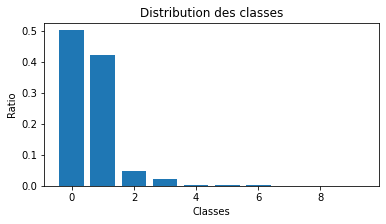

In [356]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Poker_LSN']['exploratory-dir'], DATASETS['Poker_LSN']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

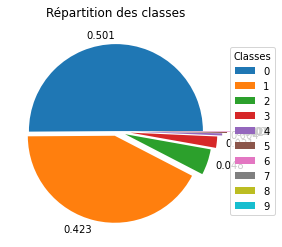

In [357]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Poker_LSN']['exploratory-dir'], DATASETS['Poker_LSN']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [358]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['Poker_LSN']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "-"

dataset_meta

{'name': 'Poker_LSN',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 829201,
 'varriables': ['s1', 'r1', 's2', 'r2', 's3', 'r3', 's4', 'r4', 's5', 'r5'],
 'var-nbr': 10,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 'classes': {0: 0.501,
  1: 0.423,
  2: 0.048,
  3: 0.021,
  4: 0.004,
  5: 0.002,
  6: 0.001,
  7: 0.0,
  8: 0.0,
  9: 0.0},
 'class-nbr': 10,
 'concept-drift': '-'}

In [359]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['Poker_LSN']['pre-proc-dir'],
                            DATASETS['Poker_LSN']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['Poker_LSN']['pre-proc-dir'],
                         DATASETS['Poker_LSN']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="Rialto">Rialto</h5>

<ul>
    <li><strong>Contenu : </strong> - </li>
    <li><strong>Taille de l'échantillon : </strong> 82250 </li>
    <li><strong>Nombre de variables : </strong> 27 </li>
    <li><strong>Nombre de classes : </strong> 10 </li>
    <li><strong>Dérivation de concept : </strong> - </li>
</ul>

In [312]:
dataset_file = os.path.join(DATASETS['Rialto']['brute-dir'],
                            DATASETS['Rialto']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Rialto.arff'

In [313]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.98748, 3.6706e-05, 0., 0.0000e+00, 1.8353e-05, 0., 0., 0., 0., 0.00038541, 2.7529e-04, 0., 0.        , 0.0055977 , 1.8353e-05, 0., 0.0000e+00, 3.6706e-05, 0., 0., 0., 0., 7.3412e-05, 1.4682e-04, 0., 0.        , 0.005928  , b'0'),
        (0.99887, 4.0235e-05, 0., 0.0000e+00, 4.0235e-05, 0., 0., 0., 0., 0.        , 0.0000e+00, 0., 0.00020117, 0.00084493, 0.0000e+00, 0., 0.0000e+00, 0.0000e+00, 0., 0., 0., 0., 0.0000e+00, 0.0000e+00, 0., 0.        , 0.        , b'1'),
        (0.99364, 0.0000e+00, 0., 2.2991e-05, 0.0000e+00, 0., 0., 0., 0., 0.0010806 , 1.1496e-05, 0., 0.0010576 , 0.0031843 , 0.0000e+00, 0., 1.1496e-05, 0.0000e+00, 0., 0., 0., 0., 5.7479e-05, 0.0000e+00, 0., 0.00031038, 0.00062077, b'2'),
        ...,
        (0.94239, 0.0000e+00, 0., 0.0000e+00, 0.0000e+00, 0., 0., 0., 0., 0.01837   , 2.5692e-04, 0., 0.0055238 , 0.023701  , 6.4230e-05, 0., 0.0000e+00, 0.0000e+00, 0., 0., 0., 0., 2.1196e-03, 6.4230e-05, 0., 0.0017342 , 0.0057807 , b'7'),
        (0.91219, 4.011

In [314]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att19,att20,att21,att22,att23,att24,att25,att26,att27,class
0,0.98748,0.000037,0.0,0.000000,0.000018,0.0,0.0,0.0,0.0,0.000385,...,0.0,0.0,0.0,0.0,0.000073,0.000147,0.0,0.000000,0.005928,b'0'
1,0.99887,0.000040,0.0,0.000000,0.000040,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,b'1'
2,0.99364,0.000000,0.0,0.000023,0.000000,0.0,0.0,0.0,0.0,0.001081,...,0.0,0.0,0.0,0.0,0.000057,0.000000,0.0,0.000310,0.000621,b'2'
3,0.99740,0.000104,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000291,...,0.0,0.0,0.0,0.0,0.000228,0.000000,0.0,0.000000,0.000000,b'3'
4,1.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,b'4'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82245,0.99977,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000226,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,b'5'
82246,0.99381,0.006186,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,b'6'
82247,0.94239,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.018370,...,0.0,0.0,0.0,0.0,0.002120,0.000064,0.0,0.001734,0.005781,b'7'
82248,0.91219,0.004011,0.0,0.000292,0.000146,0.0,0.0,0.0,0.0,0.029319,...,0.0,0.0,0.0,0.0,0.000802,0.000000,0.0,0.000365,0.000000,b'8'


<b>Nettoyage</b>

variables -> virgule flottante

In [315]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27
0,0.98748,0.000037,0.0,0.000000,0.000018,0.0,0.0,0.0,0.0,0.000385,...,0.000037,0.0,0.0,0.0,0.0,0.000073,0.000147,0.0,0.000000,0.005928
1,0.99887,0.000040,0.0,0.000000,0.000040,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.99364,0.000000,0.0,0.000023,0.000000,0.0,0.0,0.0,0.0,0.001081,...,0.000000,0.0,0.0,0.0,0.0,0.000057,0.000000,0.0,0.000310,0.000621
3,0.99740,0.000104,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000291,...,0.000000,0.0,0.0,0.0,0.0,0.000228,0.000000,0.0,0.000000,0.000000
4,1.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82245,0.99977,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000226,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
82246,0.99381,0.006186,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
82247,0.94239,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.018370,...,0.000000,0.0,0.0,0.0,0.0,0.002120,0.000064,0.0,0.001734,0.005781
82248,0.91219,0.004011,0.0,0.000292,0.000146,0.0,0.0,0.0,0.0,0.029319,...,0.000000,0.0,0.0,0.0,0.0,0.000802,0.000000,0.0,0.000365,0.000000


class -> entiers

In [316]:
classes = dataset_df['class'].values.tolist()
classes

[b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'0',
 b'1',
 b'2',

In [317]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6'

In [318]:
classes = [int(classe) for classe in classes]
classes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,


In [319]:
variables['class'] = classes
dataset_df = variables
dataset_df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att19,att20,att21,att22,att23,att24,att25,att26,att27,class
0,0.98748,0.000037,0.0,0.000000,0.000018,0.0,0.0,0.0,0.0,0.000385,...,0.0,0.0,0.0,0.0,0.000073,0.000147,0.0,0.000000,0.005928,0
1,0.99887,0.000040,0.0,0.000000,0.000040,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1
2,0.99364,0.000000,0.0,0.000023,0.000000,0.0,0.0,0.0,0.0,0.001081,...,0.0,0.0,0.0,0.0,0.000057,0.000000,0.0,0.000310,0.000621,2
3,0.99740,0.000104,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000291,...,0.0,0.0,0.0,0.0,0.000228,0.000000,0.0,0.000000,0.000000,3
4,1.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82245,0.99977,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000226,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,5
82246,0.99381,0.006186,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,6
82247,0.94239,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.018370,...,0.0,0.0,0.0,0.0,0.002120,0.000064,0.0,0.001734,0.005781,7
82248,0.91219,0.004011,0.0,0.000292,0.000146,0.0,0.0,0.0,0.0,0.029319,...,0.0,0.0,0.0,0.0,0.000802,0.000000,0.0,0.000365,0.000000,8


<b>Taille</b>

In [320]:
Taille = len(dataset_df.index)
Taille

82250

<b>Variables</b>

In [321]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['att1',
 'att2',
 'att3',
 'att4',
 'att5',
 'att6',
 'att7',
 'att8',
 'att9',
 'att10',
 'att11',
 'att12',
 'att13',
 'att14',
 'att15',
 'att16',
 'att17',
 'att18',
 'att19',
 'att20',
 'att21',
 'att22',
 'att23',
 'att24',
 'att25',
 'att26',
 'att27']

In [322]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64']

<b>Classes</b>

In [323]:
# Distribution des classes

classes = list(set(dataset_df['class']))

classes_dist = dict()
for classe in classes :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[classe] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)

0  :  8225
1  :  8225
2  :  8225
3  :  8225
4  :  8225
5  :  8225
6  :  8225
7  :  8225
8  :  8225
9  :  8225
Total =  82250
Distribution correcte !
Nombre de classes trouvées =  10


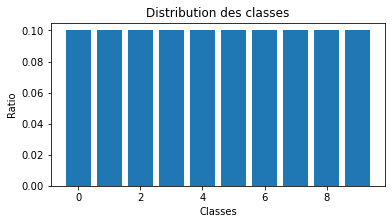

In [324]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Rialto']['exploratory-dir'], DATASETS['Rialto']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

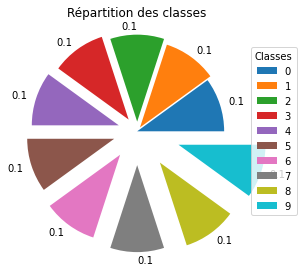

In [325]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Rialto']['exploratory-dir'], DATASETS['Rialto']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [326]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['Rialto']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "-"

dataset_meta

{'name': 'Rialto',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 82250,
 'varriables': ['att1',
  'att2',
  'att3',
  'att4',
  'att5',
  'att6',
  'att7',
  'att8',
  'att9',
  'att10',
  'att11',
  'att12',
  'att13',
  'att14',
  'att15',
  'att16',
  'att17',
  'att18',
  'att19',
  'att20',
  'att21',
  'att22',
  'att23',
  'att24',
  'att25',
  'att26',
  'att27'],
 'var-nbr': 27,
 'var-types': ['float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64',
  'float64'],
 'classes': {0: 0.1,
  1: 0.1,
  2: 0.1,
  3: 0.1,
  4: 0.1,
  5: 0.1,
  6: 0.1,
  7: 0.1,
  8: 0.1,
  9: 0.1},
 'class-nbr': 10,
 'concept-drift': '-'}

In [327]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['Rialto']['pre-proc-dir'],
                            DATASETS['Rialto']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['Rialto']['pre-proc-dir'],
                         DATASETS['Rialto']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<h5 id="Sensor_Stream">Sensor_Stream</h5>

<ul>
    <li><strong>Contenu : </strong> jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère. </li>
    <li><strong>Taille de l'échantillon : </strong> 2219803 </li>
    <li><strong>Nombre de variables : </strong> 4 </li>
    <li><strong>Nombre de classes : </strong> 55 </li>
    <li><strong>Dérivation de concept : </strong> brusque </li>
</ul>

In [328]:
dataset_file = os.path.join(DATASETS['Sensor_Stream']['brute-dir'],
                            DATASETS['Sensor_Stream']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Sensor_Stream.arff'

In [329]:
dataset = arff.loadarff(dataset_file)
dataset

(array([( 58., 19.7336, 37.0933, 7.17600e+01, 2.69964, b'19'),
        ( 58., 19.616 , 37.5737, 9.75200e+01, 2.69964, b'25'),
        ( 58., 19.7728, 37.162 , 1.43520e+02, 2.71196, b'24'), ...,
        (661., 23.4772, 35.853 , 4.02204e-02, 2.82819, b'56'),
        (662., 23.4968, 35.853 , 4.02204e-02, 2.81479, b'56'),
        (662., 23.536 , 36.4396, 3.77200e+01, 2.80151, b'56')],
       dtype=[('rcdminutes', '<f8'), ('temperature', '<f8'), ('humidity', '<f8'), ('light', '<f8'), ('voltage', '<f8'), ('class', 'S2')]),
 Dataset: sensor-all-56
 	rcdminutes's type is numeric
 	temperature's type is numeric
 	humidity's type is numeric
 	light's type is numeric
 	voltage's type is numeric
 	class's type is nominal, range is ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47

In [330]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,rcdminutes,temperature,humidity,light,voltage,class
0,58.0,19.7336,37.0933,71.76000,2.69964,b'19'
1,58.0,19.6160,37.5737,97.52000,2.69964,b'25'
2,58.0,19.7728,37.1620,143.52000,2.71196,b'24'
3,58.0,20.2040,36.8871,50.60000,2.69964,b'3'
4,58.0,20.4196,36.6118,121.44000,2.65143,b'6'
...,...,...,...,...,...,...
2219798,660.0,23.4968,35.8530,0.04022,2.81479,b'56'
2219799,661.0,23.4968,35.8530,0.04022,2.81479,b'56'
2219800,661.0,23.4772,35.8530,0.04022,2.82819,b'56'
2219801,662.0,23.4968,35.8530,0.04022,2.81479,b'56'


<b>Nettoyage</b>

variables -> virgule flottante

In [331]:
variables = dataset_df.drop('class', inplace=False, axis=1)
variables = variables.astype(float)
variables

,rcdminutes,temperature,humidity,light,voltage
0,58.0,19.7336,37.0933,71.76000,2.69964
1,58.0,19.6160,37.5737,97.52000,2.69964
2,58.0,19.7728,37.1620,143.52000,2.71196
3,58.0,20.2040,36.8871,50.60000,2.69964
4,58.0,20.4196,36.6118,121.44000,2.65143
...,...,...,...,...,...
2219798,660.0,23.4968,35.8530,0.04022,2.81479
2219799,661.0,23.4968,35.8530,0.04022,2.81479
2219800,661.0,23.4772,35.8530,0.04022,2.82819
2219801,662.0,23.4968,35.8530,0.04022,2.81479


class -> entiers

In [332]:
classes = dataset_df['class'].values.tolist()
classes

[b'19',
 b'25',
 b'24',
 b'3',
 b'6',
 b'26',
 b'27',
 b'31',
 b'34',
 b'43',
 b'20',
 b'40',
 b'1',
 b'25',
 b'23',
 b'18',
 b'27',
 b'32',
 b'22',
 b'24',
 b'26',
 b'51',
 b'52',
 b'29',
 b'12',
 b'26',
 b'31',
 b'33',
 b'23',
 b'30',
 b'25',
 b'18',
 b'34',
 b'27',
 b'31',
 b'6',
 b'29',
 b'10',
 b'25',
 b'30',
 b'10',
 b'26',
 b'31',
 b'32',
 b'21',
 b'29',
 b'16',
 b'26',
 b'24',
 b'19',
 b'33',
 b'34',
 b'27',
 b'11',
 b'33',
 b'8',
 b'32',
 b'21',
 b'19',
 b'31',
 b'26',
 b'27',
 b'31',
 b'26',
 b'38',
 b'16',
 b'19',
 b'26',
 b'36',
 b'1',
 b'29',
 b'19',
 b'34',
 b'21',
 b'40',
 b'33',
 b'27',
 b'29',
 b'3',
 b'18',
 b'29',
 b'8',
 b'31',
 b'27',
 b'25',
 b'19',
 b'38',
 b'19',
 b'23',
 b'27',
 b'33',
 b'25',
 b'3',
 b'31',
 b'30',
 b'34',
 b'9',
 b'8',
 b'3',
 b'35',
 b'34',
 b'10',
 b'11',
 b'54',
 b'53',
 b'7',
 b'4',
 b'27',
 b'26',
 b'31',
 b'29',
 b'19',
 b'18',
 b'52',
 b'54',
 b'12',
 b'29',
 b'16',
 b'4',
 b'3',
 b'14',
 b'37',
 b'27',
 b'7',
 b'26',
 b'25',
 b'10',
 

In [333]:
classes = [classe.decode('utf-8') for classe in classes]
classes

['19',
 '25',
 '24',
 '3',
 '6',
 '26',
 '27',
 '31',
 '34',
 '43',
 '20',
 '40',
 '1',
 '25',
 '23',
 '18',
 '27',
 '32',
 '22',
 '24',
 '26',
 '51',
 '52',
 '29',
 '12',
 '26',
 '31',
 '33',
 '23',
 '30',
 '25',
 '18',
 '34',
 '27',
 '31',
 '6',
 '29',
 '10',
 '25',
 '30',
 '10',
 '26',
 '31',
 '32',
 '21',
 '29',
 '16',
 '26',
 '24',
 '19',
 '33',
 '34',
 '27',
 '11',
 '33',
 '8',
 '32',
 '21',
 '19',
 '31',
 '26',
 '27',
 '31',
 '26',
 '38',
 '16',
 '19',
 '26',
 '36',
 '1',
 '29',
 '19',
 '34',
 '21',
 '40',
 '33',
 '27',
 '29',
 '3',
 '18',
 '29',
 '8',
 '31',
 '27',
 '25',
 '19',
 '38',
 '19',
 '23',
 '27',
 '33',
 '25',
 '3',
 '31',
 '30',
 '34',
 '9',
 '8',
 '3',
 '35',
 '34',
 '10',
 '11',
 '54',
 '53',
 '7',
 '4',
 '27',
 '26',
 '31',
 '29',
 '19',
 '18',
 '52',
 '54',
 '12',
 '29',
 '16',
 '4',
 '3',
 '14',
 '37',
 '27',
 '7',
 '26',
 '25',
 '10',
 '18',
 '9',
 '23',
 '11',
 '31',
 '29',
 '1',
 '34',
 '10',
 '3',
 '11',
 '33',
 '31',
 '4',
 '35',
 '27',
 '7',
 '33',
 '25',


In [334]:
classes = [int(classe) for classe in classes]
classes

[19,
 25,
 24,
 3,
 6,
 26,
 27,
 31,
 34,
 43,
 20,
 40,
 1,
 25,
 23,
 18,
 27,
 32,
 22,
 24,
 26,
 51,
 52,
 29,
 12,
 26,
 31,
 33,
 23,
 30,
 25,
 18,
 34,
 27,
 31,
 6,
 29,
 10,
 25,
 30,
 10,
 26,
 31,
 32,
 21,
 29,
 16,
 26,
 24,
 19,
 33,
 34,
 27,
 11,
 33,
 8,
 32,
 21,
 19,
 31,
 26,
 27,
 31,
 26,
 38,
 16,
 19,
 26,
 36,
 1,
 29,
 19,
 34,
 21,
 40,
 33,
 27,
 29,
 3,
 18,
 29,
 8,
 31,
 27,
 25,
 19,
 38,
 19,
 23,
 27,
 33,
 25,
 3,
 31,
 30,
 34,
 9,
 8,
 3,
 35,
 34,
 10,
 11,
 54,
 53,
 7,
 4,
 27,
 26,
 31,
 29,
 19,
 18,
 52,
 54,
 12,
 29,
 16,
 4,
 3,
 14,
 37,
 27,
 7,
 26,
 25,
 10,
 18,
 9,
 23,
 11,
 31,
 29,
 1,
 34,
 10,
 3,
 11,
 33,
 31,
 4,
 35,
 27,
 7,
 33,
 25,
 11,
 44,
 24,
 38,
 46,
 20,
 54,
 4,
 48,
 40,
 53,
 26,
 35,
 22,
 21,
 31,
 7,
 37,
 29,
 47,
 45,
 1,
 16,
 9,
 41,
 3,
 47,
 31,
 54,
 20,
 10,
 46,
 11,
 7,
 29,
 40,
 27,
 48,
 38,
 33,
 51,
 52,
 44,
 22,
 15,
 21,
 11,
 50,
 42,
 40,
 46,
 39,
 20,
 54,
 3,
 33,
 34,
 48,
 7,
 47,


In [335]:
variables['class'] = classes
dataset_df = variables
dataset_df

,rcdminutes,temperature,humidity,light,voltage,class
0,58.0,19.7336,37.0933,71.76000,2.69964,19
1,58.0,19.6160,37.5737,97.52000,2.69964,25
2,58.0,19.7728,37.1620,143.52000,2.71196,24
3,58.0,20.2040,36.8871,50.60000,2.69964,3
4,58.0,20.4196,36.6118,121.44000,2.65143,6
...,...,...,...,...,...,...
2219798,660.0,23.4968,35.8530,0.04022,2.81479,56
2219799,661.0,23.4968,35.8530,0.04022,2.81479,56
2219800,661.0,23.4772,35.8530,0.04022,2.82819,56
2219801,662.0,23.4968,35.8530,0.04022,2.81479,56


<b>Taille</b>

In [336]:
Taille = len(dataset_df.index)
Taille

2219803

<b>Variables</b>

In [337]:
Variables = dataset_df.columns.tolist()
Variables.remove('class')
Variables

['rcdminutes', 'temperature', 'humidity', 'light', 'voltage']

In [338]:
Variables_types = dataset_df.drop('class', inplace=False, axis=1)
Variables_types = Variables_types.dtypes.tolist()
Variables_types = [str(type_var) for type_var in Variables_types]
Variables_types

['float64', 'float64', 'float64', 'float64', 'float64']

<b>Classes</b>

In [339]:
# Distribution des classes

classes = list(set(dataset_df['class']))

classes_dist = dict()
for classe in classes :
    number = len(dataset_df[dataset_df['class'] == classe])
    
    print(classe, " : ", number)
    
    classes_dist[classe] = number


print("Total = ", sum(classes_dist.values()))

assert dataset[0].shape[0] == sum(classes_dist.values())
print("Distribution correcte !")

print("Nombre de classes trouvées = ", len(classes_dist.keys()))


## Ratio
for _ in classes_dist.keys() :
    classes_dist[_] = round(classes_dist[_]/Taille, 3)

1  :  43047
2  :  46915
3  :  46633
4  :  43793
6  :  35666
7  :  55354
8  :  15809
9  :  45204
10  :  47155
11  :  41833
12  :  19016
13  :  27013
14  :  26667
15  :  2038
16  :  32998
17  :  33779
18  :  33433
19  :  39455
20  :  28832
21  :  58521
22  :  60164
23  :  62409
24  :  57352
25  :  53162
26  :  61513
27  :  37627
29  :  64384
30  :  38343
31  :  65689
32  :  43092
33  :  35749
34  :  48764
35  :  51338
36  :  56357
37  :  47915
38  :  49155
39  :  32736
40  :  46621
41  :  40836
42  :  44860
43  :  38656
44  :  47681
45  :  53245
46  :  52988
47  :  56858
48  :  58215
49  :  34811
50  :  15737
51  :  42259
52  :  34067
53  :  25622
54  :  28718
55  :  2850
56  :  2372
58  :  4497
Total =  2219803
Distribution correcte !
Nombre de classes trouvées =  55


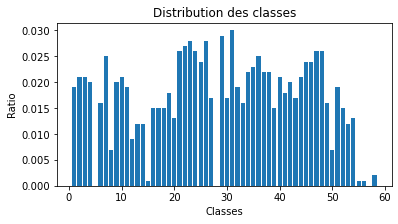

In [340]:
bar_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Sensor_Stream']['exploratory-dir'], DATASETS['Sensor_Stream']['name']))

<strong>| Définition de la fonction <a href="#bar_plot"> bar_plot</a> |</strong>

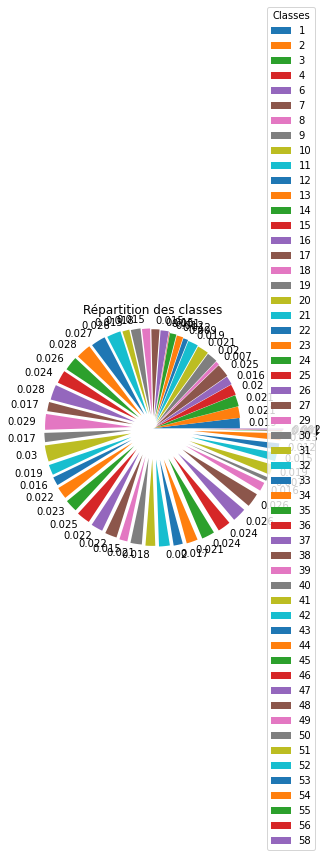

In [341]:
pie_plot(classes_dist.keys(),
         classes_dist.values(),
         os.path.join(DATASETS['Sensor_Stream']['exploratory-dir'], DATASETS['Sensor_Stream']['name']))

<strong>| Définition de la fonction <a href="#pie_plot"> pie_plot</a> |</strong>

In [342]:
# Meta informations
dataset_meta = dict()

dataset_meta['name'] = DATASETS['Sensor_Stream']['name']
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère."
dataset_meta['size'] = Taille
dataset_meta['varriables'] = Variables
dataset_meta['var-nbr'] = len(Variables)
dataset_meta['var-types'] = Variables_types
dataset_meta['classes'] = classes_dist
dataset_meta['class-nbr'] = len(classes_dist.keys())
dataset_meta['concept-drift'] = "-"

dataset_meta

{'name': 'Sensor_Stream',
 'desc': "jeu de données régissant des résultats de capteurs de plusieurs grandeur de l'atmosphère.",
 'size': 2219803,
 'varriables': ['rcdminutes', 'temperature', 'humidity', 'light', 'voltage'],
 'var-nbr': 5,
 'var-types': ['float64', 'float64', 'float64', 'float64', 'float64'],
 'classes': {1: 0.019,
  2: 0.021,
  3: 0.021,
  4: 0.02,
  6: 0.016,
  7: 0.025,
  8: 0.007,
  9: 0.02,
  10: 0.021,
  11: 0.019,
  12: 0.009,
  13: 0.012,
  14: 0.012,
  15: 0.001,
  16: 0.015,
  17: 0.015,
  18: 0.015,
  19: 0.018,
  20: 0.013,
  21: 0.026,
  22: 0.027,
  23: 0.028,
  24: 0.026,
  25: 0.024,
  26: 0.028,
  27: 0.017,
  29: 0.029,
  30: 0.017,
  31: 0.03,
  32: 0.019,
  33: 0.016,
  34: 0.022,
  35: 0.023,
  36: 0.025,
  37: 0.022,
  38: 0.022,
  39: 0.015,
  40: 0.021,
  41: 0.018,
  42: 0.02,
  43: 0.017,
  44: 0.021,
  45: 0.024,
  46: 0.024,
  47: 0.026,
  48: 0.026,
  49: 0.016,
  50: 0.007,
  51: 0.019,
  52: 0.015,
  53: 0.012,
  54: 0.013,
  55: 0.001,
  

In [343]:
# Saving


## Data
dataset_file = os.path.join(DATASETS['Sensor_Stream']['pre-proc-dir'],
                            DATASETS['Sensor_Stream']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)


## Meta
meta_file_path = os.path.join(DATASETS['Sensor_Stream']['pre-proc-dir'],
                         DATASETS['Sensor_Stream']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<hr>
<div style="display: flex;">
    <div style="margin: 10px;"><strong><a href="./I-Introduction.ipynb">précédent</a></strong></div>
    <div style="margin: 10px;"><strong><a href="">suivant</a></strong></div>
</div>